# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [187]:
# Installing the libraries with the specified version
!pip install tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 imbalanced-learn==0.13.0 nbconvert -q --no-warn-script-location

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# Import Libraries

In [1]:
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.


from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.

import time  # Module for time-related operations.

import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.
from keras import backend   # Abstraction layer for neural network backend engines.
from keras.models import Sequential  # Model for building NN sequentially.
from keras.layers import Dense ,Dropout, BatchNormalization  # for creating fully connected neural network layers.
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer

#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score

#to oversample data
from imblearn.over_sampling import SMOTE

In [2]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()

# **Loading the Data**

## Load Training Data

In [3]:
renewtraining = pd.read_csv("Train.csv")

## Load Test Data

In [4]:
renewtest = pd.read_csv("Test.csv")

## Make a copy of the original datasets

In [5]:
data_train=renewtraining.copy()
data_test=renewtest.copy()

# **Data Overview**

## First 5 rows on Training and Test Dataset

In [6]:
# Training
data_train.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
2 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   
3  1.618098  1.888342  7.046143 -1.147285  0.083080 -1.529780  0.207309   
4 -0.111440  3.872488 -3.758361 -2.982897  3.792714  0.544960  0.205433   

         V8        V9       V10  ...       V32       V33        V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440   2.846296  2.235198   
1 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780  -2.467514  1.894599   
2 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550   4.086219  2.292138   
3 -2.493629  0.344926  2.118578  ... -3.584425 -2.577474   1.363769  0.622714   
4  4.848994 -1.854920 -6.220023  ...  8.265896  6.629213 -10.068689  1.222987   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
2  5.360850  0.351993  2.940021  3.839160 -4.309402       0  
3  5.550100 -1.526796  0.138853  3.101430 -1.277378       0  
4 -3.229763  1.686909 -2.163896 -3.644622  6.510338       0  

[5 rows x 41 columns]

In [7]:
# Test
data_test.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -0.613489 -3.819640  2.202302  1.300420 -1.184929 -4.495964 -1.835817   
1  0.389608 -0.512341  0.527053 -2.576776 -1.016766  2.235112 -0.441301   
2 -0.874861 -0.640632  4.084202 -1.590454  0.525855 -1.957592 -0.695367   
3  0.238384  1.458607  4.014528  2.534478  1.196987 -3.117330 -0.924035   
4  5.828225  2.768260 -1.234530  2.809264 -1.641648 -1.406698  0.568643   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  4.722989  1.206140 -0.341909  ...  2.291204 -5.411388  0.870073  0.574479   
1 -4.405744 -0.332869  1.966794  ... -2.474936  2.493582  0.315165  2.059288   
2  1.347309 -1.732348  0.466500  ... -1.318888 -2.997464  0.459664  0.619774   
3  0.269493  1.322436  0.702345  ...  3.517918 -3.074085 -0.284220  0.954576   
4  0.965043  1.918379 -2.774855  ...  1.773841 -1.501573 -2.226702  4.776830   

        V36       V37        V38       V39       V40  Target  
0  4.157191  1.428093 -10.511342  0.454664 -1.448363       0  
1  0.683859 -0.485452   5.128350  1.720744 -1.488235       0  
2  5.631504  1.323512  -1.752154  1.808302  1.675748       0  
3  3.029331 -1.367198  -3.412140  0.906000 -2.450889       0  
4 -6.559698 -0.805551  -0.276007 -3.858207 -0.537694       0  

[5 rows x 41 columns]

## Last 5 rows of training and test datasets

In [8]:
# Training last 5 rows
data_train.tail()

V1         V2        V3        V4        V5        V6        V7  \
19995 -2.071318  -1.088279 -0.796174 -3.011720 -2.287540  2.807310  0.481428   
19996  2.890264   2.483069  5.643919  0.937053 -1.380870  0.412051 -1.593386   
19997 -3.896979  -3.942407 -0.351364 -2.417462  1.107546 -1.527623 -3.519882   
19998 -3.187322 -10.051662  5.695955 -4.370053 -5.354758 -1.873044 -3.947210   
19999 -2.686903   1.961187  6.137088  2.600133  2.657241 -4.290882 -2.344267   

             V8        V9       V10  ...       V32       V33       V34  \
19995  0.105171 -0.586599 -2.899398  ... -8.273996  5.745013  0.589014   
19996 -5.762498  2.150096  0.272302  ... -4.159092  1.181466 -0.742412   
19997  2.054792 -0.233996 -0.357687  ...  7.112162  1.476080 -3.953710   
19998  0.679420 -2.389254  5.456756  ...  0.402812  3.163661  3.752095   
19999  0.974004 -1.027462  0.497421  ...  6.620811 -1.988786 -1.348901   

            V35       V36       V37       V38       V39       V40  Target  
19995 -0.649988 -3.043174  2.216461  0.608723  0.178193  2.927755       1  
19996  5.368979 -0.693028 -1.668971  3.659954  0.819863 -1.987265       0  
19997  1.855555  5.029209  2.082588 -6.409304  1.477138 -0.874148       0  
19998  8.529894  8.450626  0.203958 -7.129918  4.249394 -6.112267       0  
19999  3.951801  5.449706 -0.455411 -2.202056  1.678229 -1.974413       0  

[5 rows x 41 columns]

In [9]:
# Testing last 5 rows
data_test.tail()

V1        V2        V3        V4        V5        V6        V7  \
4995 -5.120451  1.634804  1.251259  4.035944  3.291204 -2.932230 -1.328662   
4996 -5.172498  1.171653  1.579105  1.219922  2.529627 -0.668648 -2.618321   
4997 -1.114136 -0.403576 -1.764875 -5.879475  3.571558  3.710802 -2.482952   
4998 -1.703241  0.614650  6.220503 -0.104132  0.955916 -3.278706 -1.633855   
4999 -0.603701  0.959550 -0.720995  8.229574 -1.815610 -2.275547 -2.574524   

            V8        V9       V10  ...       V32       V33        V34  \
4995  1.754066 -2.984586  1.248633  ...  9.979118  0.063438   0.217281   
4996 -2.000545  0.633791 -0.578938  ...  4.423900  2.603811  -2.152170   
4997 -0.307614 -0.921945 -2.999141  ...  3.791778  7.481506 -10.061396   
4998 -0.103936  1.388152 -1.065622  ... -4.100352 -5.949325   0.550372   
4999 -1.041479  4.129645 -2.731288  ...  2.369776 -1.062408   0.790772   

           V35       V36       V37       V38       V39       V40  Target  
4995  3.036388  2.109323 -0.557433  1.938718  0.512674 -2.694194       0  
4996  0.917401  2.156586  0.466963  0.470120  2.196756 -2.376515       0  
4997 -0.387166  1.848509  1.818248 -1.245633 -1.260876  7.474682       0  
4998 -1.573640  6.823936  2.139307 -4.036164  3.436051  0.579249       0  
4999  4.951955 -7.440825 -0.069506 -0.918083 -2.291154 -5.362891       0  

[5 rows x 41 columns]

## Shape of both datasets

In [10]:
# Training shape
data_train.shape

(20000, 41)

In [11]:
# Testing shape
data_test.shape

(5000, 41)

## Check datatypes in training and testing

In [12]:
# Training datatypes
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [14]:
# Testing datatypes
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

## Statistical summary of Training and Test DataSets

In [15]:
# Training Data
data_train.describe()

V1            V2            V3            V4            V5  \
count  19982.000000  19982.000000  20000.000000  20000.000000  20000.000000   
mean      -0.271996      0.440430      2.484699     -0.083152     -0.053752   
std        3.441625      3.150784      3.388963      3.431595      2.104801   
min      -11.876451    -12.319951    -10.708139    -15.082052     -8.603361   
25%       -2.737146     -1.640674      0.206860     -2.347660     -1.535607   
50%       -0.747917      0.471536      2.255786     -0.135241     -0.101952   
75%        1.840112      2.543967      4.566165      2.130615      1.340480   
max       15.493002     13.089269     17.090919     13.236381      8.133797   

                 V6            V7            V8            V9           V10  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean      -0.995443     -0.879325     -0.548195     -0.016808     -0.012998   
std        2.040970      1.761626      3.295756      2.160568      2.193201   
min      -10.227147     -7.949681    -15.657561     -8.596313     -9.853957   
25%       -2.347238     -2.030926     -2.642665     -1.494973     -1.411212   
50%       -1.000515     -0.917179     -0.389085     -0.067597      0.100973   
75%        0.380330      0.223695      1.722965      1.409203      1.477045   
max        6.975847      8.006091     11.679495      8.137580      8.108472   

       ...           V32           V33           V34           V35  \
count  ...  20000.000000  20000.000000  20000.000000  20000.000000   
mean   ...      0.303799      0.049825     -0.462702      2.229620   
std    ...      5.500400      3.575285      3.183841      2.937102   
min    ...    -19.876502    -16.898353    -17.985094    -15.349803   
25%    ...     -3.420469     -2.242857     -2.136984      0.336191   
50%    ...      0.052073     -0.066249     -0.255008      2.098633   
75%    ...      3.761722      2.255134      1.436935      4.064358   
max    ...     23.633187     16.692486     14.358213     15.291065   

                V36           V37           V38           V39           V40  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       1.514809      0.011316     -0.344025      0.890653     -0.875630   
std        3.800860      1.788165      3.948147      1.753054      3.012155   
min      -14.833178     -5.478350    -17.375002     -6.438880    -11.023935   
25%       -0.943809     -1.255819     -2.987638     -0.272250     -2.940193   
50%        1.566526     -0.128435     -0.316849      0.919261     -0.920806   
75%        3.983939      1.175533      2.279399      2.057540      1.119897   
max       19.329576      7.467006     15.289923      7.759877     10.654265   

             Target  
count  20000.000000  
mean       0.055500  
std        0.228959  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 41 columns]

In [16]:
# Testing Data
data_test.describe()

V1           V2           V3           V4           V5  \
count  4995.000000  4994.000000  5000.000000  5000.000000  5000.000000   
mean     -0.277622     0.397928     2.551787    -0.048943    -0.080120   
std       3.466280     3.139562     3.326607     3.413937     2.110870   
min     -12.381696   -10.716179    -9.237940   -14.682446    -7.711569   
25%      -2.743691    -1.649211     0.314931    -2.292694    -1.615238   
50%      -0.764767     0.427369     2.260428    -0.145753    -0.131890   
75%       1.831313     2.444486     4.587000     2.166468     1.341197   
max      13.504352    14.079073    15.314503    12.140157     7.672835   

                V6           V7           V8           V9          V10  ...  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  ...   
mean     -1.042138    -0.907922    -0.574592     0.030121     0.018524  ...   
std       2.005444     1.769017     3.331911     2.174139     2.145437  ...   
min      -8.924196    -8.124230   -12.252731    -6.785495    -8.170956  ...   
25%      -2.368853    -2.054259    -2.642088    -1.455712    -1.353320  ...   
50%      -1.048571    -0.939695    -0.357943    -0.079891     0.166292  ...   
75%       0.307555     0.212228     1.712896     1.449548     1.511248  ...   
max       5.067685     7.616182    10.414722     8.850720     6.598728  ...   

               V32          V33          V34          V35          V36  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean      0.232567    -0.080115    -0.392663     2.211205     1.594845   
std       5.585628     3.538624     3.166101     2.948426     3.774970   
min     -17.244168   -14.903781   -14.699725   -12.260591   -12.735567   
25%      -3.556267    -2.348121    -2.009604     0.321818    -0.866066   
50%      -0.076694    -0.159713    -0.171745     2.111750     1.702964   
75%       3.751857     2.099160     1.465402     4.031639     4.104409   
max      26.539391    13.323517    12.146302    13.489237    17.116122   

               V37          V38          V39          V40       Target  
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  
mean      0.022931    -0.405659     0.938800    -0.932406     0.056400  
std       1.785320     3.968936     1.716502     2.978193     0.230716  
min      -5.079070   -15.334533    -5.451050   -10.076234     0.000000  
25%      -1.240526    -2.984480    -0.208024    -2.986587     0.000000  
50%      -0.110415    -0.381162     0.959152    -1.002764     0.000000  
75%       1.237522     2.287998     2.130769     1.079738     0.000000  
max       6.809938    13.064950     7.182237     8.698460     1.000000  

[8 rows x 41 columns]

## Check Missing values for Training and Test Dataset

In [17]:
# Training Dataset
data_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [18]:
# Testing Dataset
data_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

## Checking duplicated values for training and testing datasets

In [19]:
# Checking duplicates on training set 
data_train.duplicated().sum()

0

In [20]:
# Checking duplicates on testing test
data_test.duplicated().sum()

0

## Observations on the data

* Training and Test Data set have 41 columns. 40 columns are datatype float and the Target column is integer.
* The training dataset has 20000 and the test dataset has 5000 rows.
* Missing values: In the training dataset, the columns V1 and V2 has 18 missing values. In the test dataset, the columns V1 has 5 missing values and V2 has 6 missing values. We will analyze them more in EDA.
* Duplicates: There are no duplicates in the training and testing datasets.


# **Exploratory Data Analysis**

## Univariate analysis

### Functions to perform the univariated analysis

In [24]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

     # Adding the titles
    ax_box2.set_title(f"Boxplot of {feature}") #title of the boxplot
    ax_hist2.set_title(f"Histogram of {feature}") #tittle of the histogram
    f2.suptitle(f"Distribution of {feature}", fontsize=16)  # overall title
    plt.show()
    plt.close(f2)

### Check the distribution for the target variable for training and test sets

In [22]:
# Training dataset
data_train["Target"].value_counts(1)

Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64

In [23]:
# Testing dataset
# For train data
data_test["Target"].value_counts(1)

Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64

### Check the distribution for every column in the training set

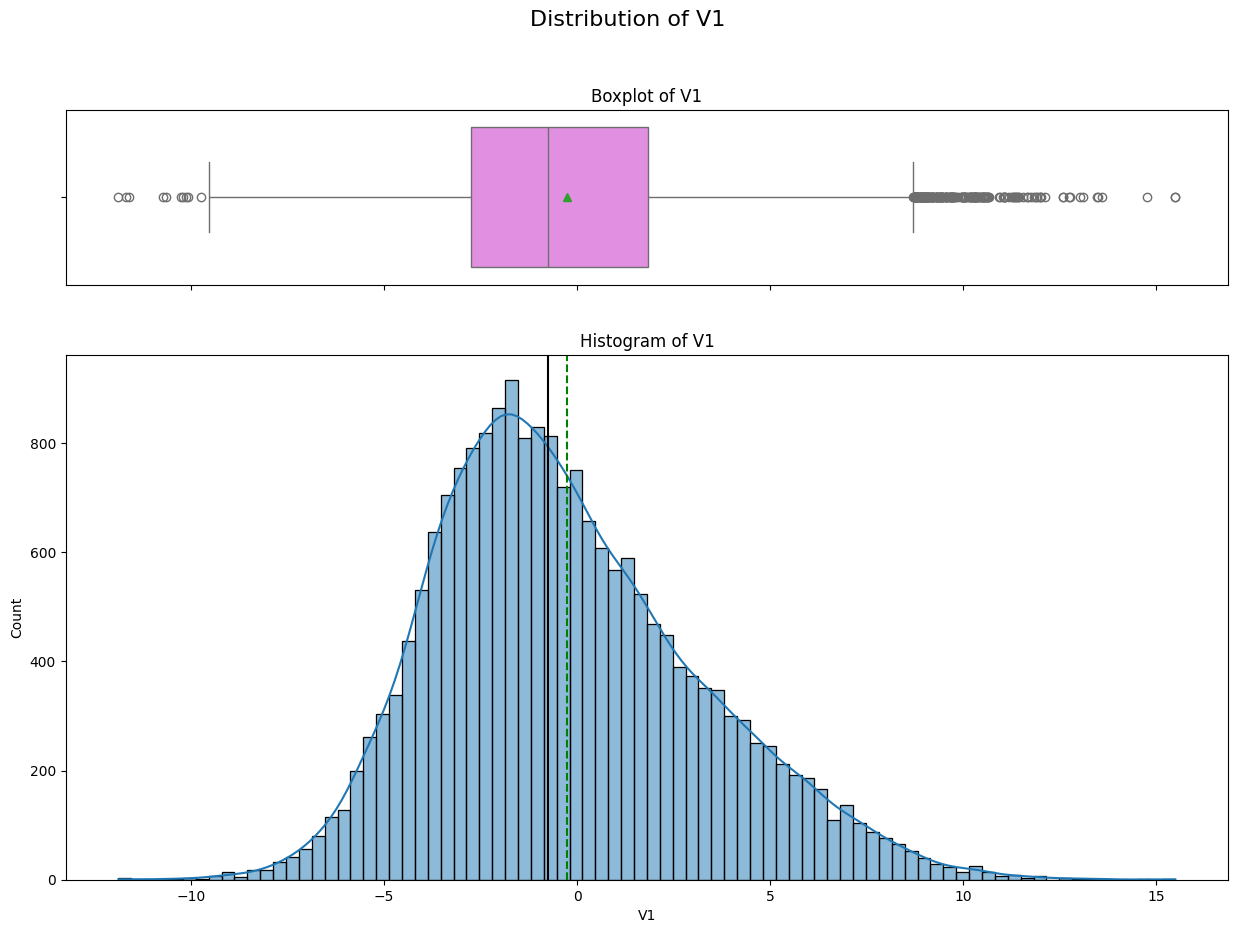

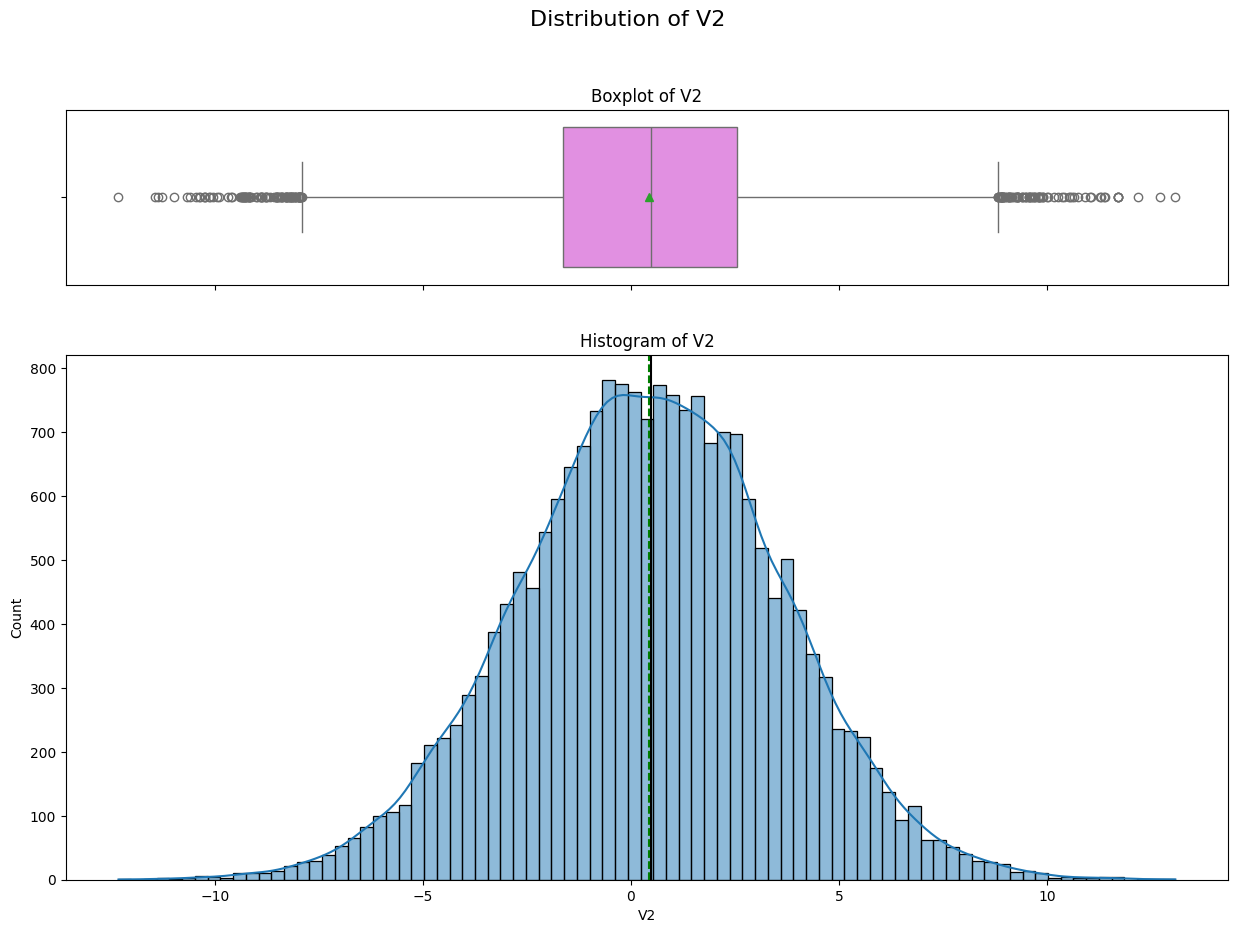

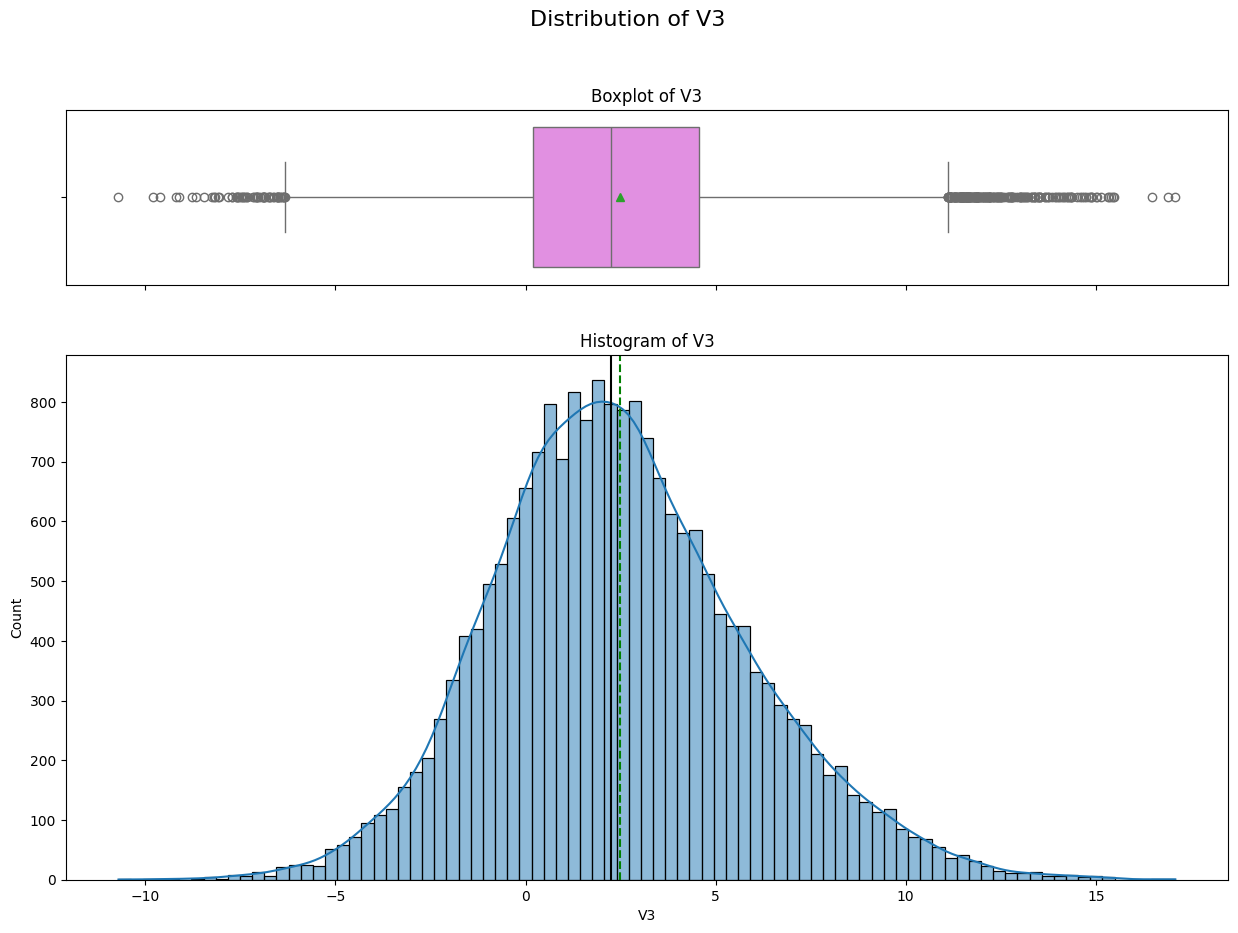

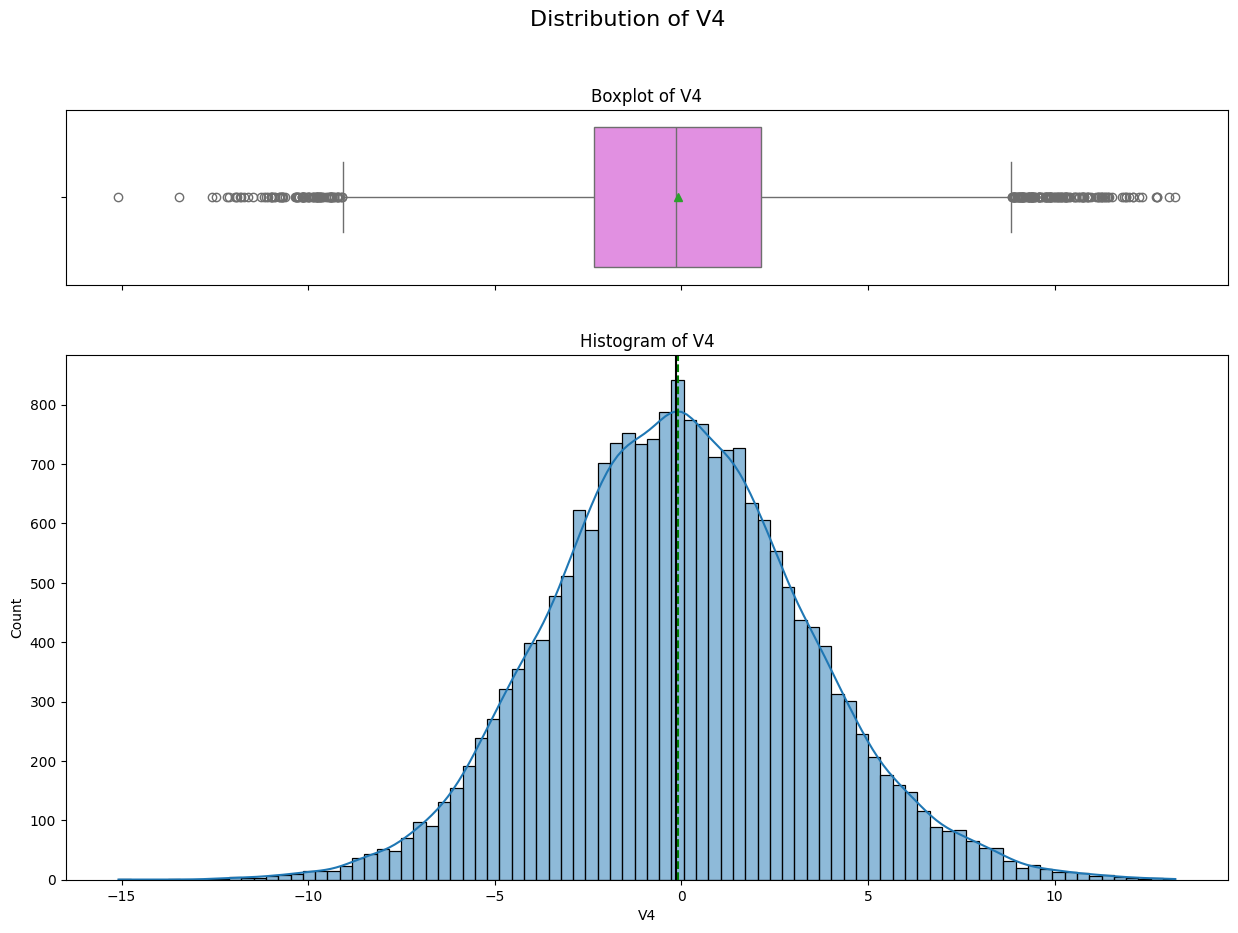

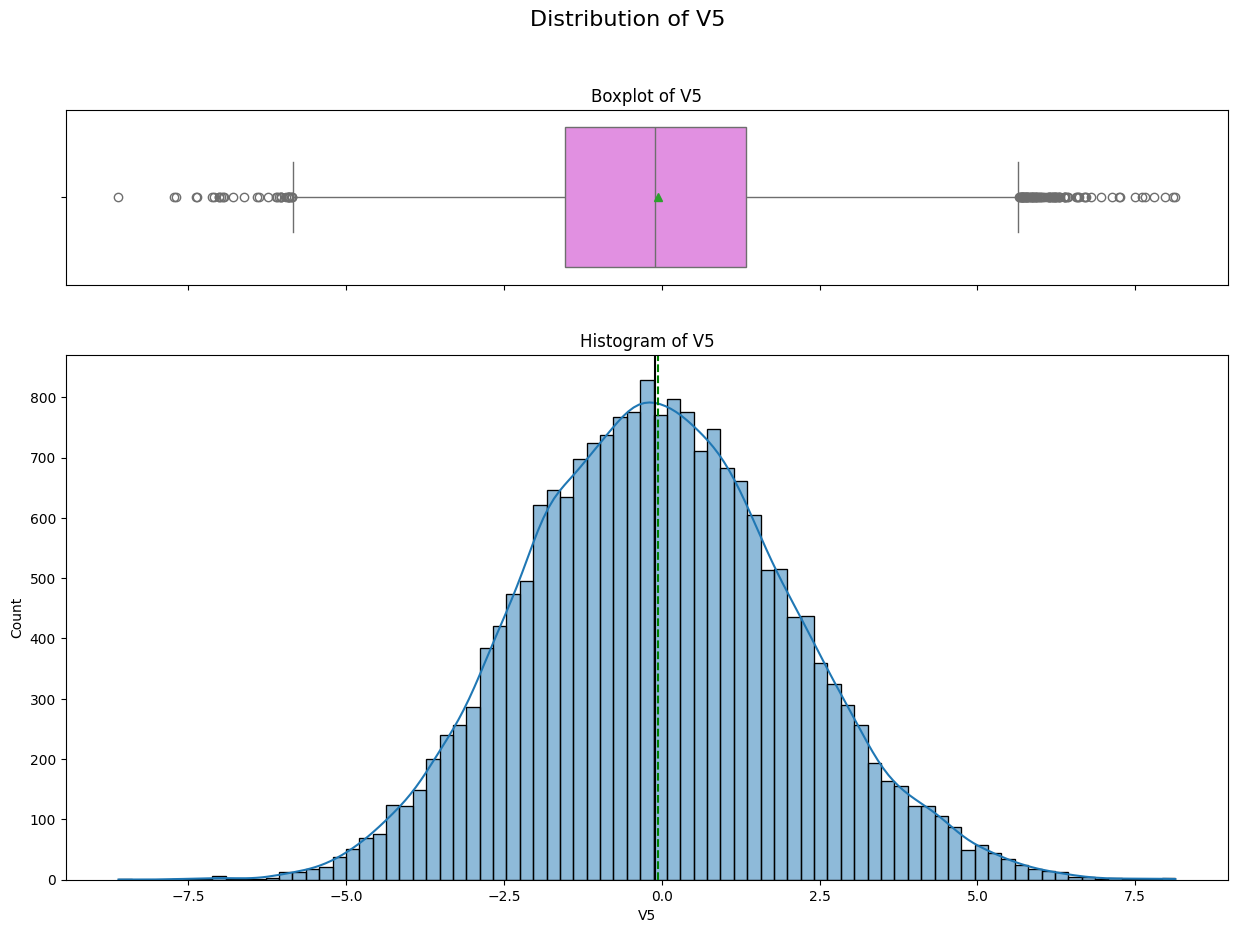

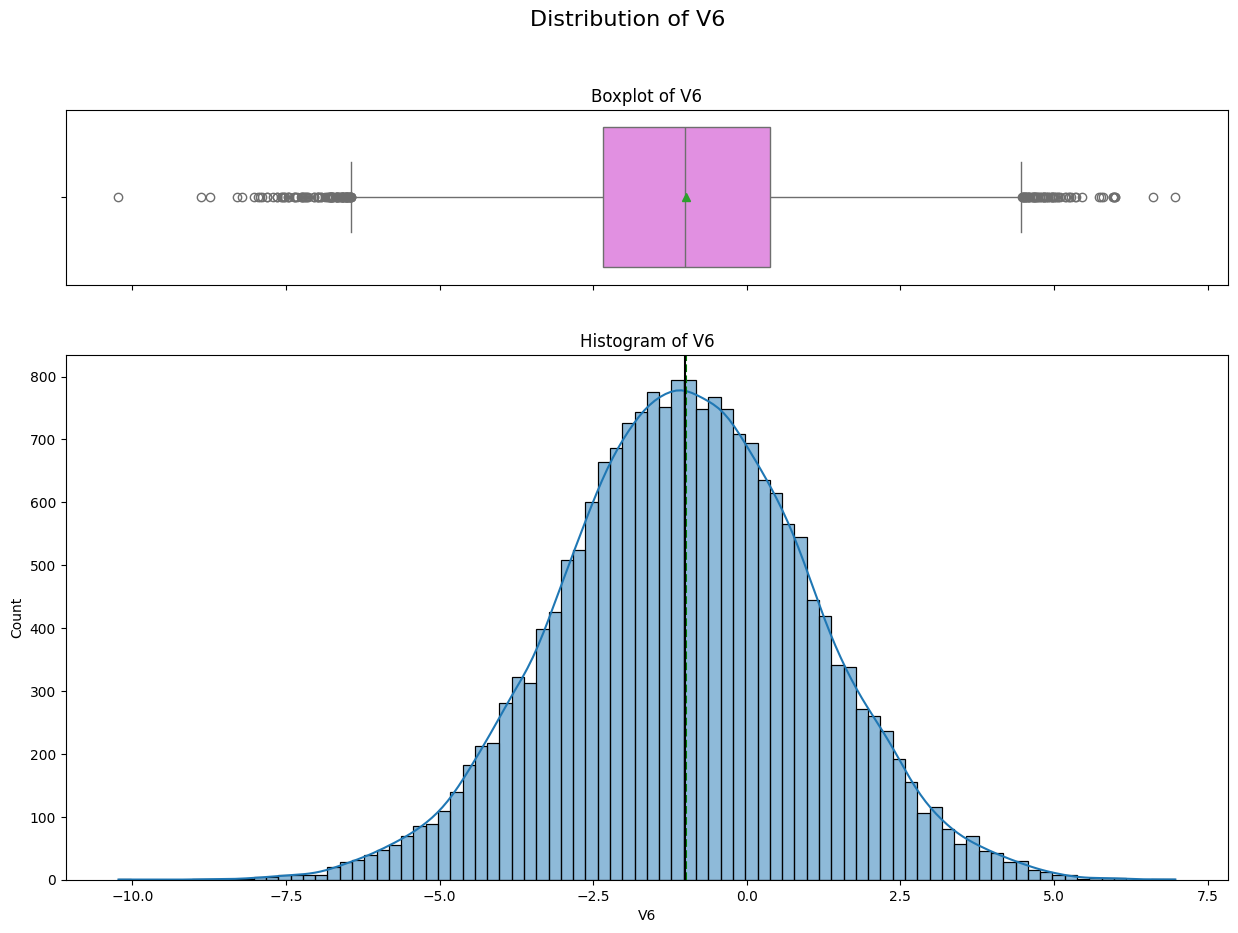

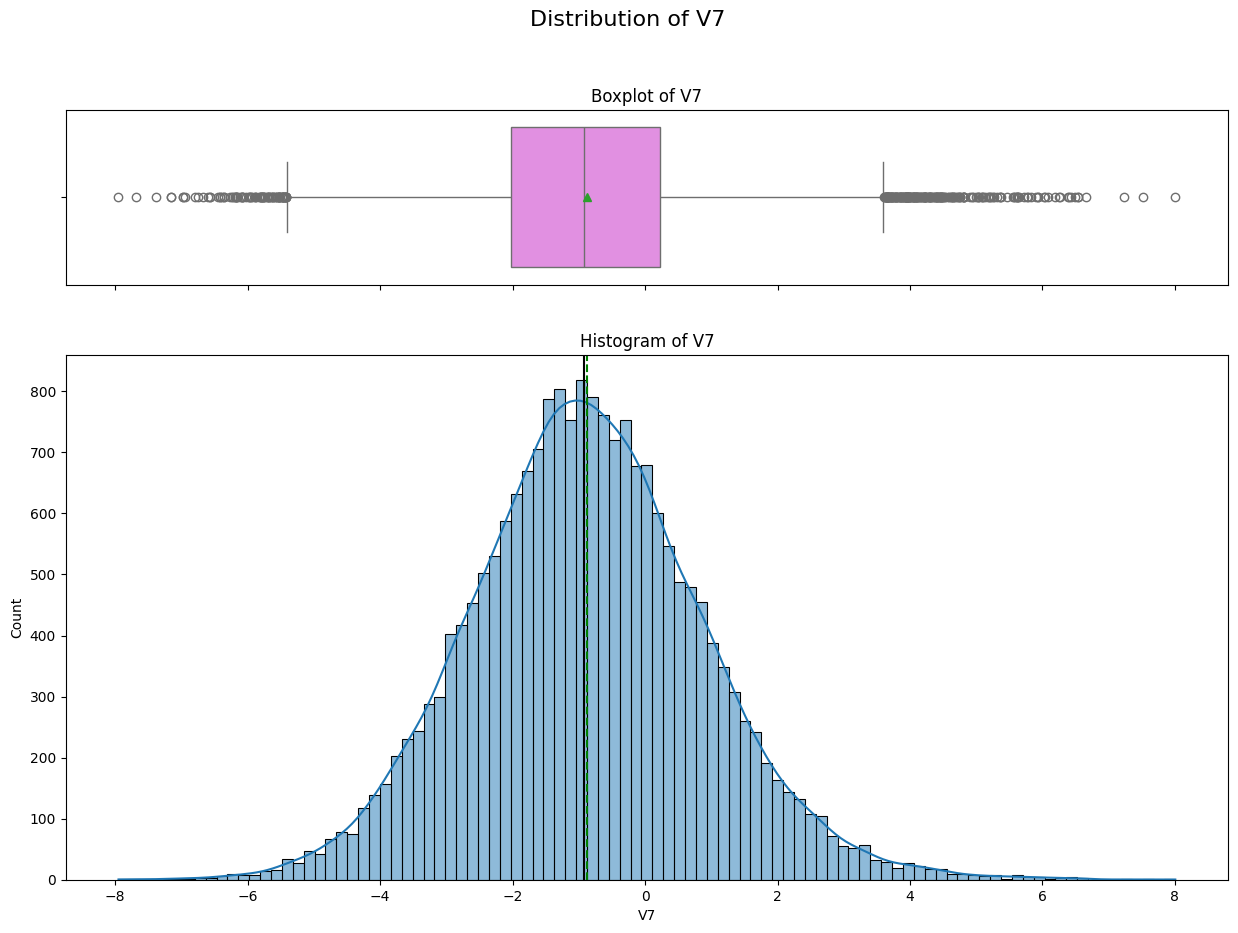

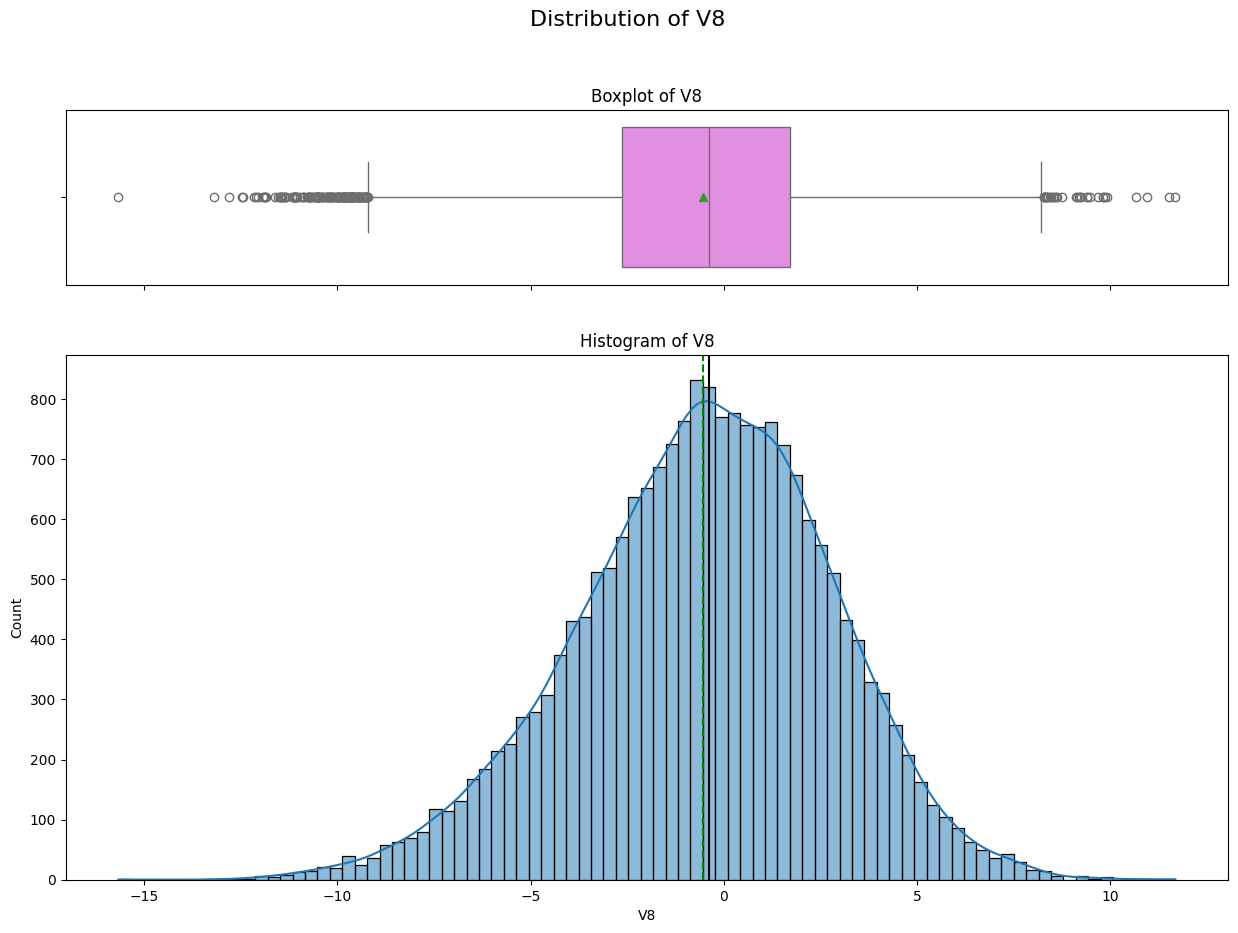

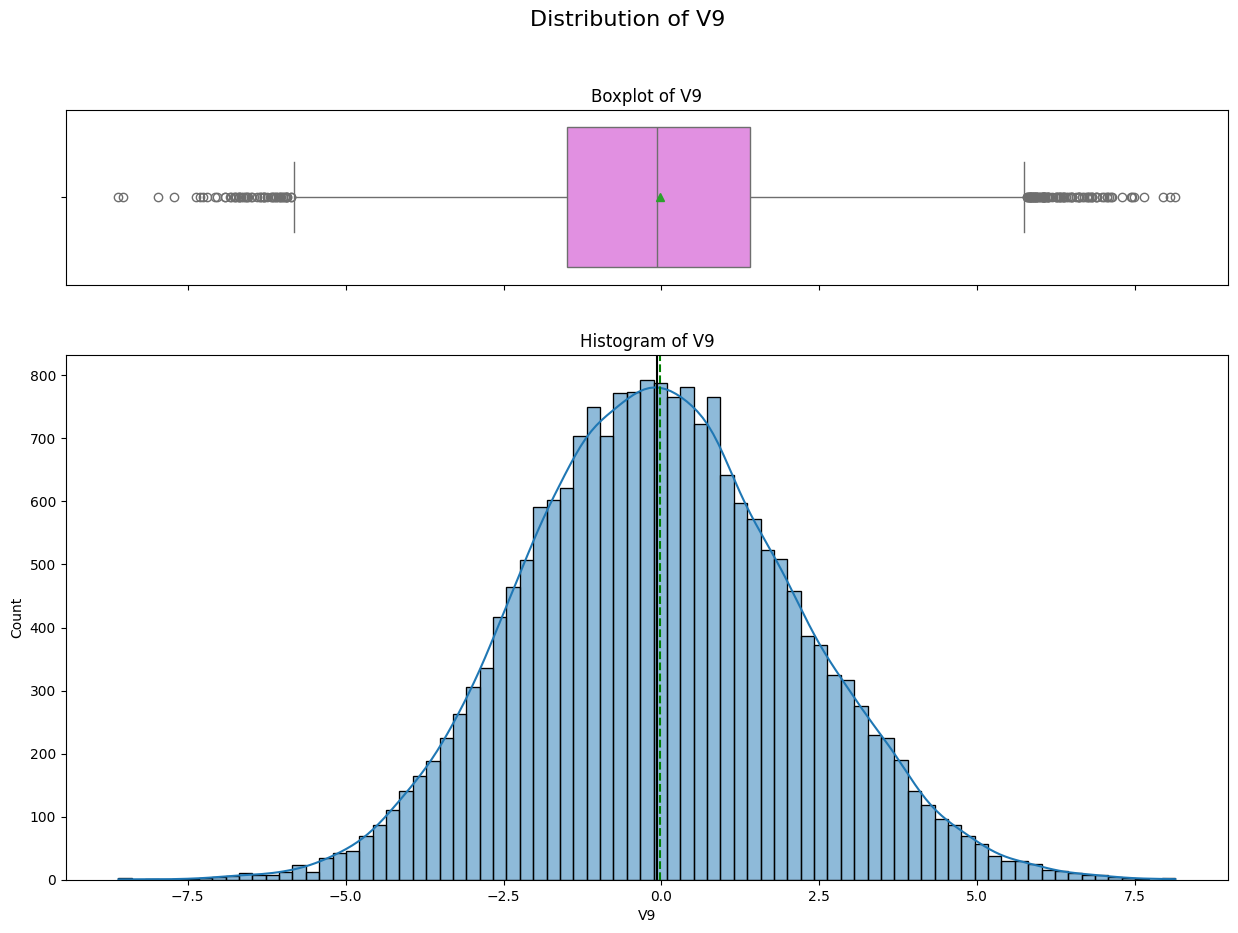

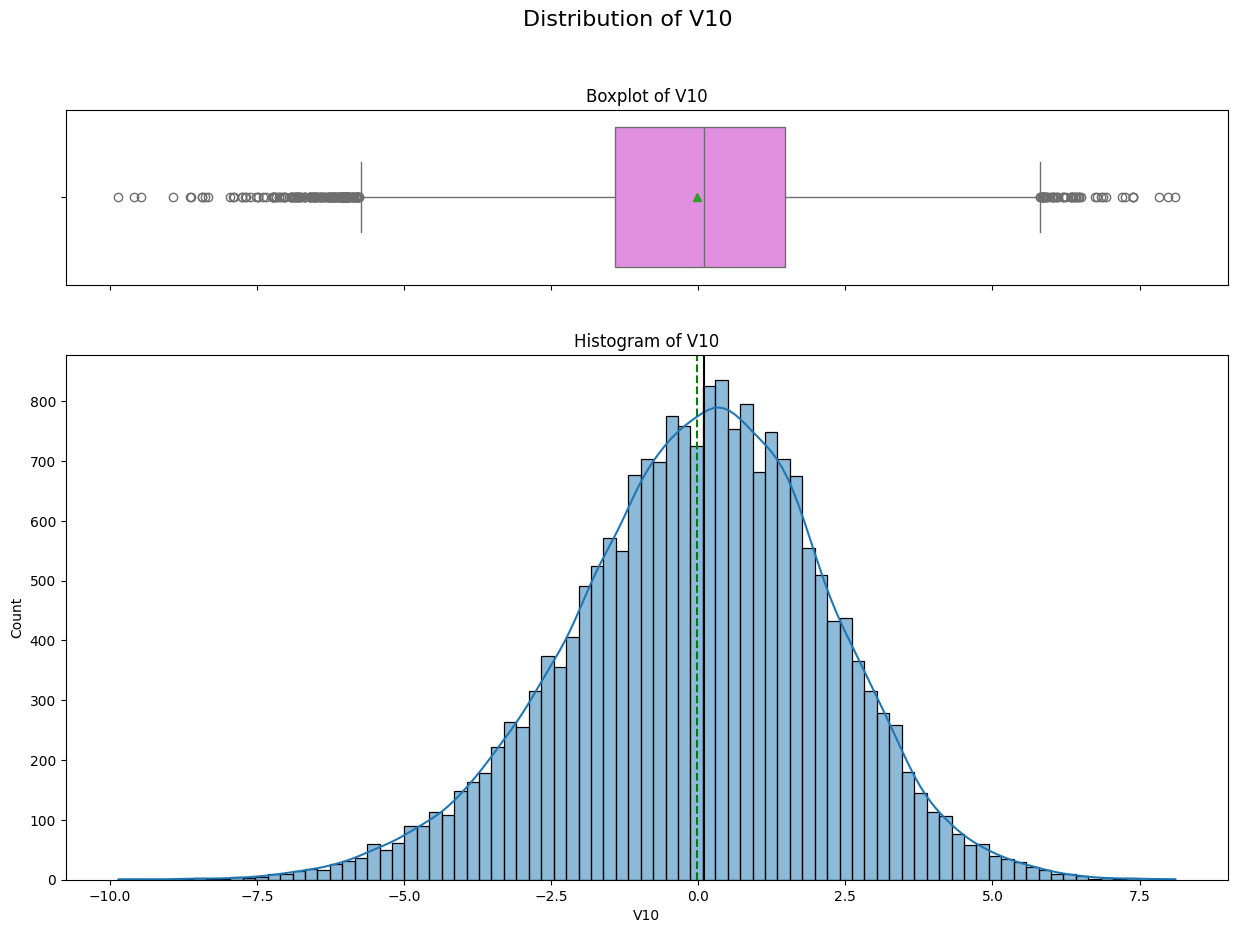

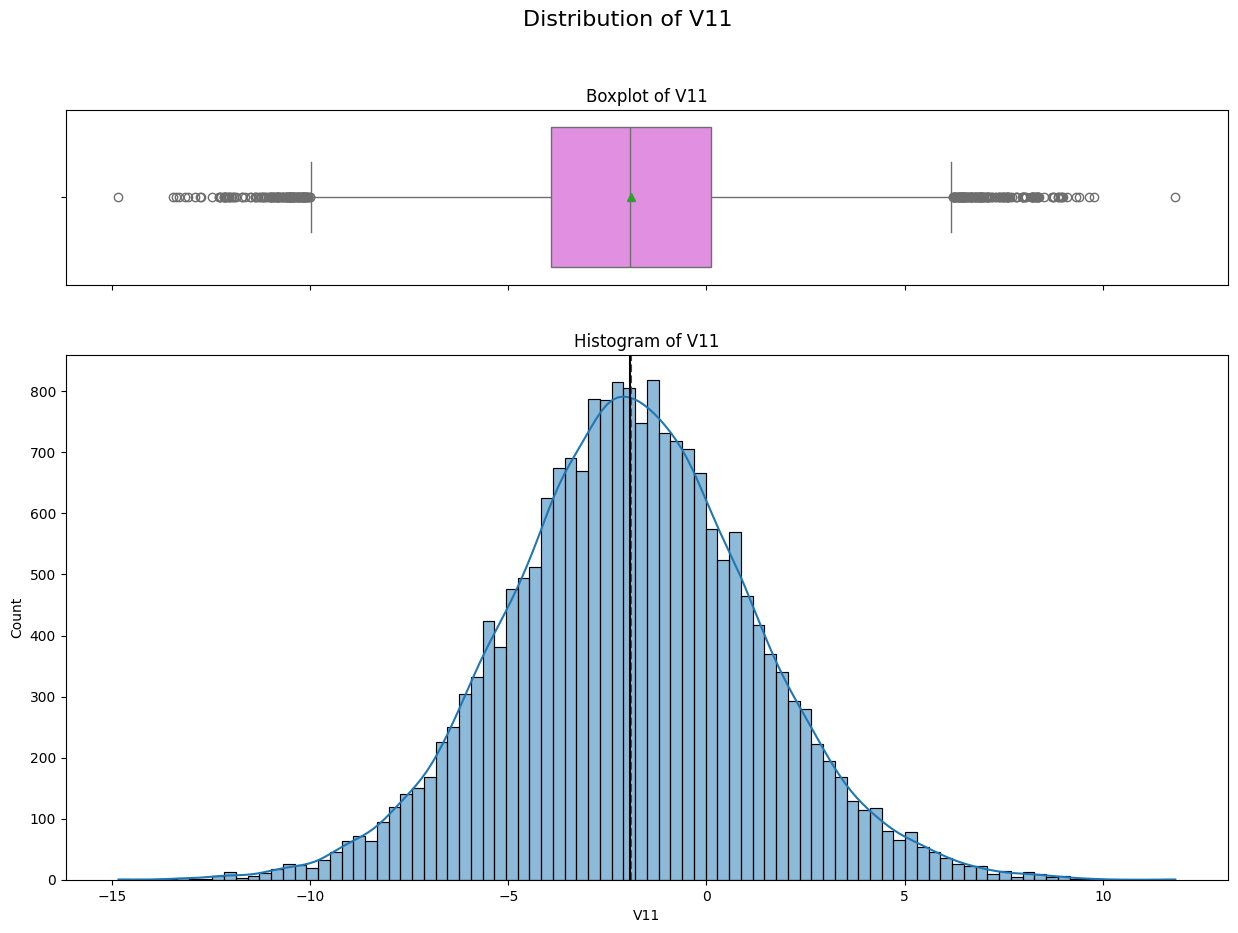

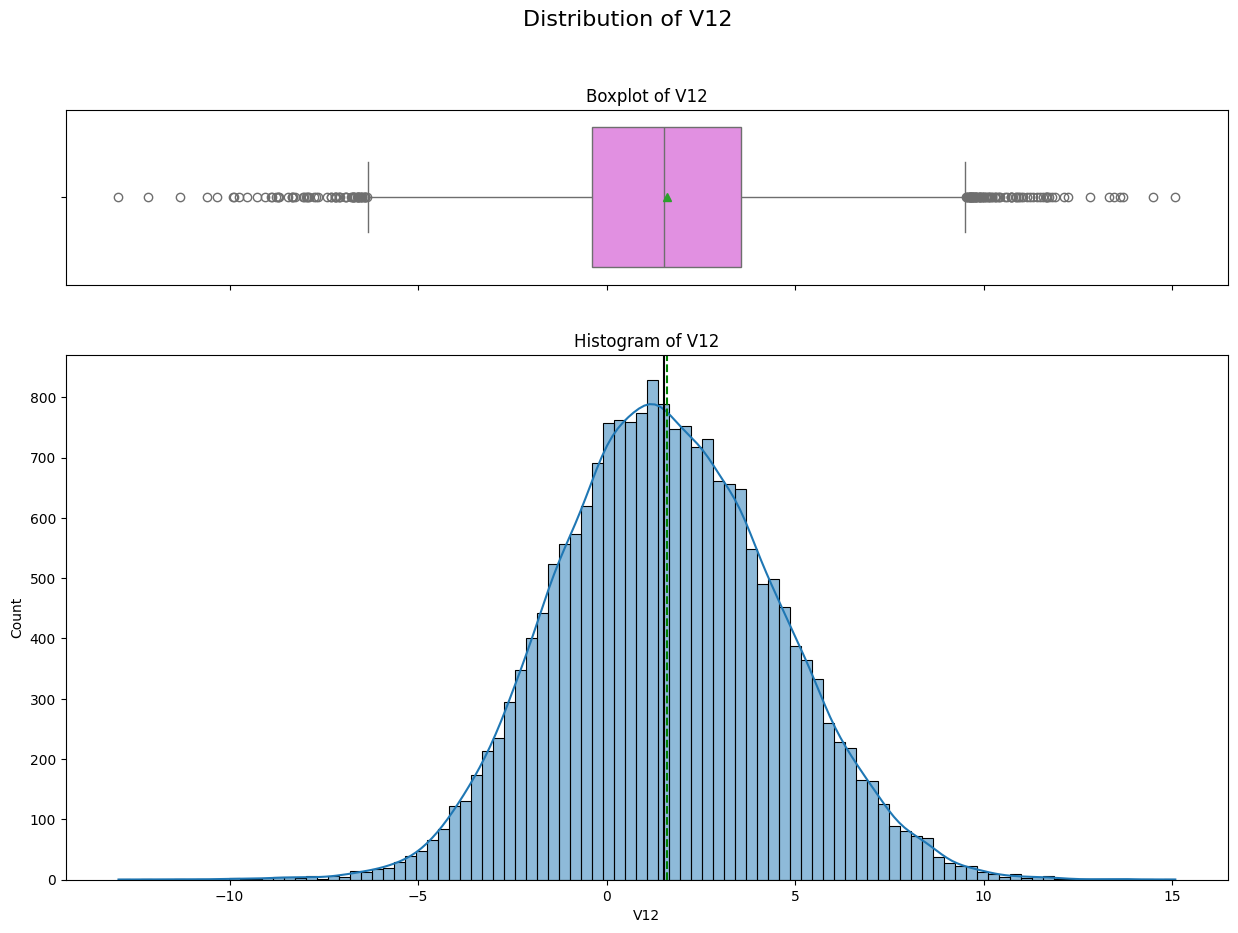

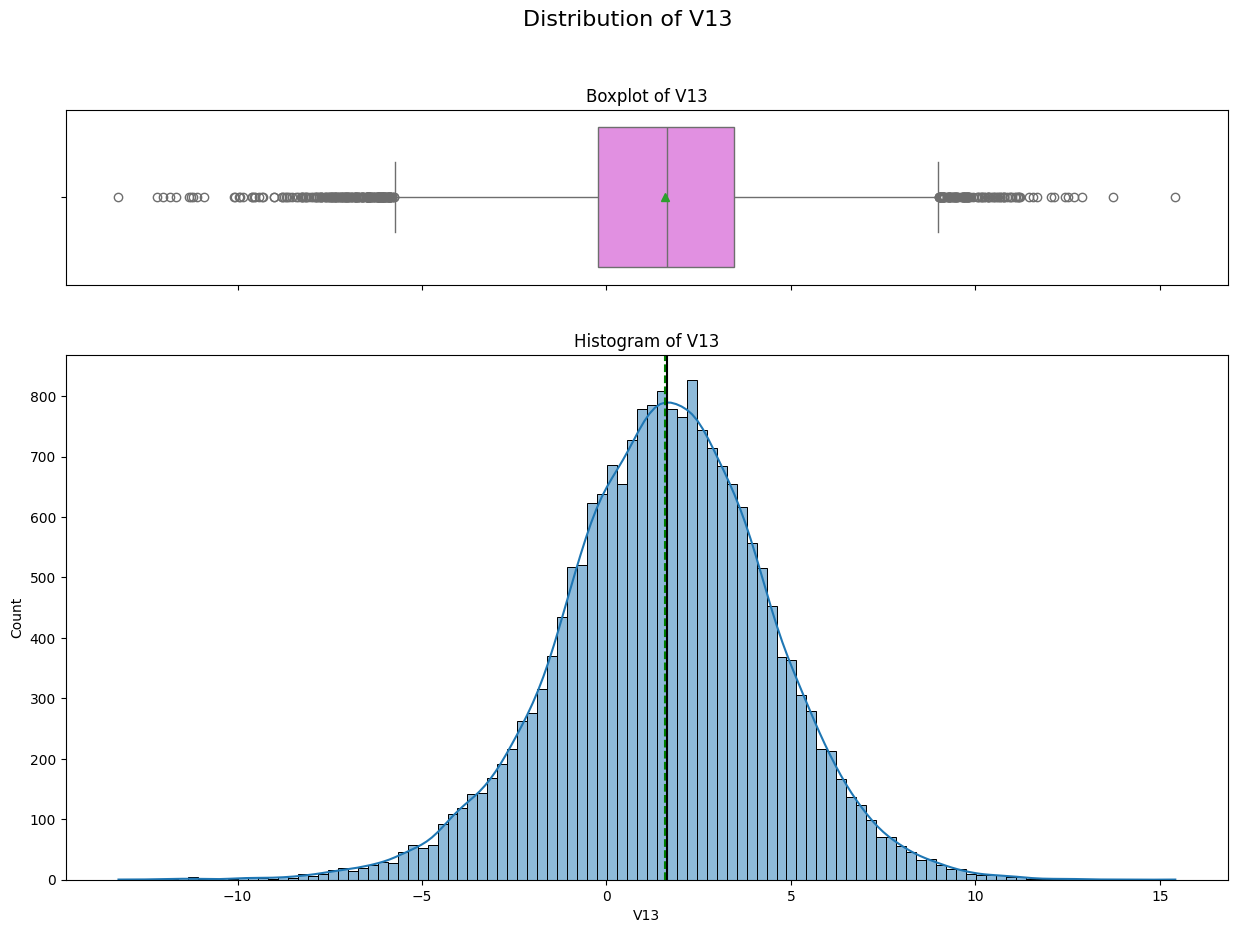

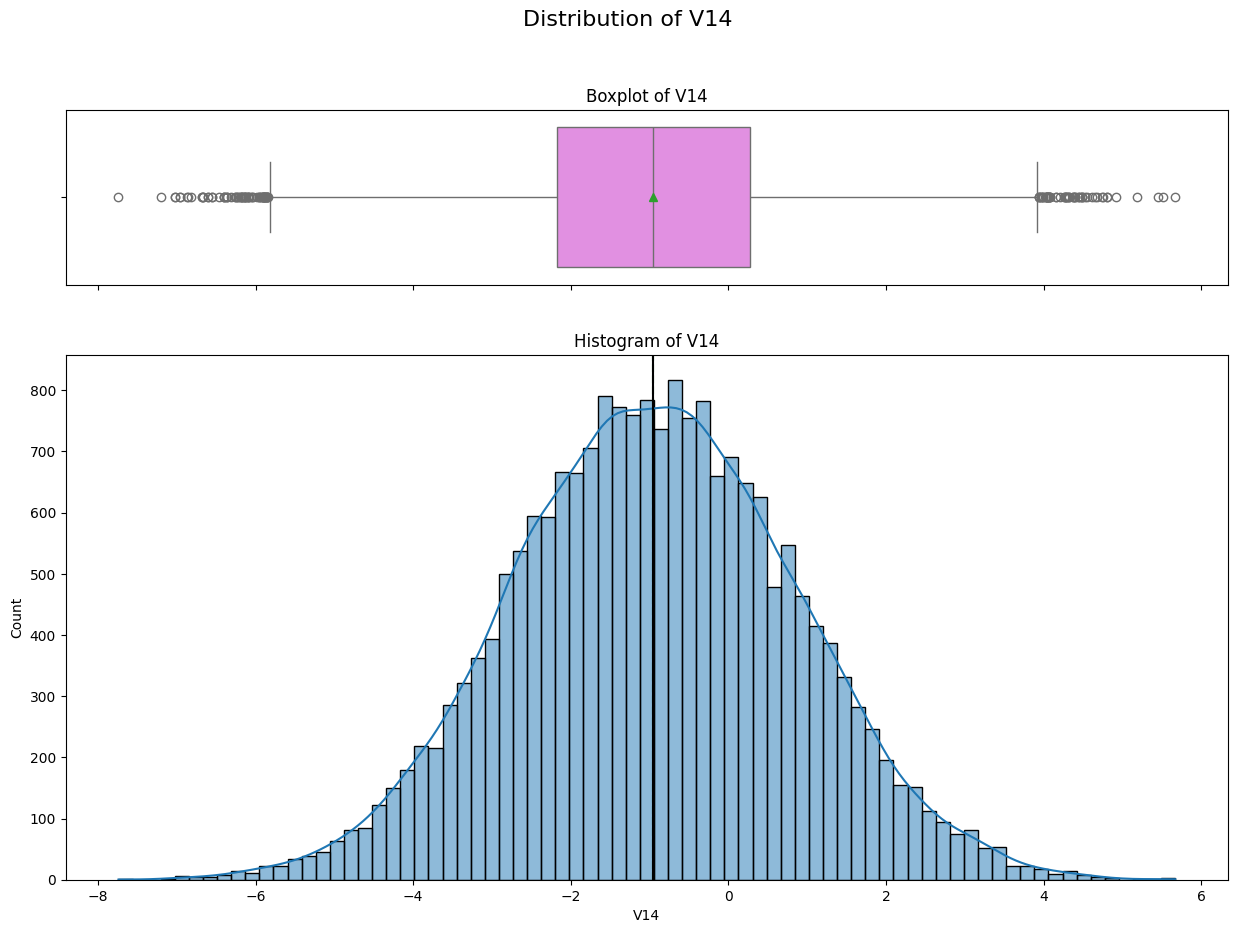

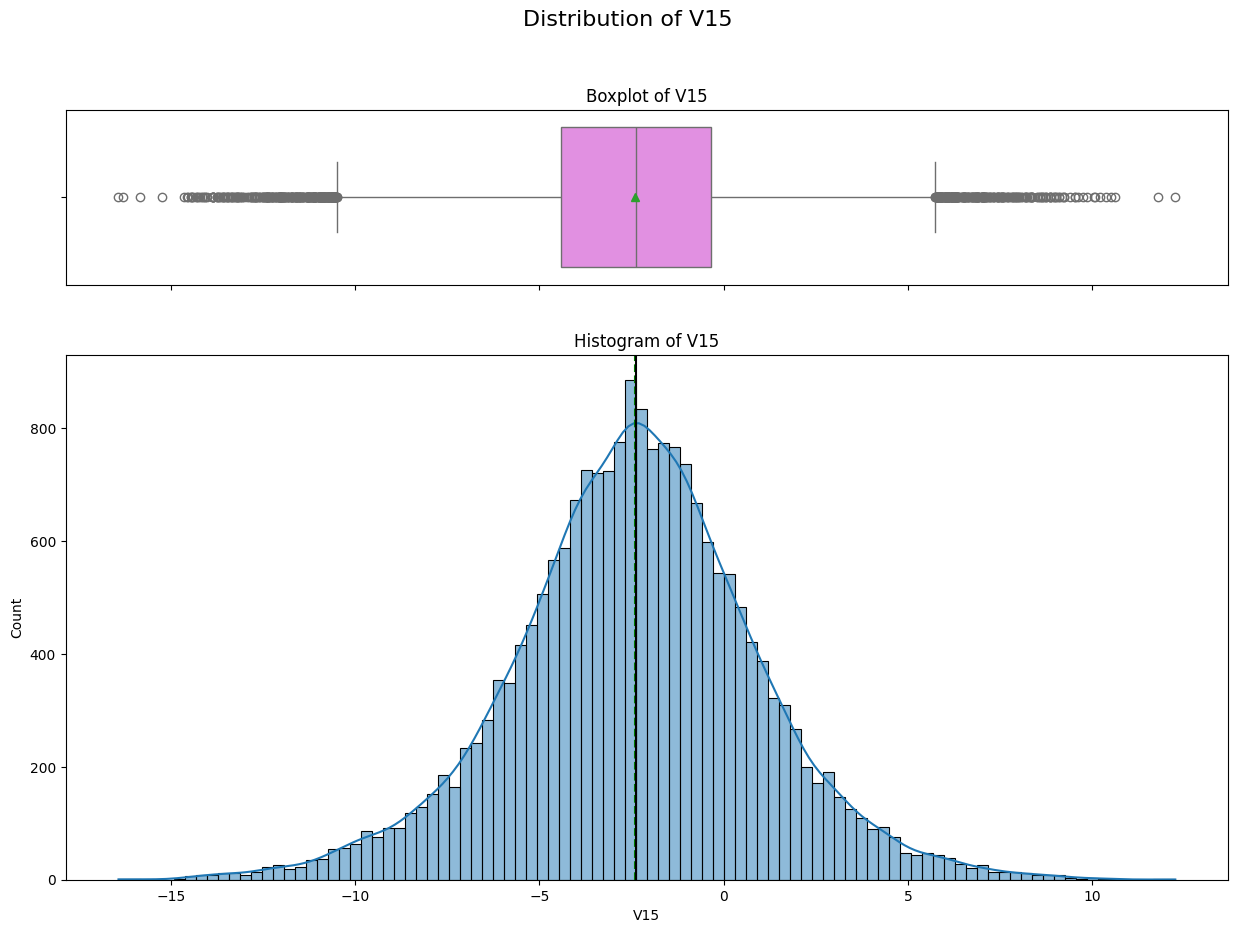

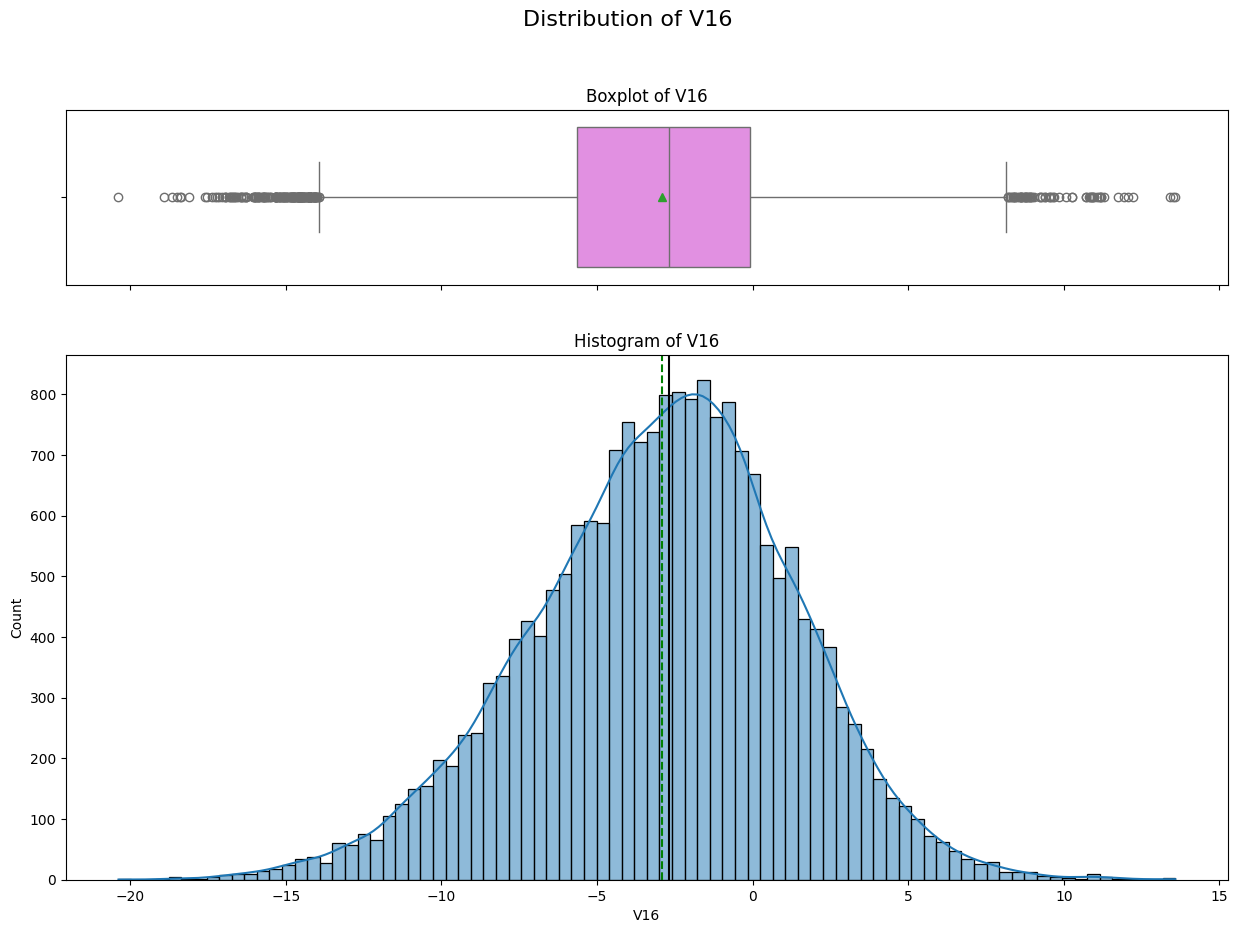

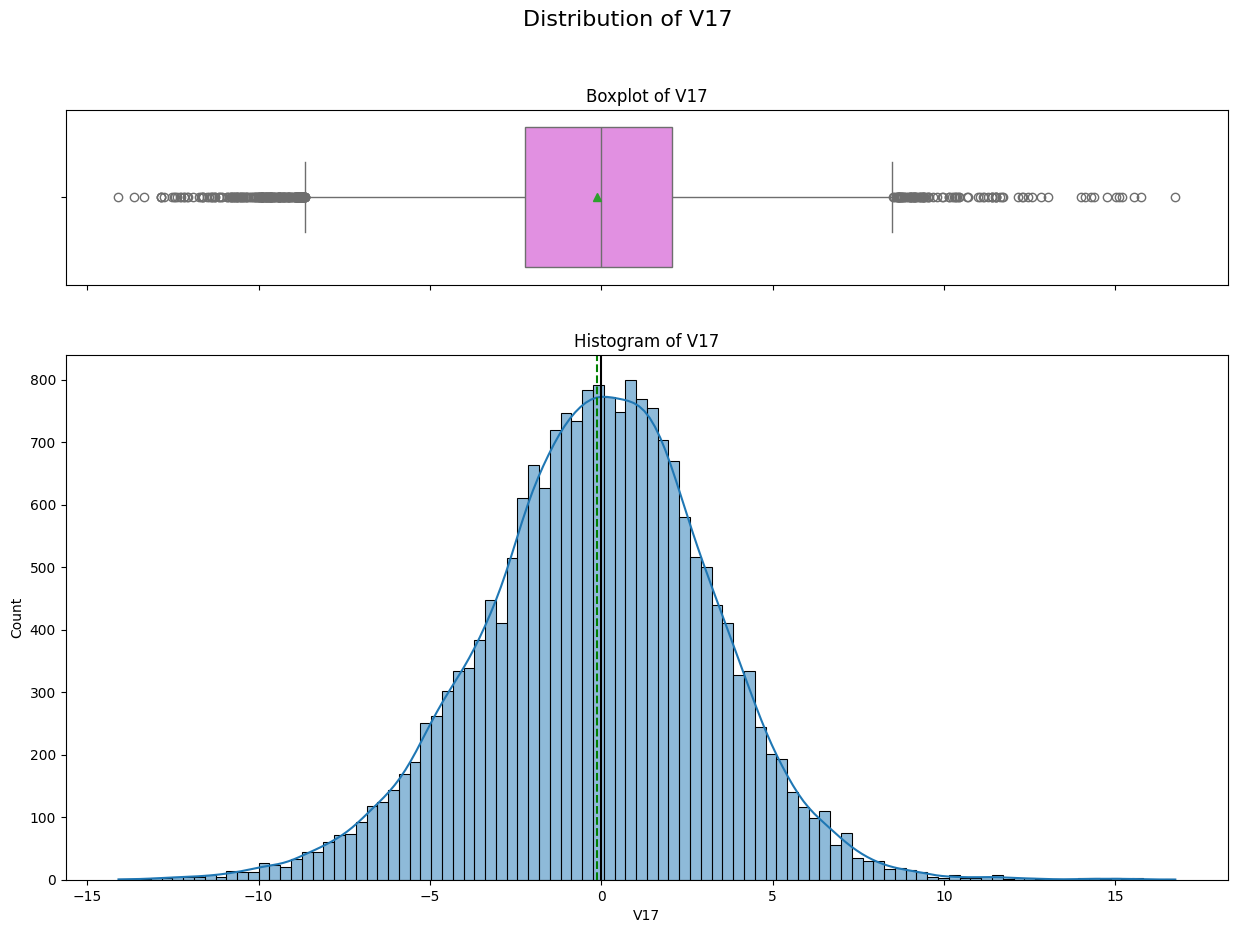

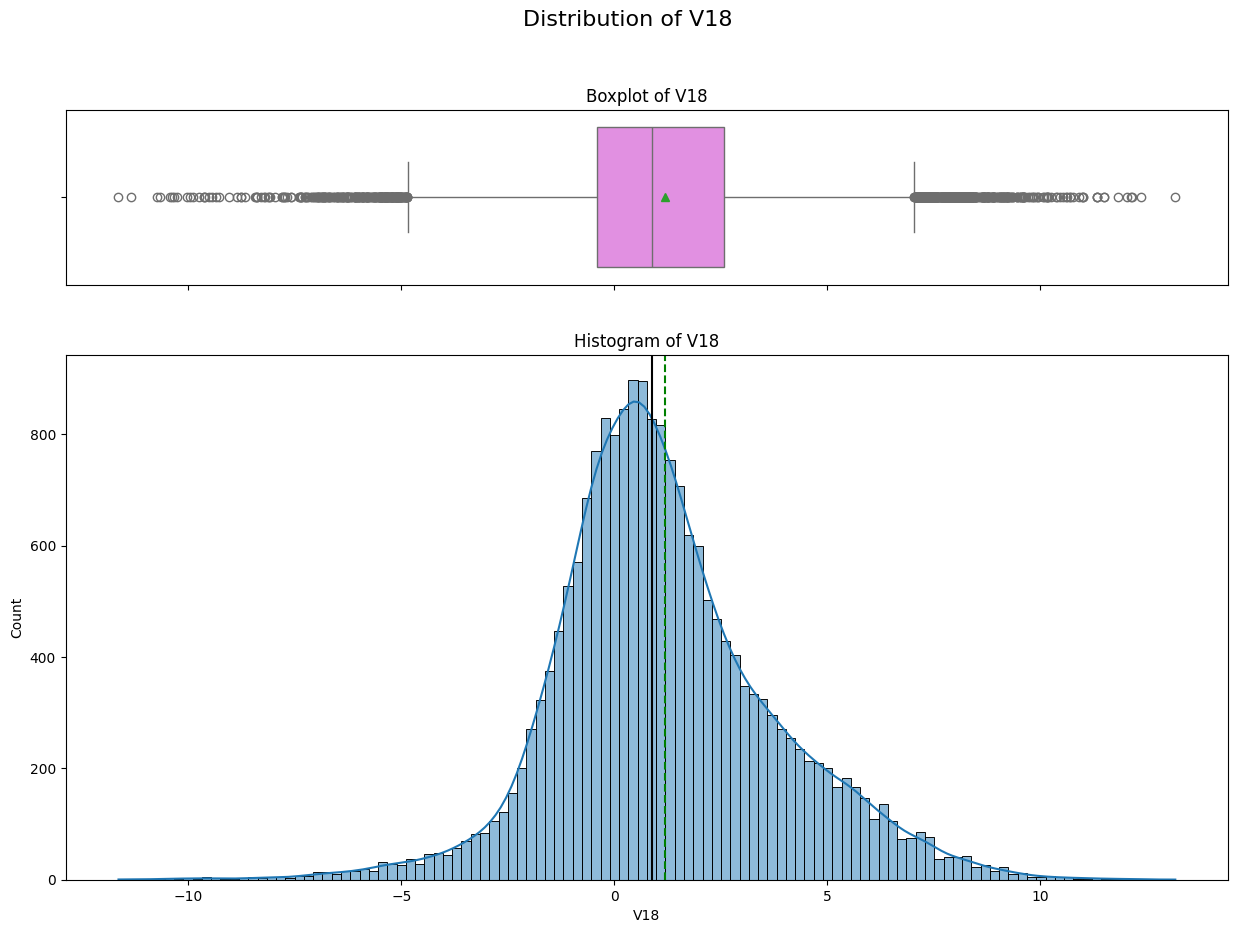

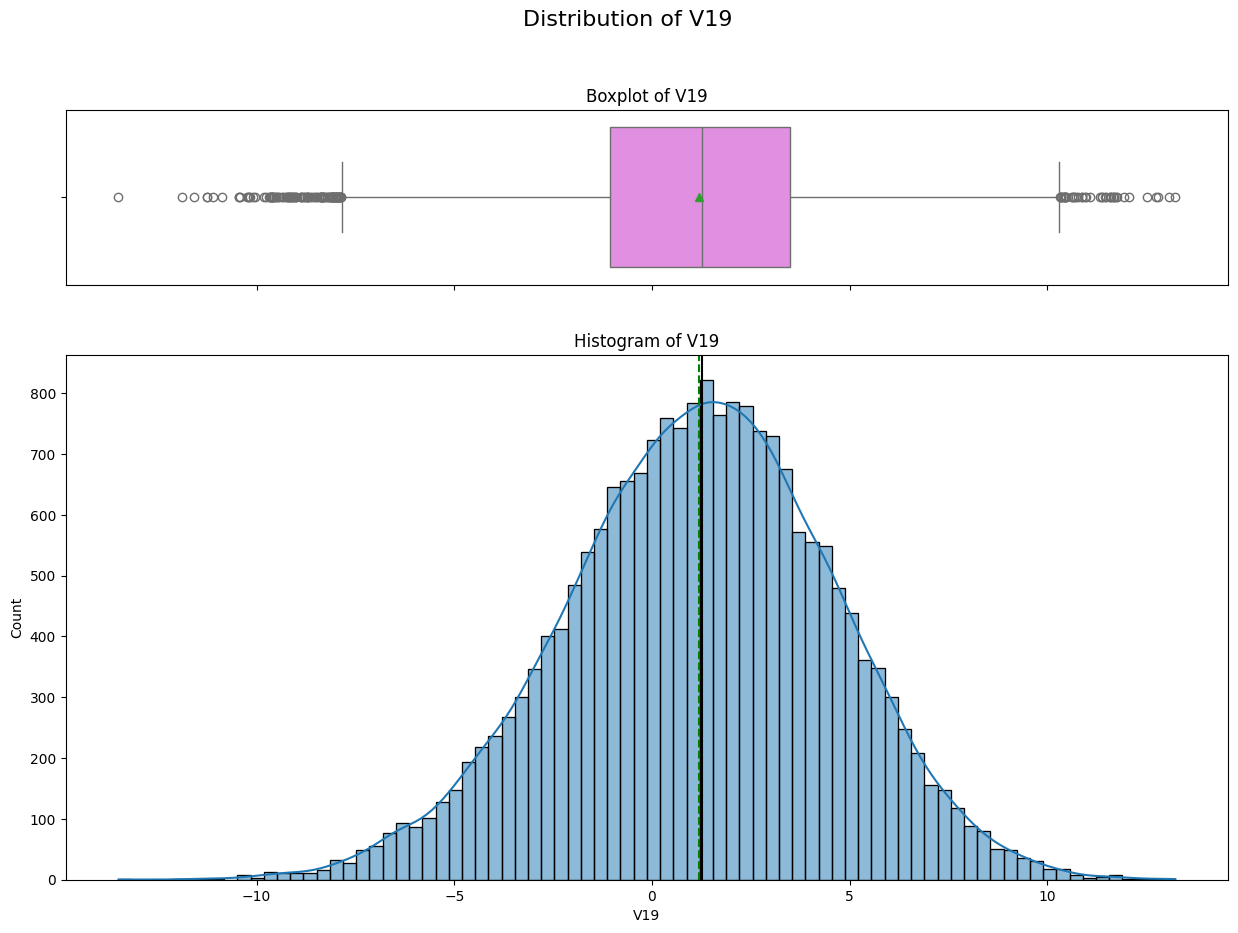

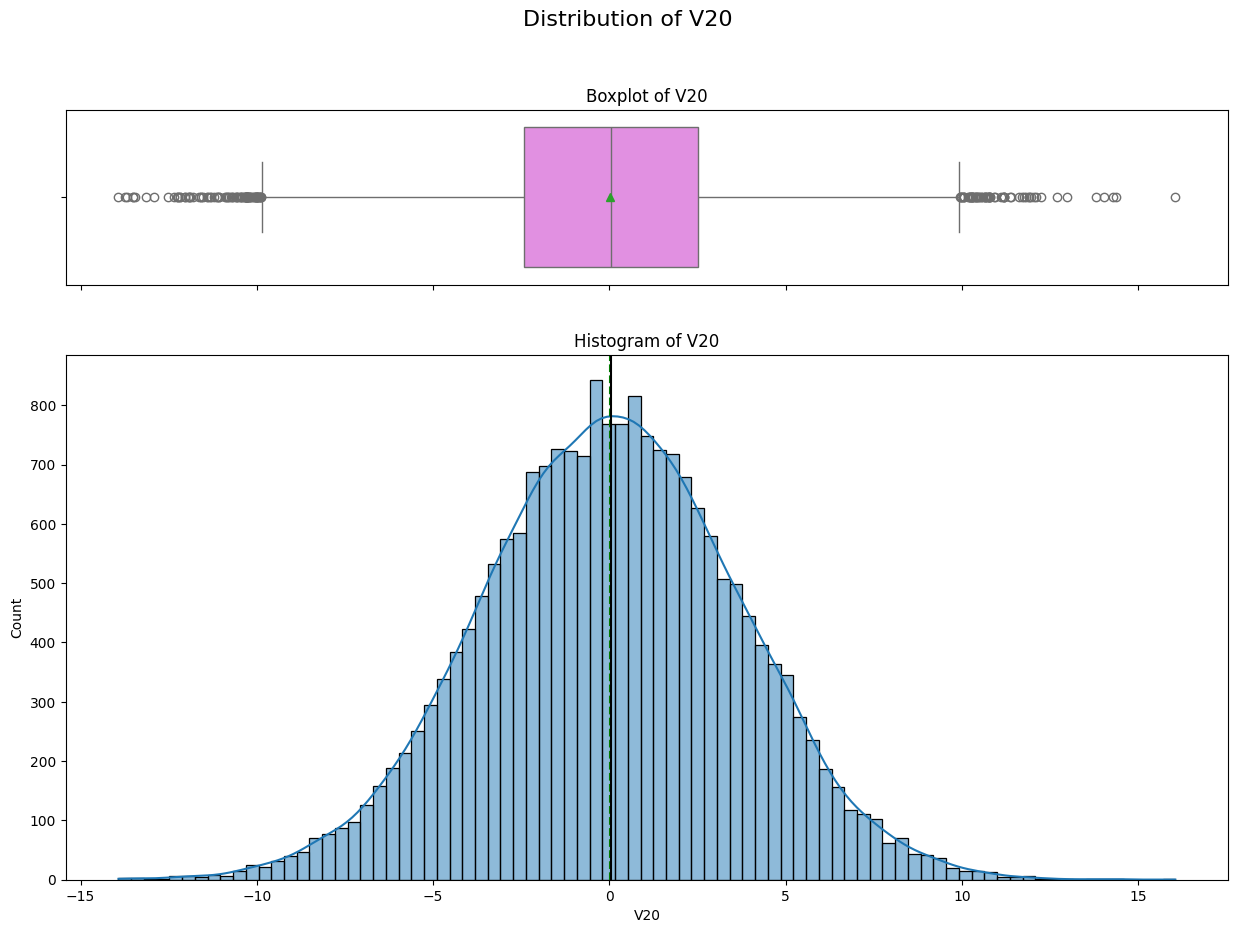

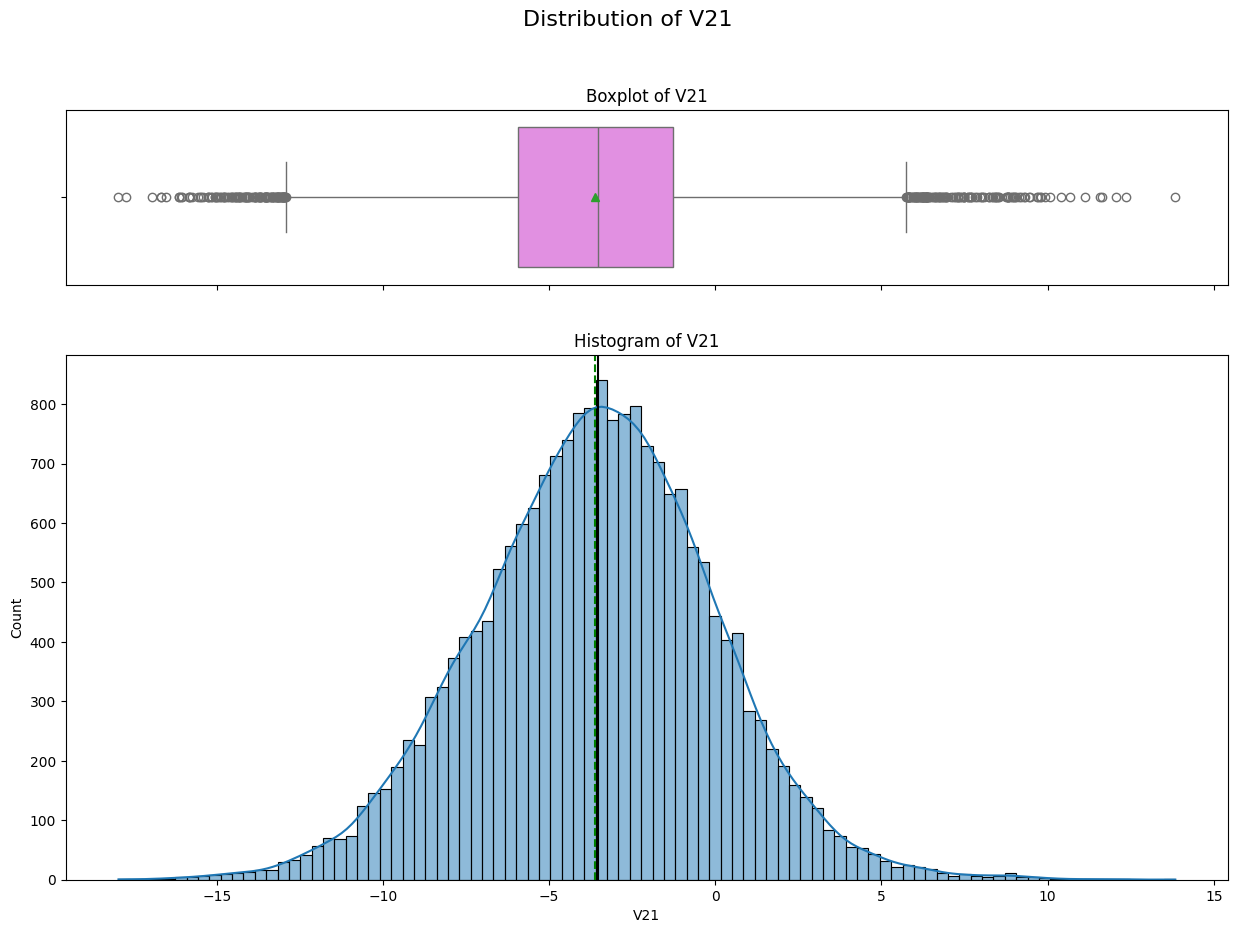

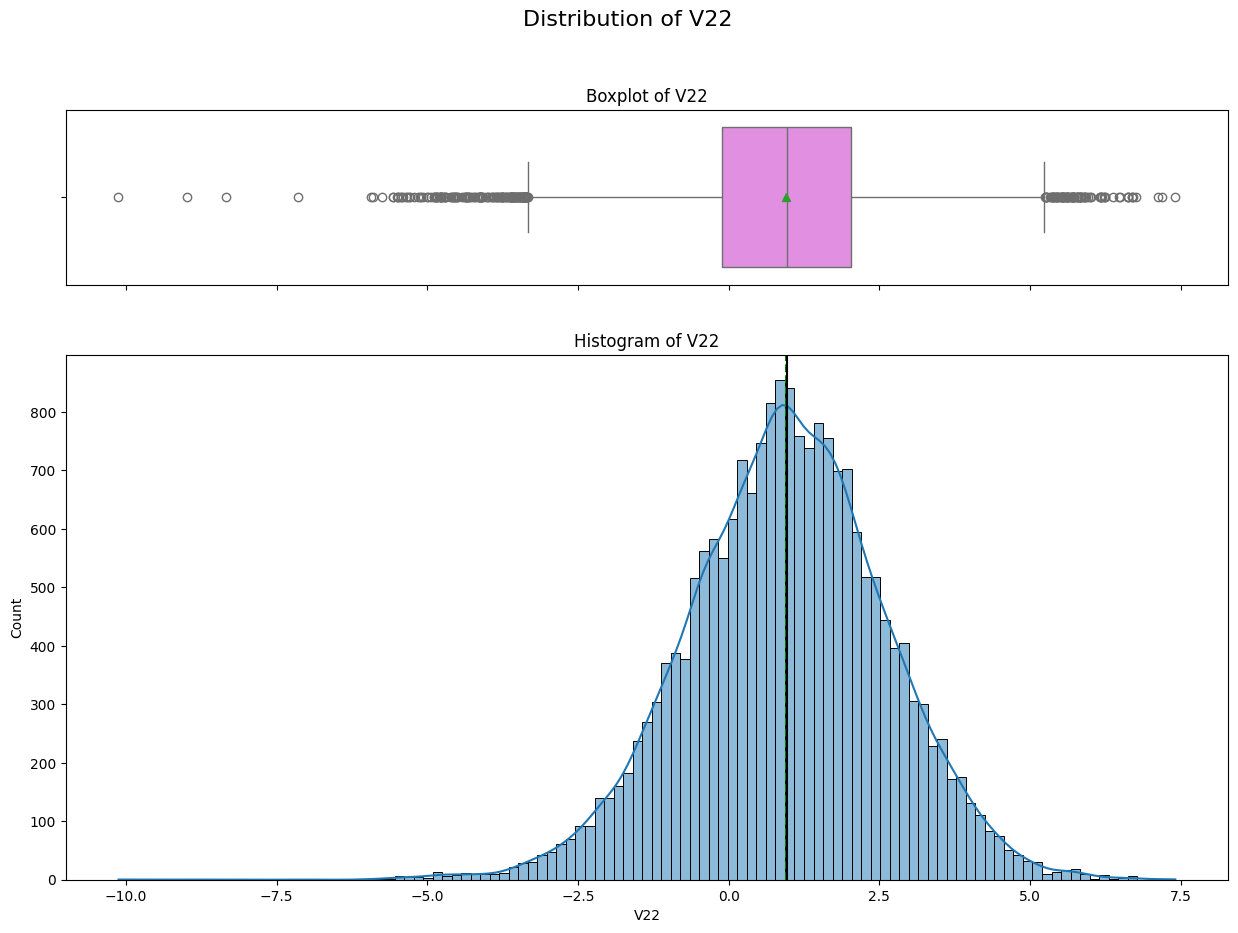

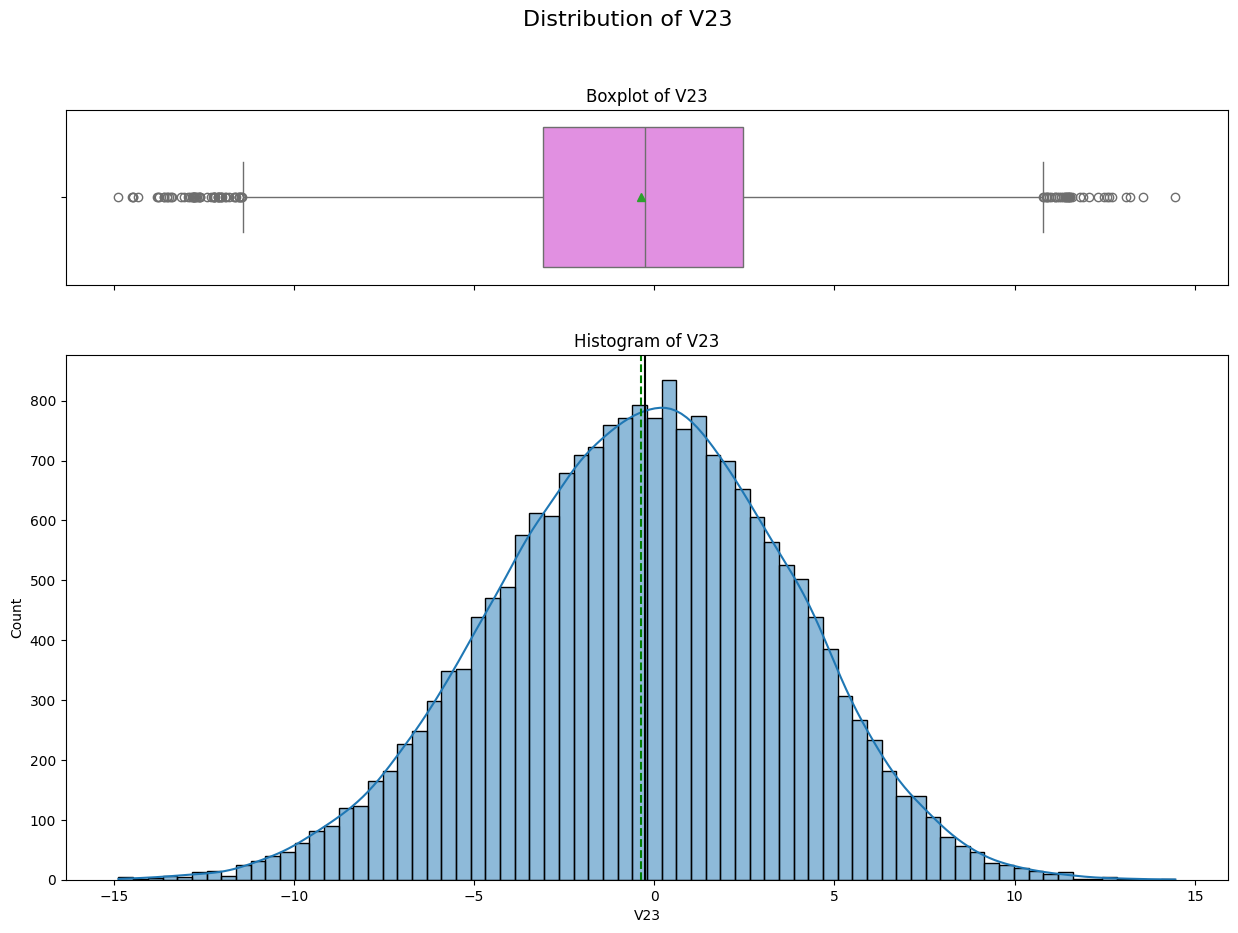

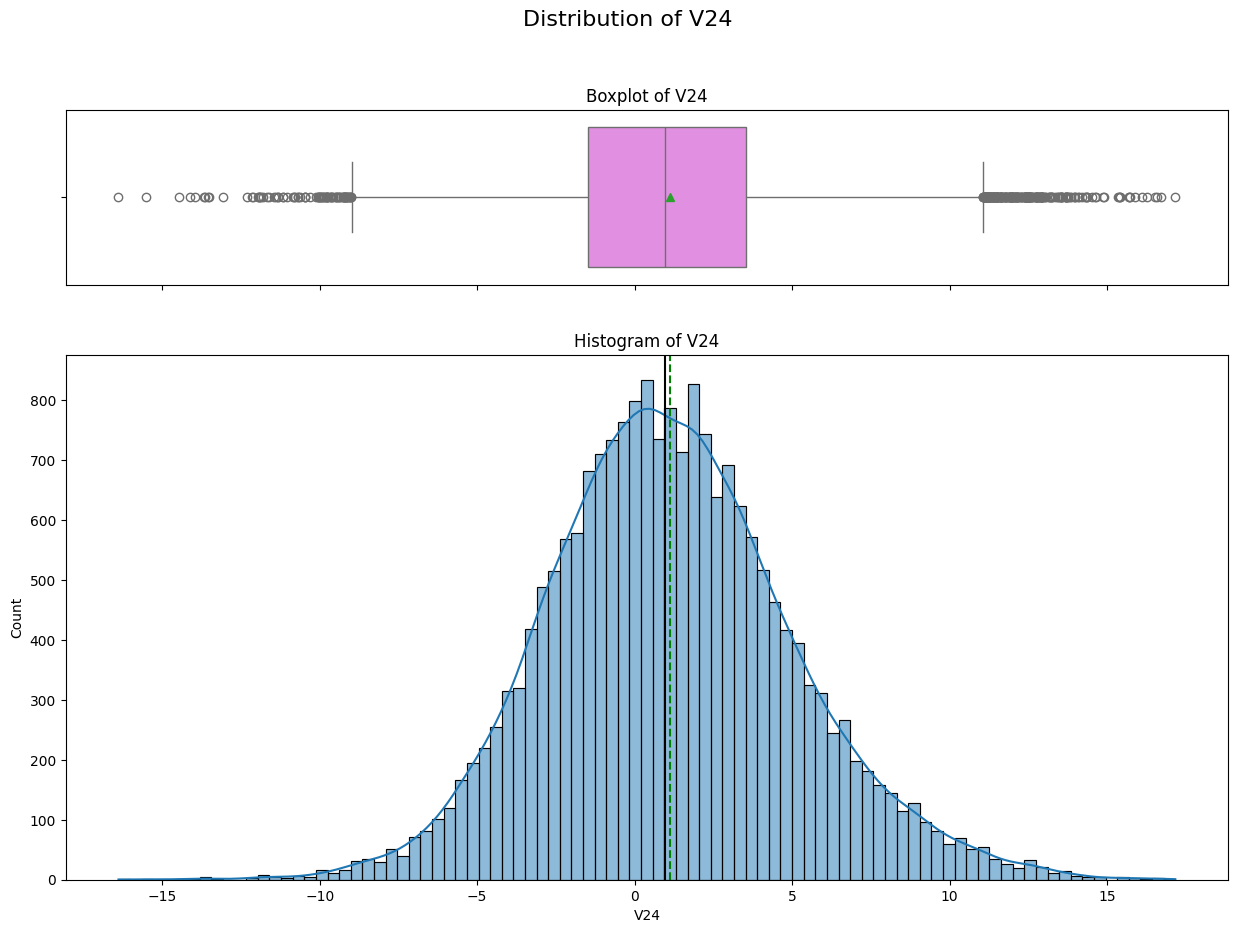

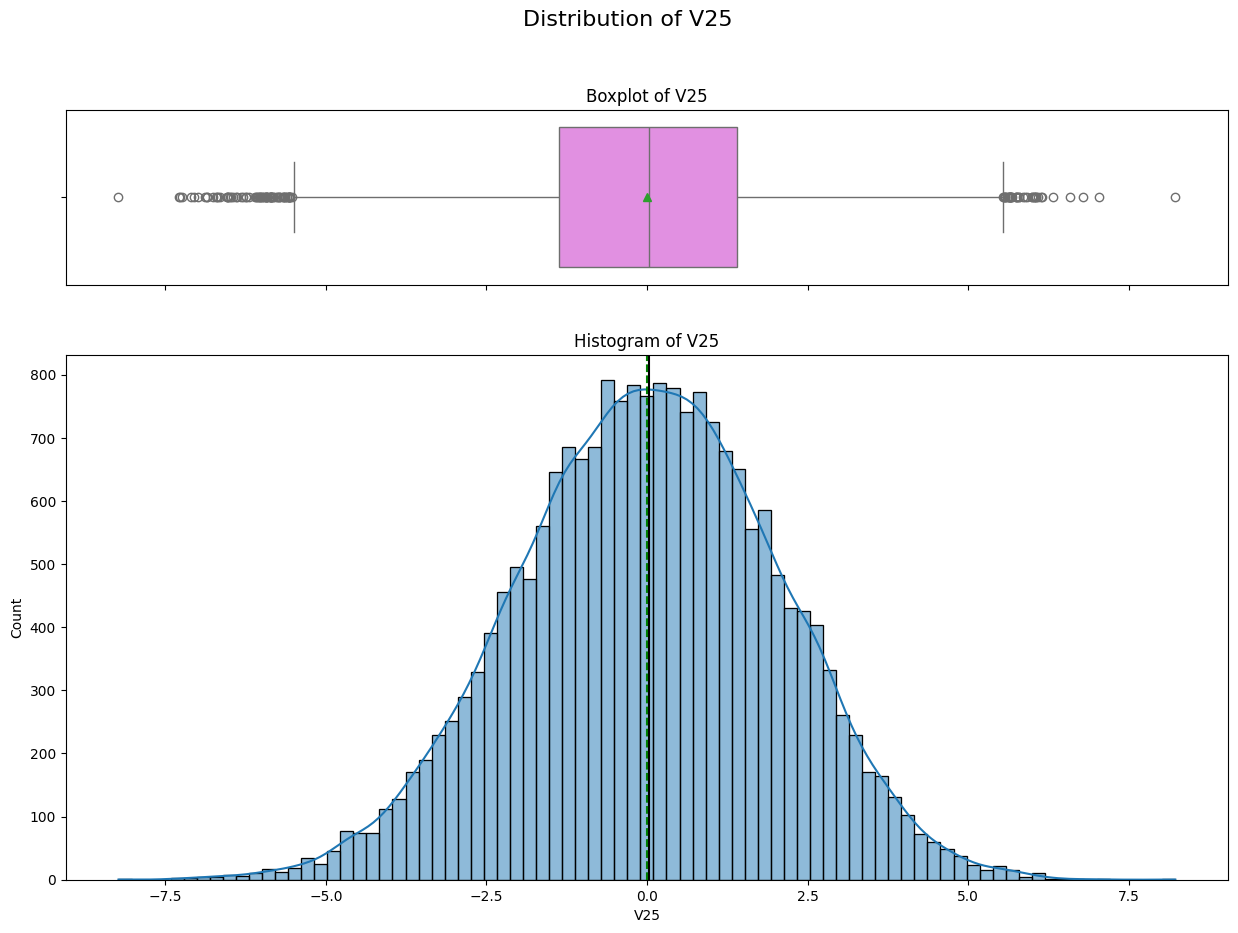

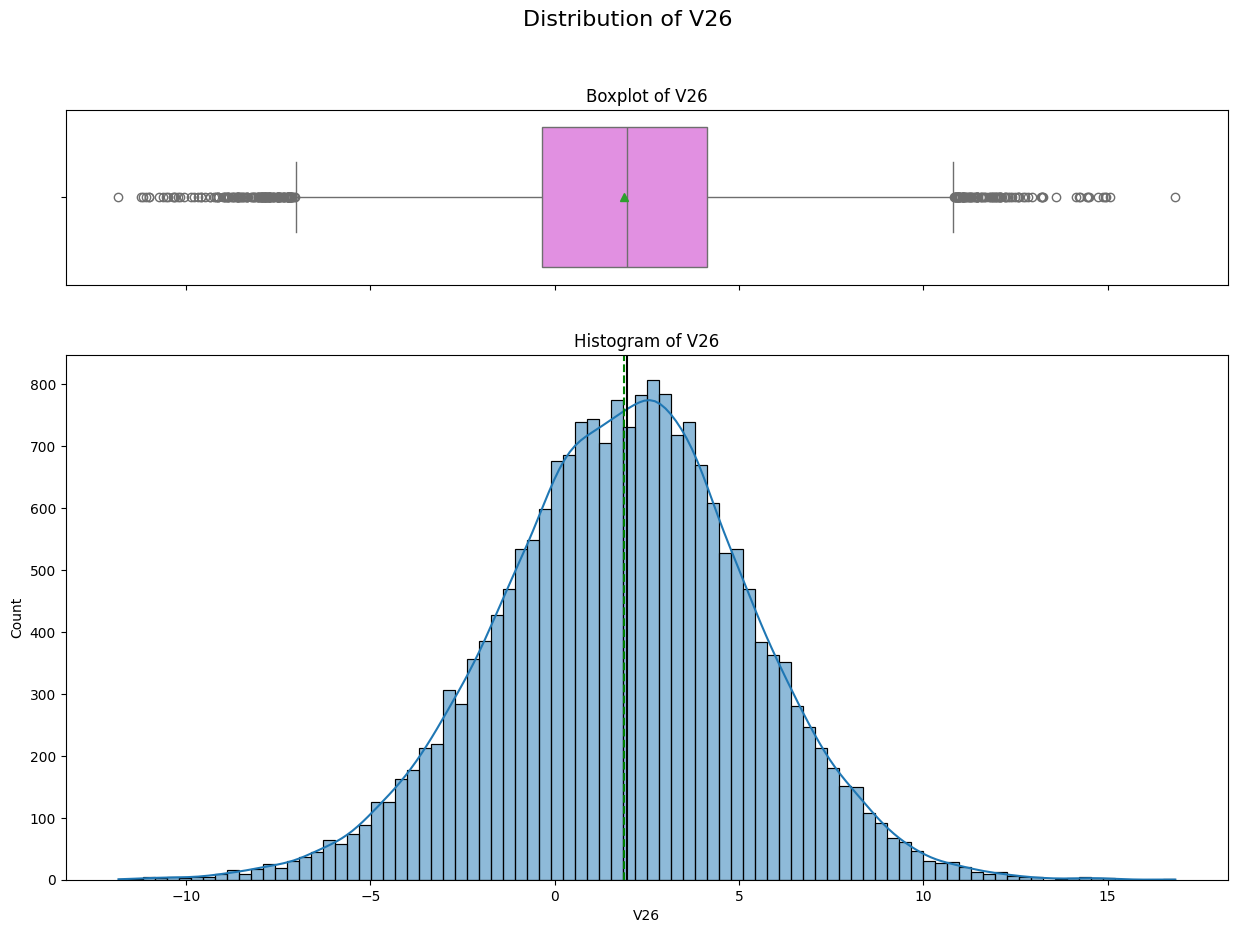

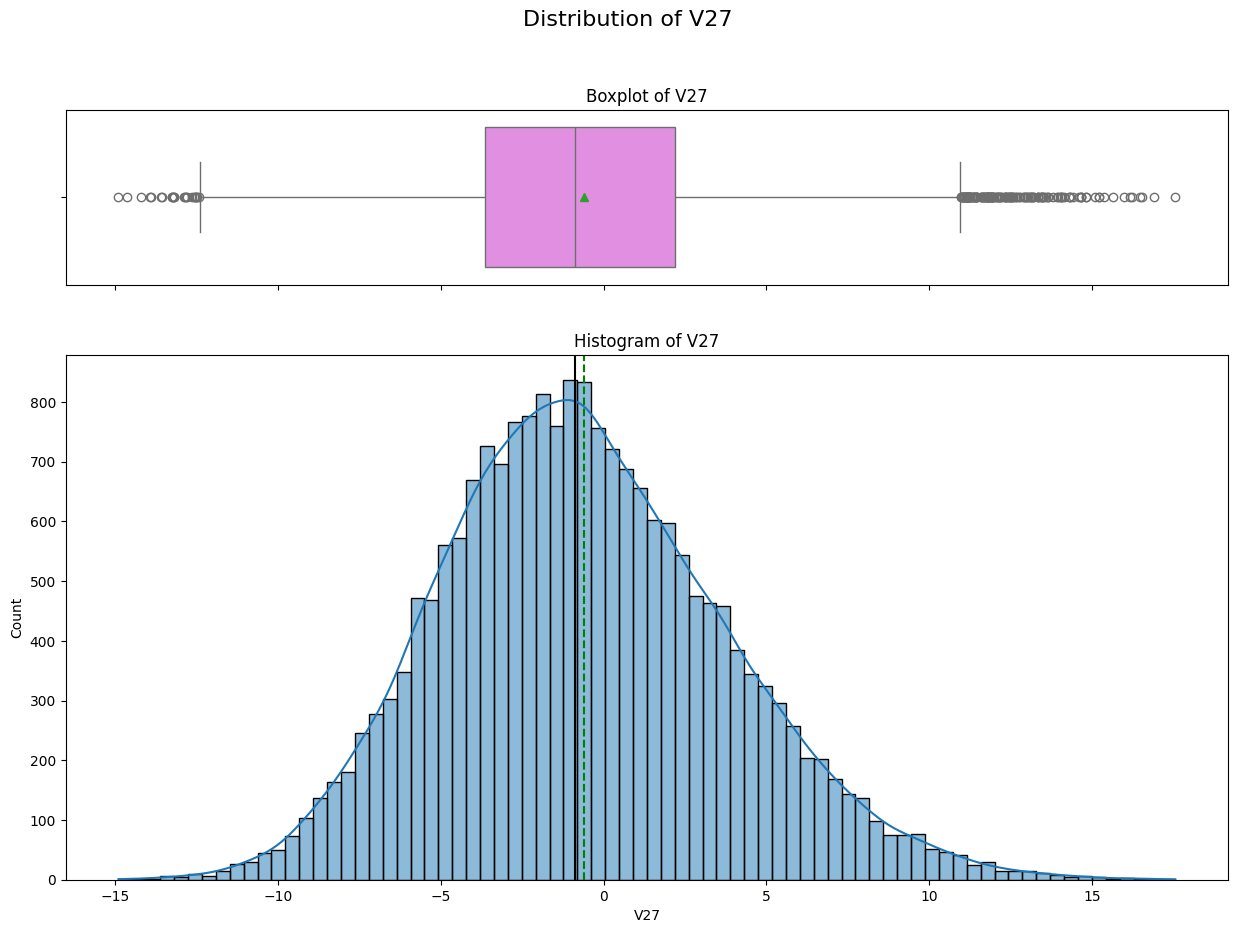

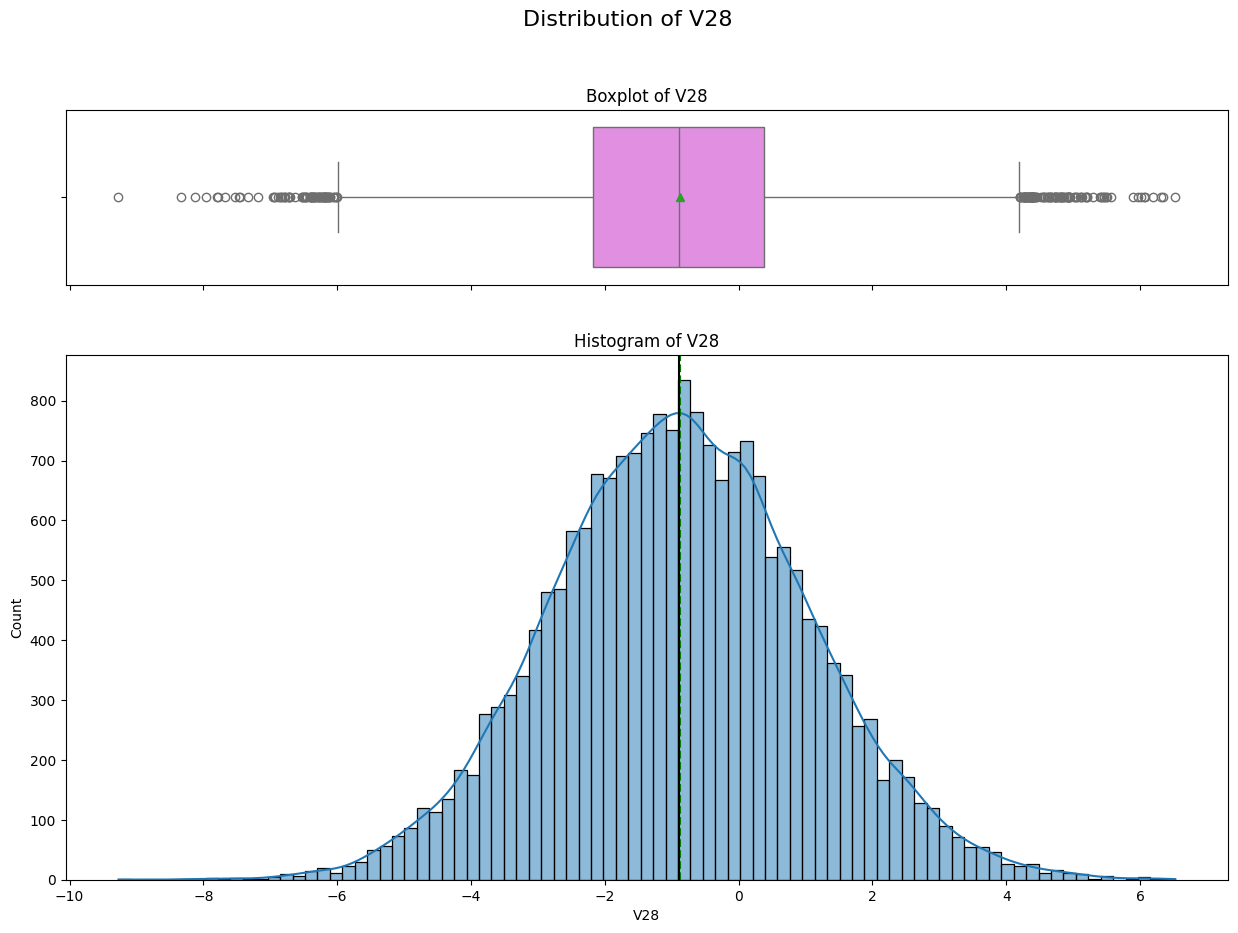

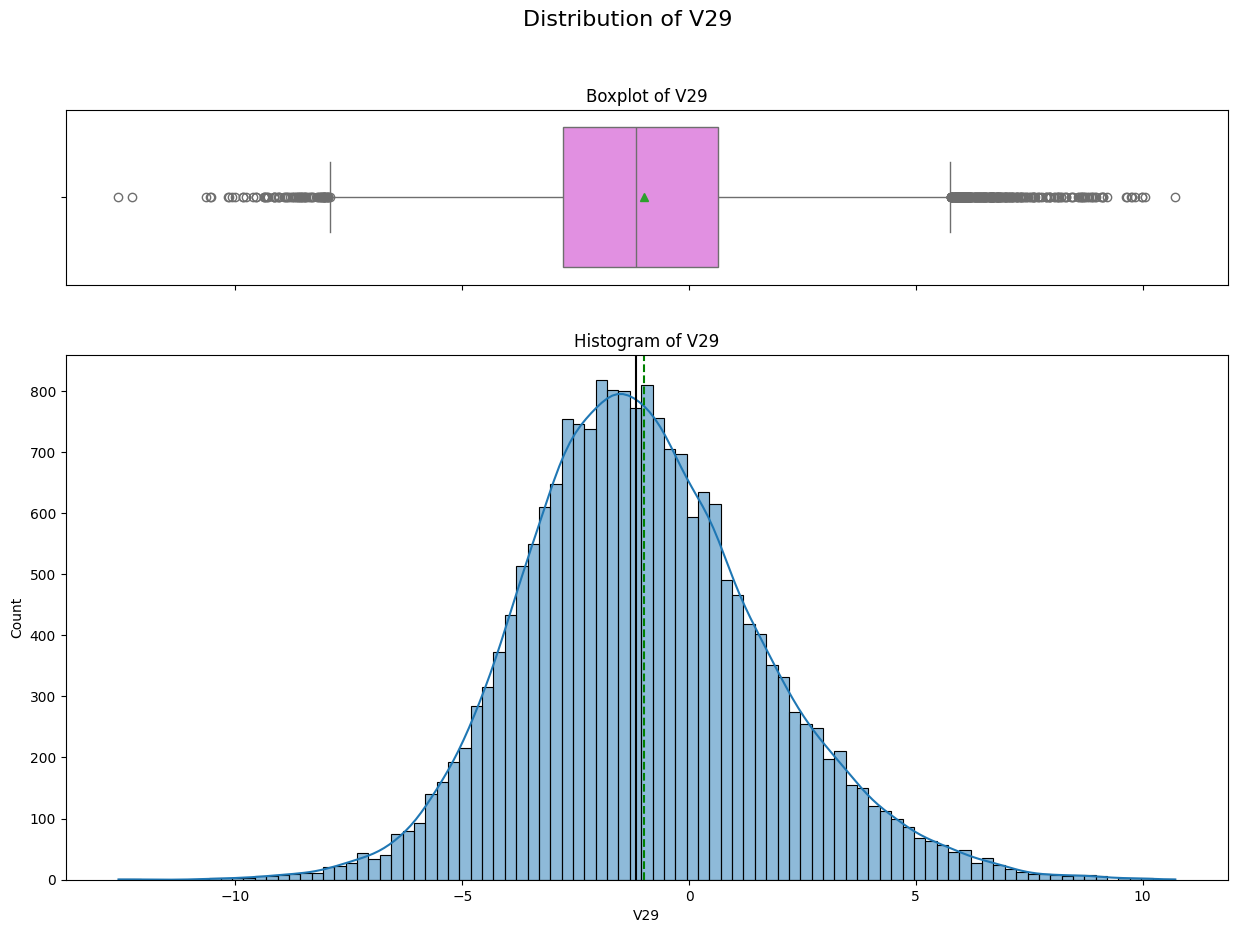

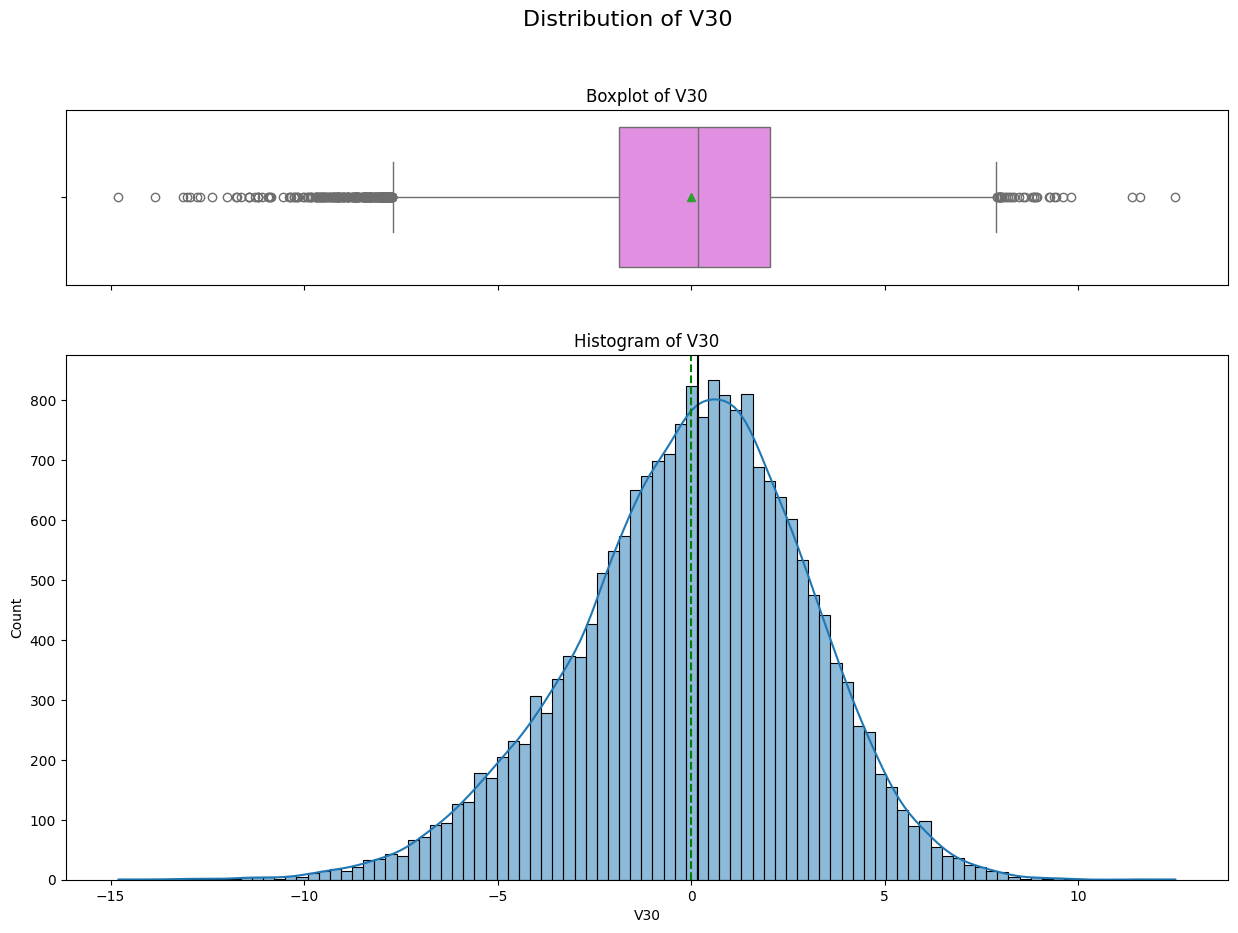

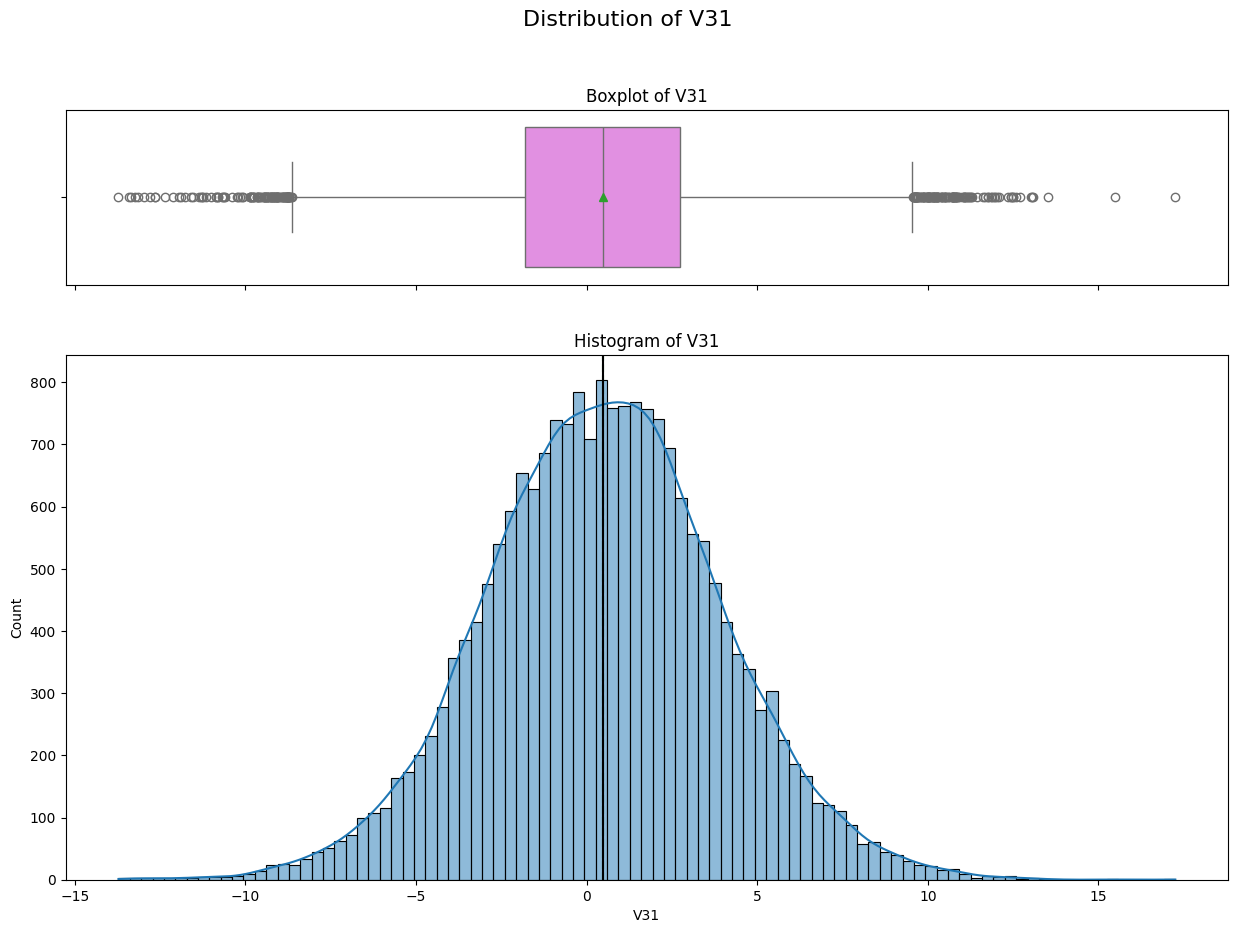

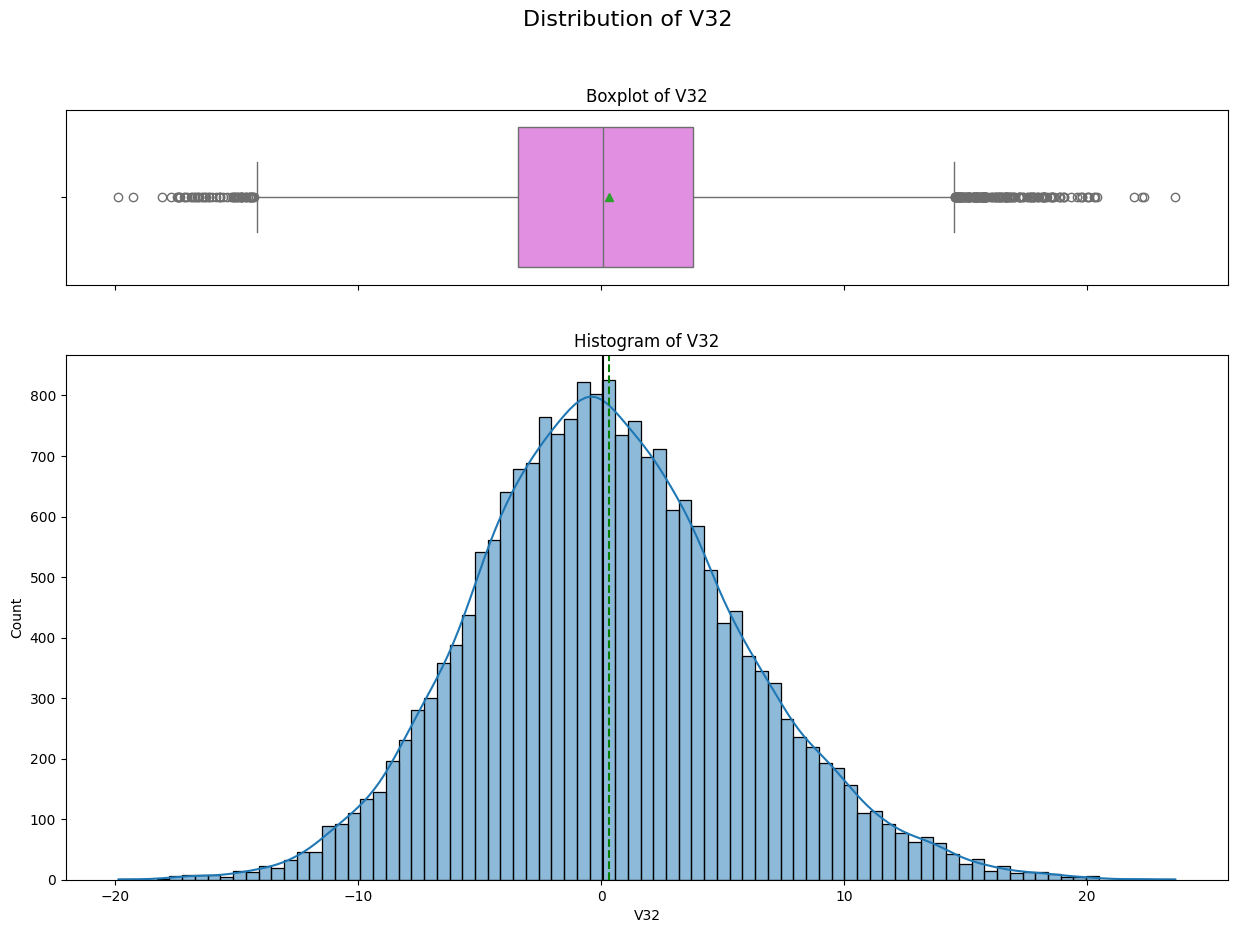

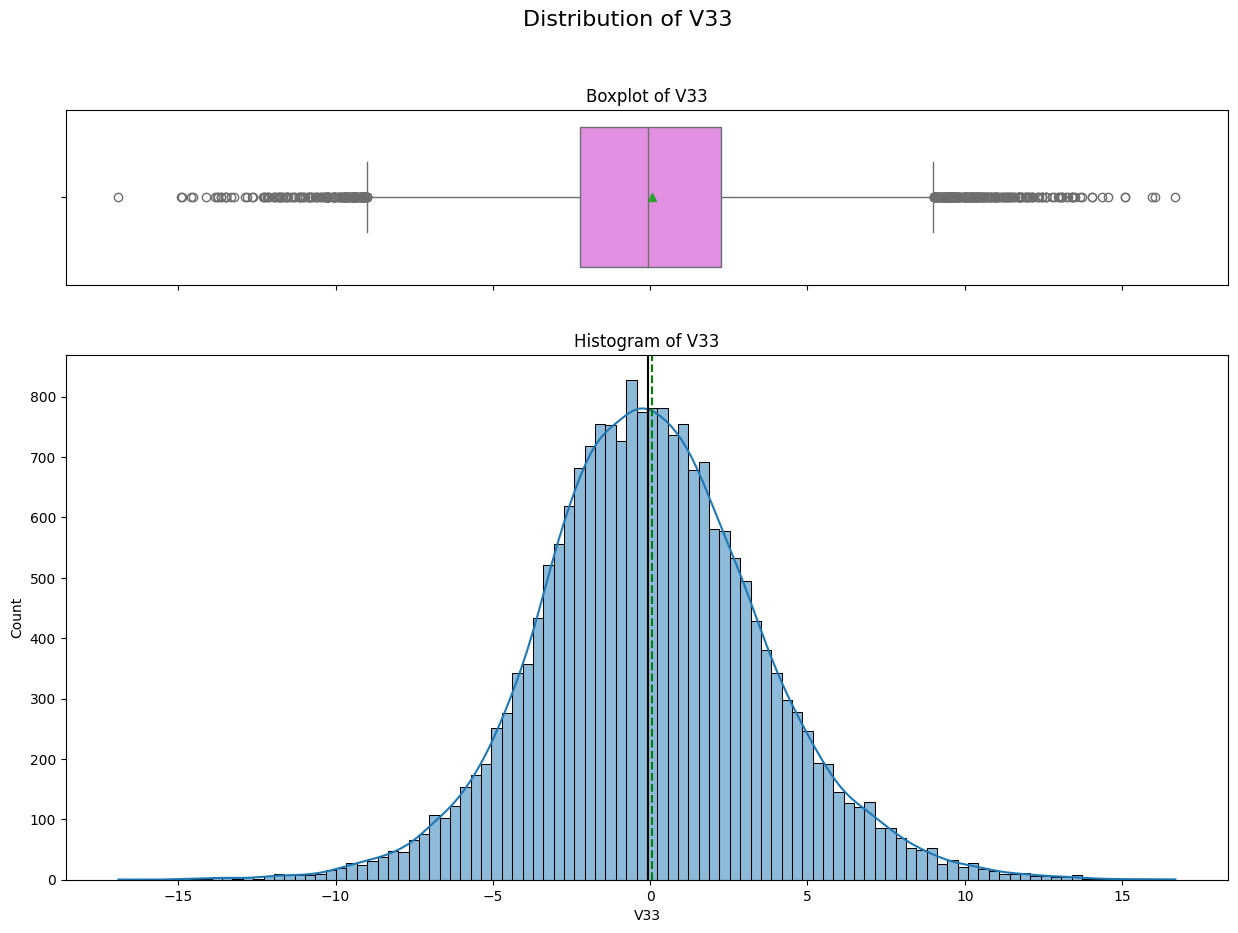

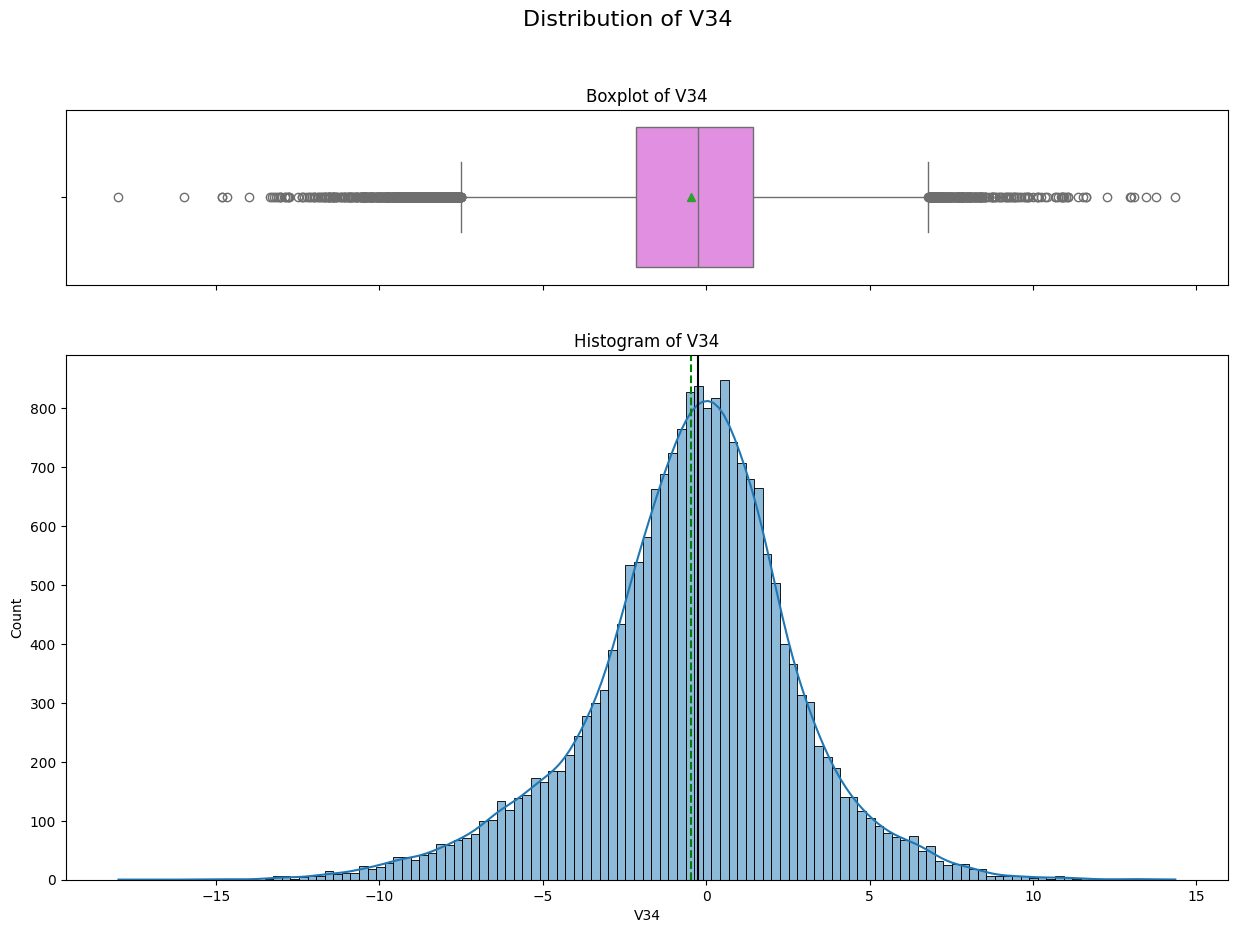

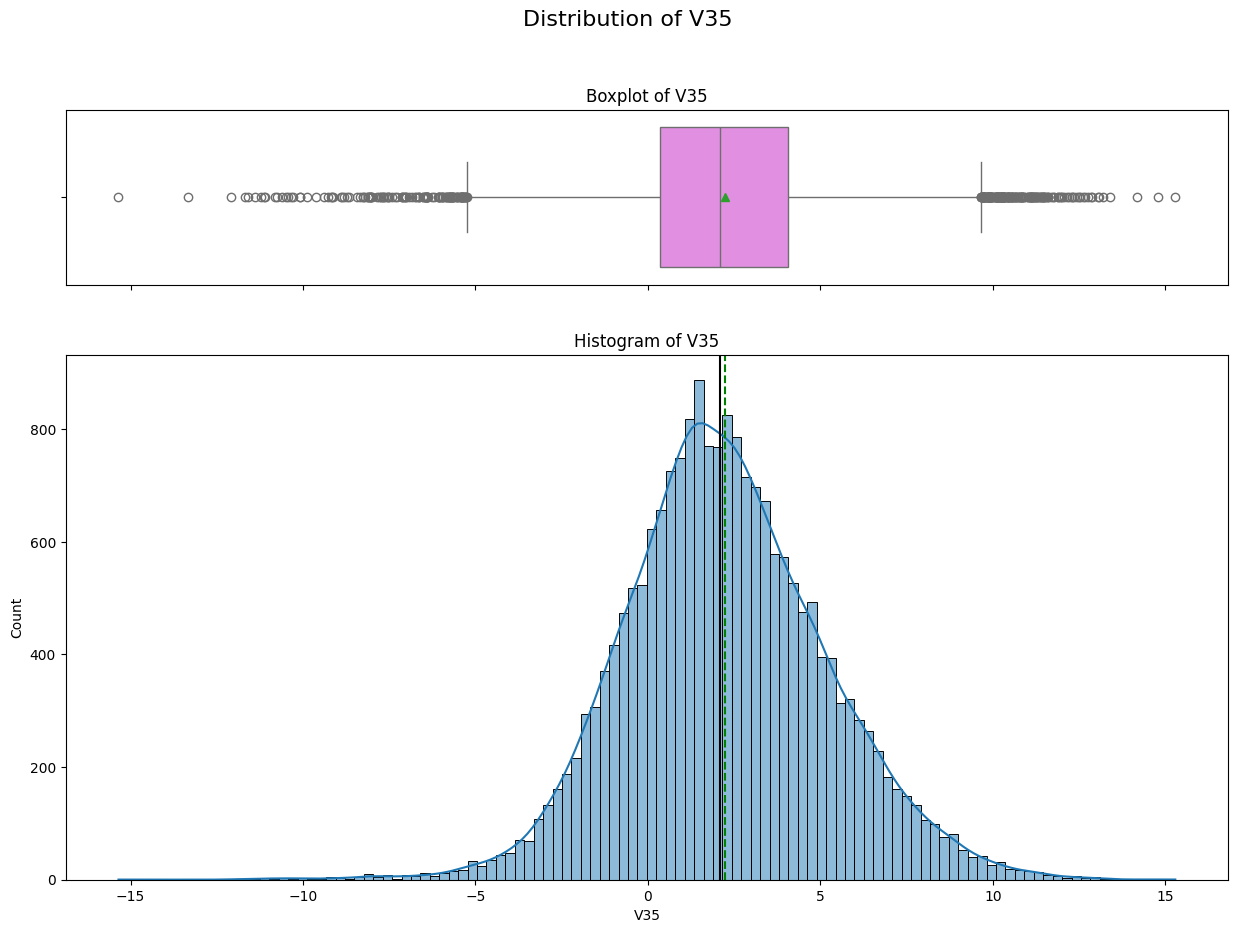

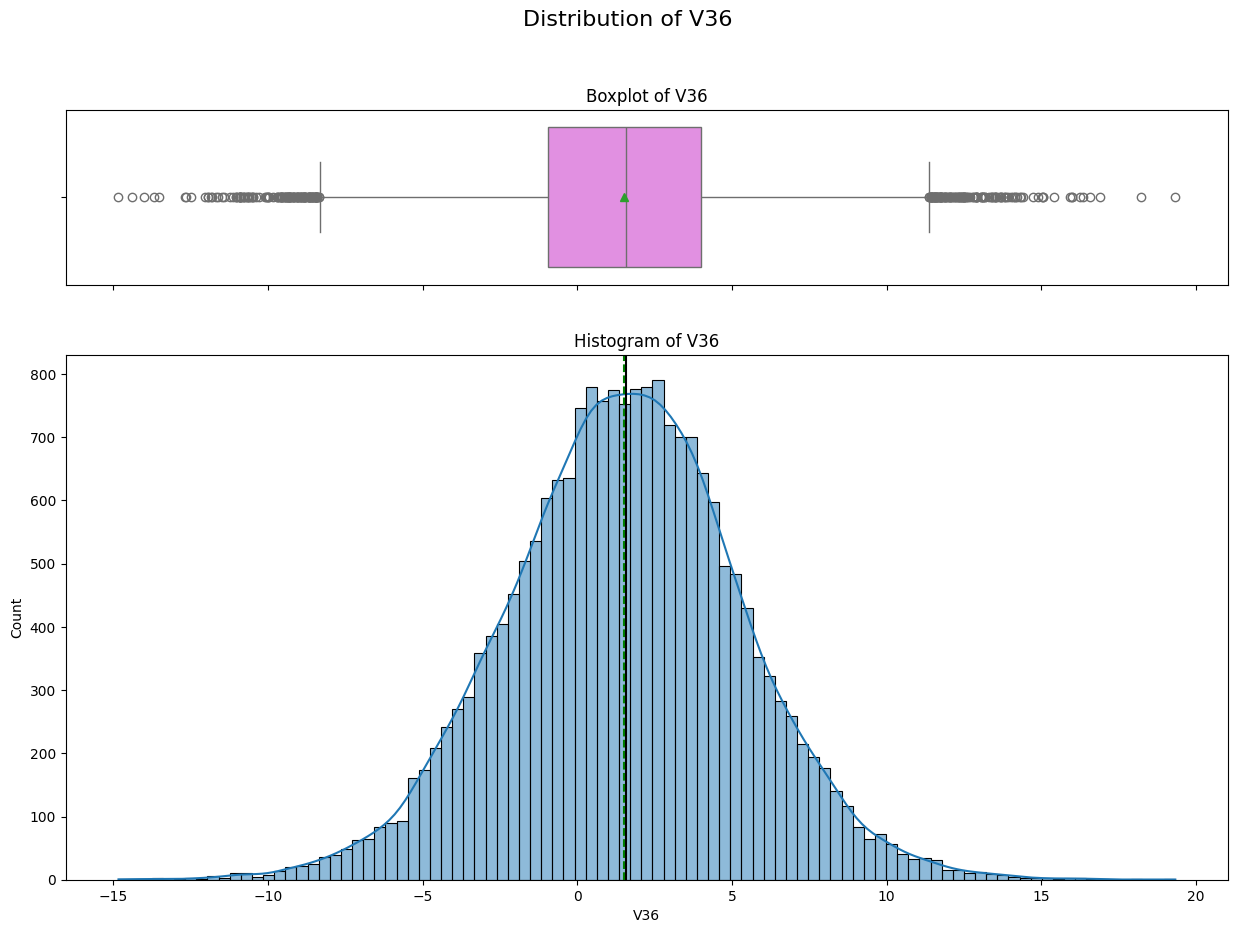

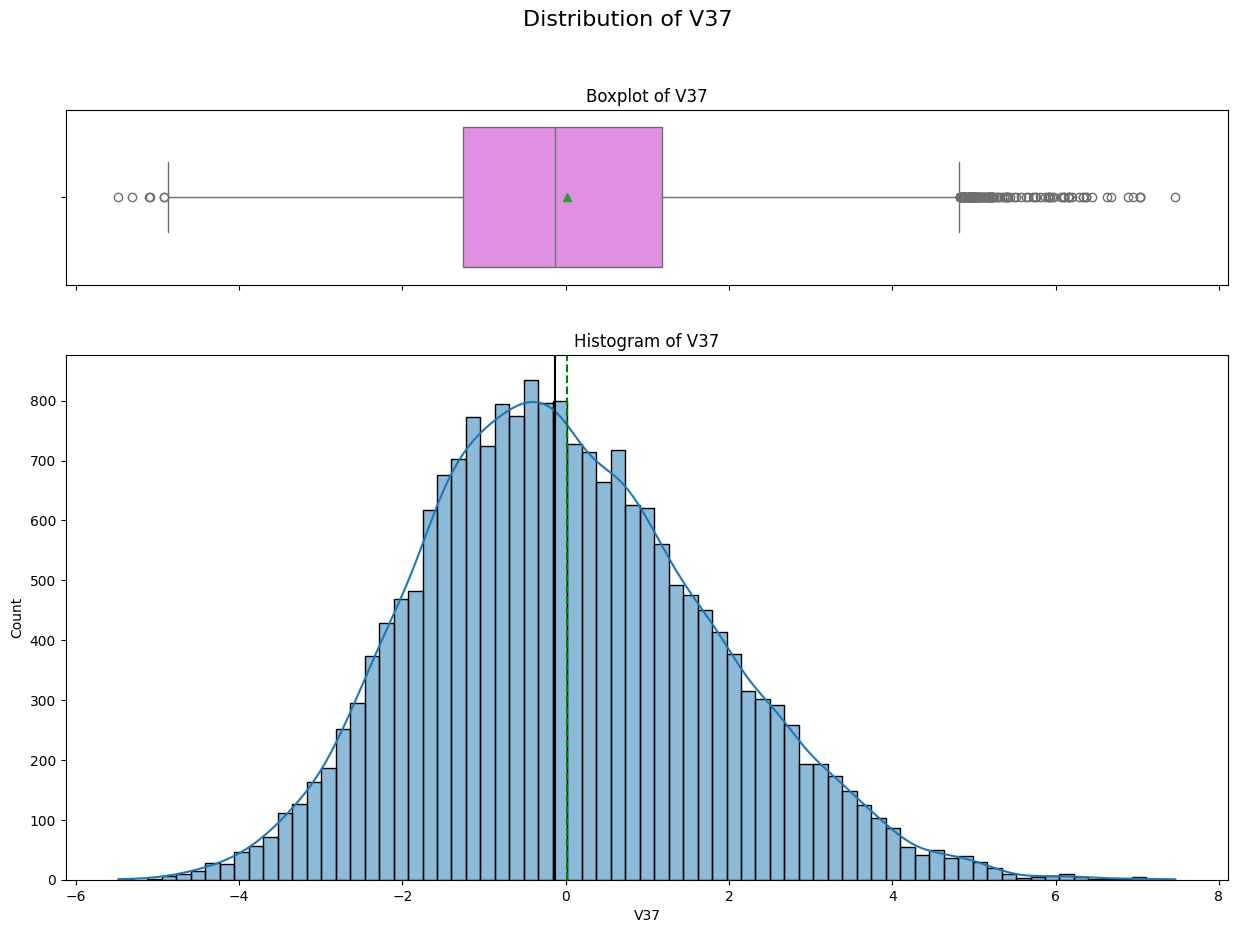

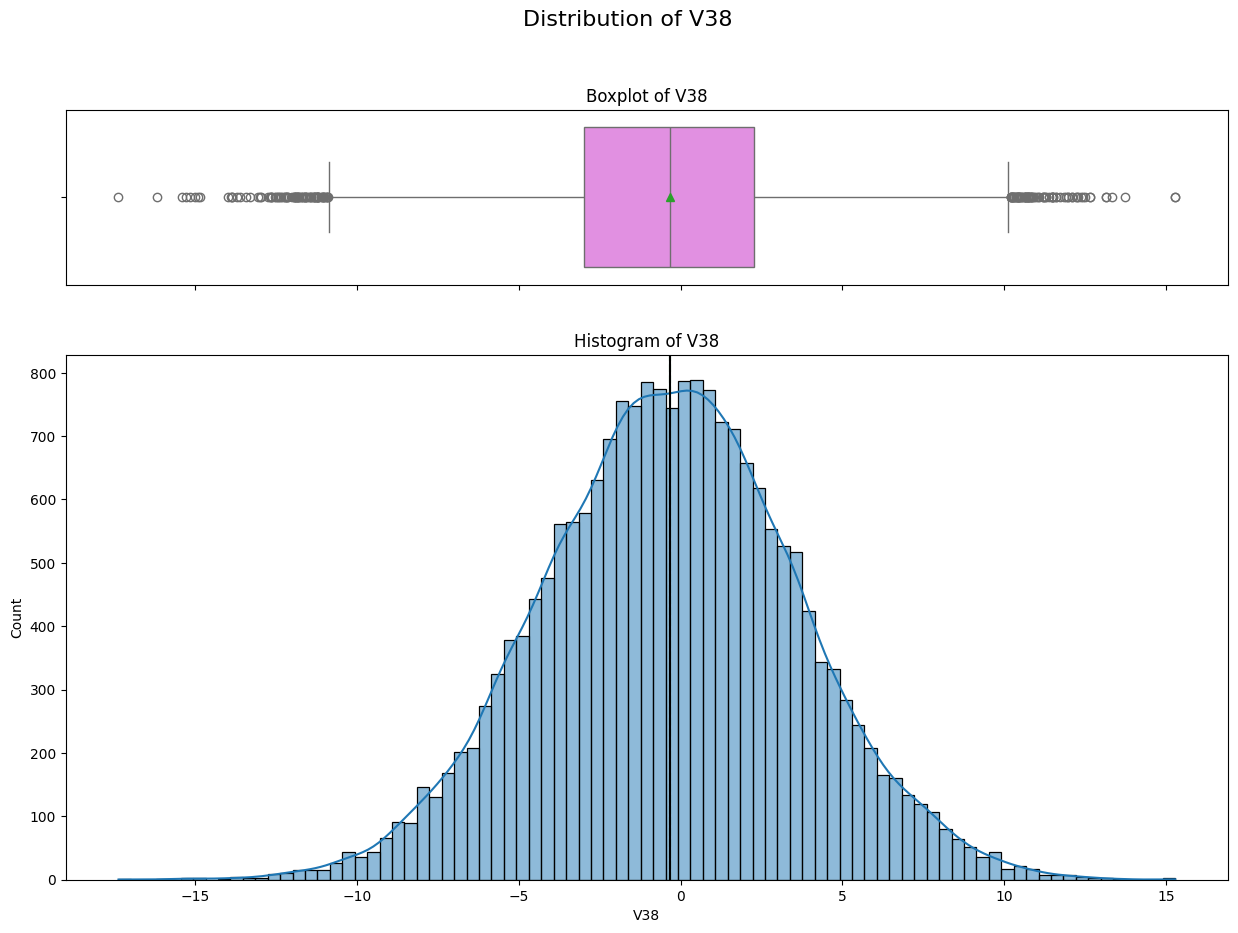

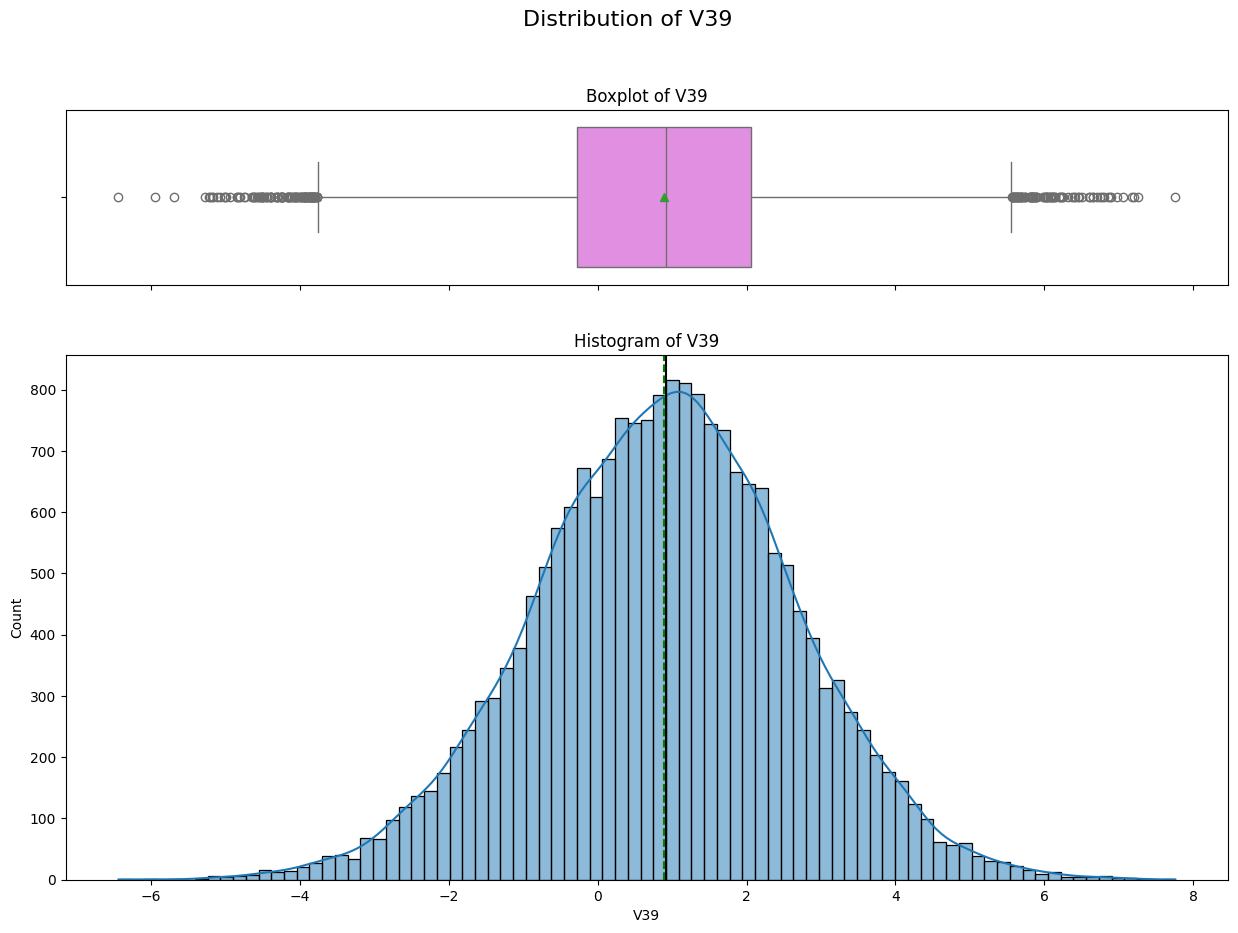

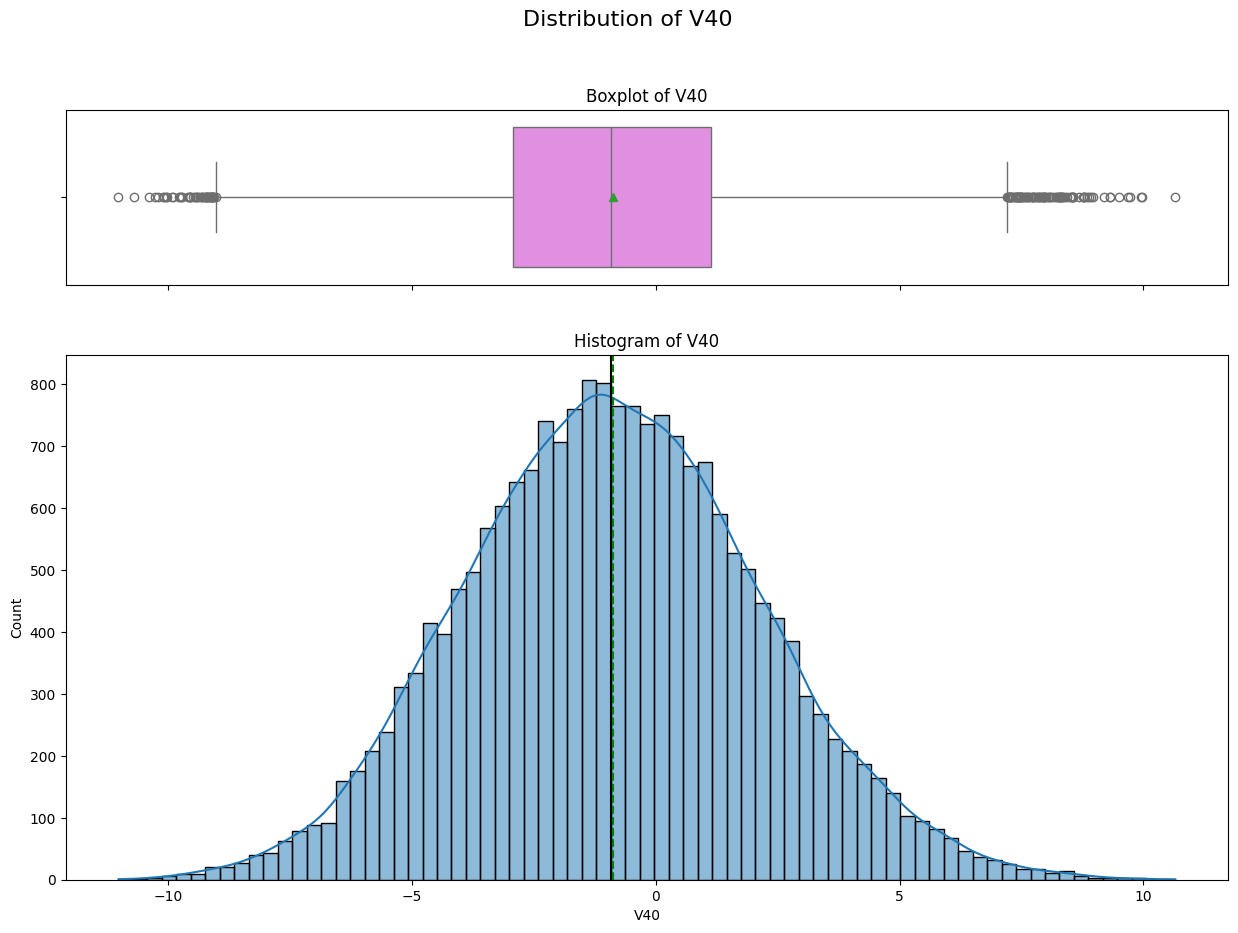

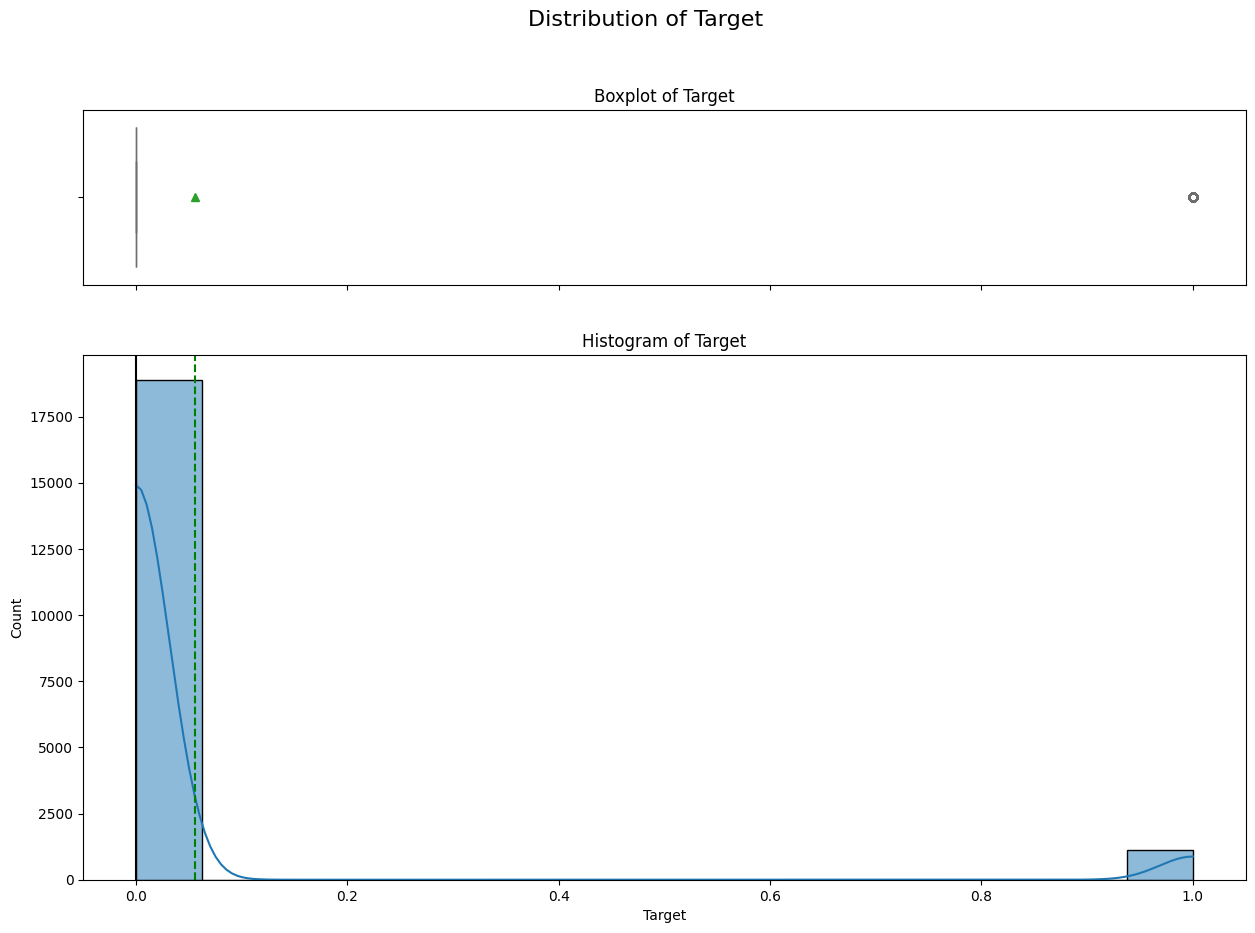

In [26]:
for m in data_train.columns:
    histogram_boxplot(data_train,m,kde=True)



### Observations on the distribution of the features

* Except for the target feature, all of the features have outliers.
* Most of the distribution are symmetrical

## Bivariate Analysis

### Correlation for all the variables with the target variable

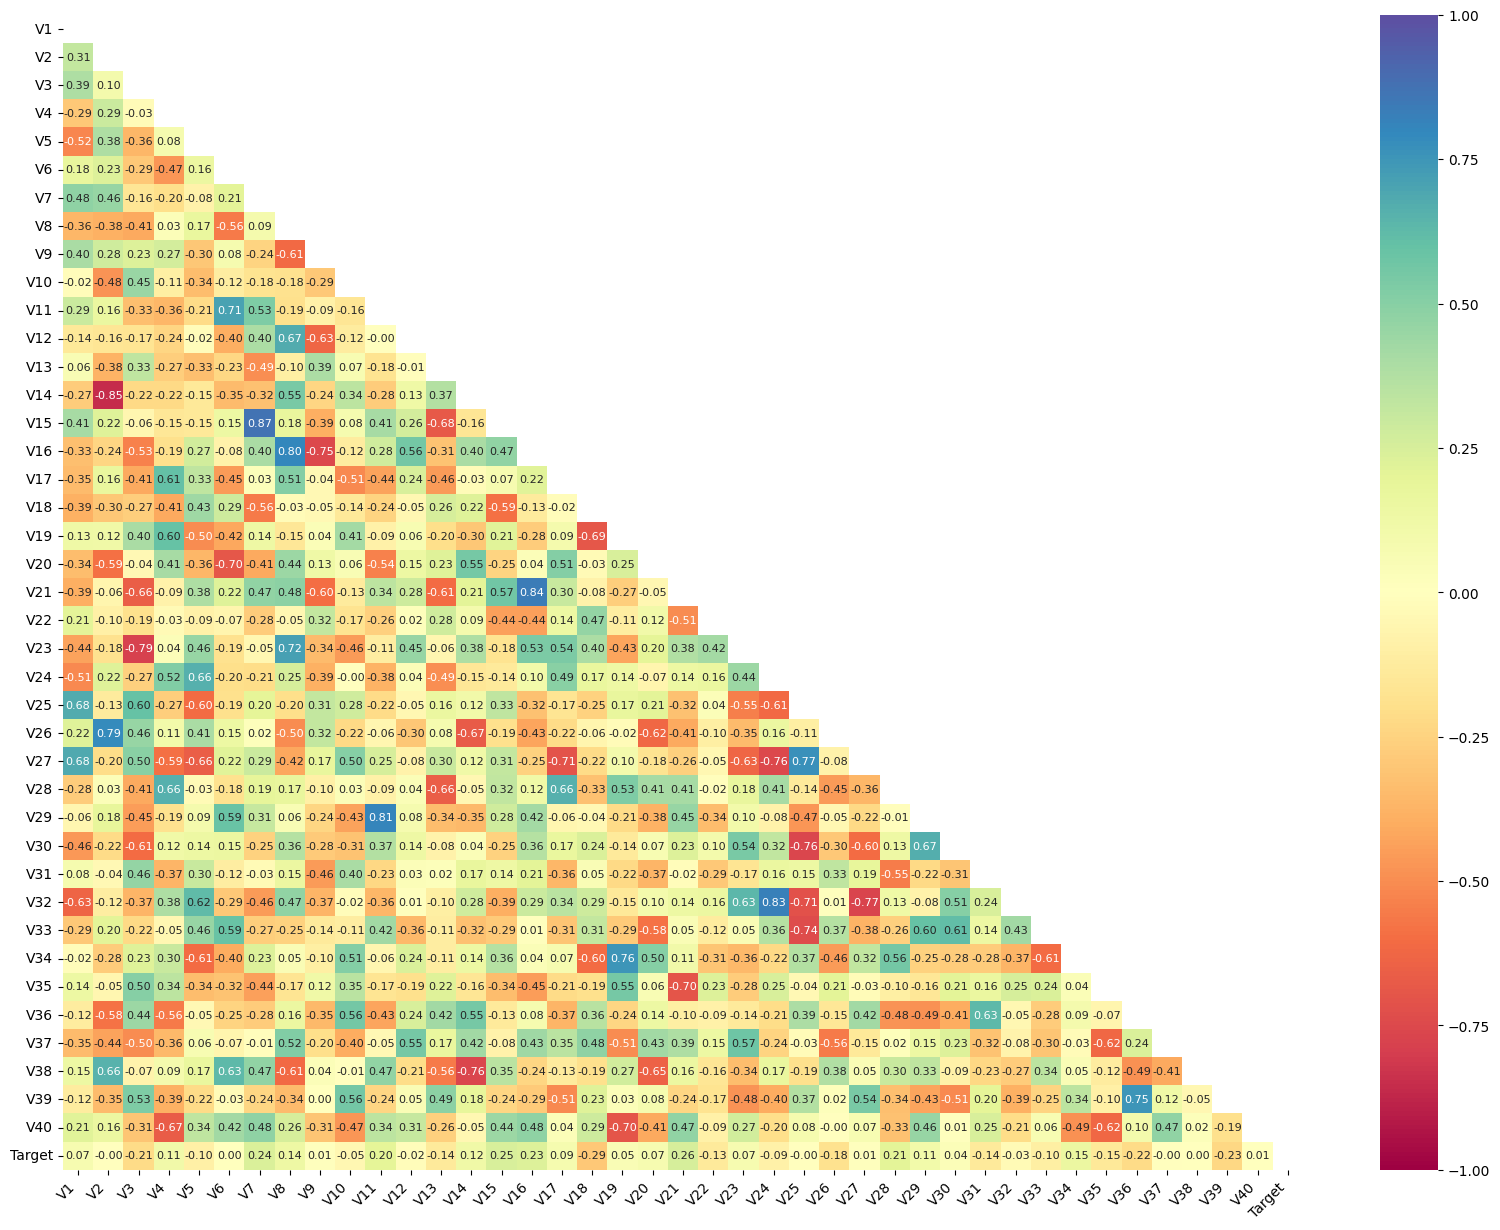

In [27]:
# Get the correlation from the training dataset
corr = data_train.corr()

# Create a mask for the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

#Create the graphic 
plt.figure(figsize=(20, 15))
sns.heatmap(corr, mask=mask, annot=True, cmap="Spectral", vmin=-1, vmax=1, fmt=".2f",annot_kws={"size":8} )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### Correlation greater than |0.7|

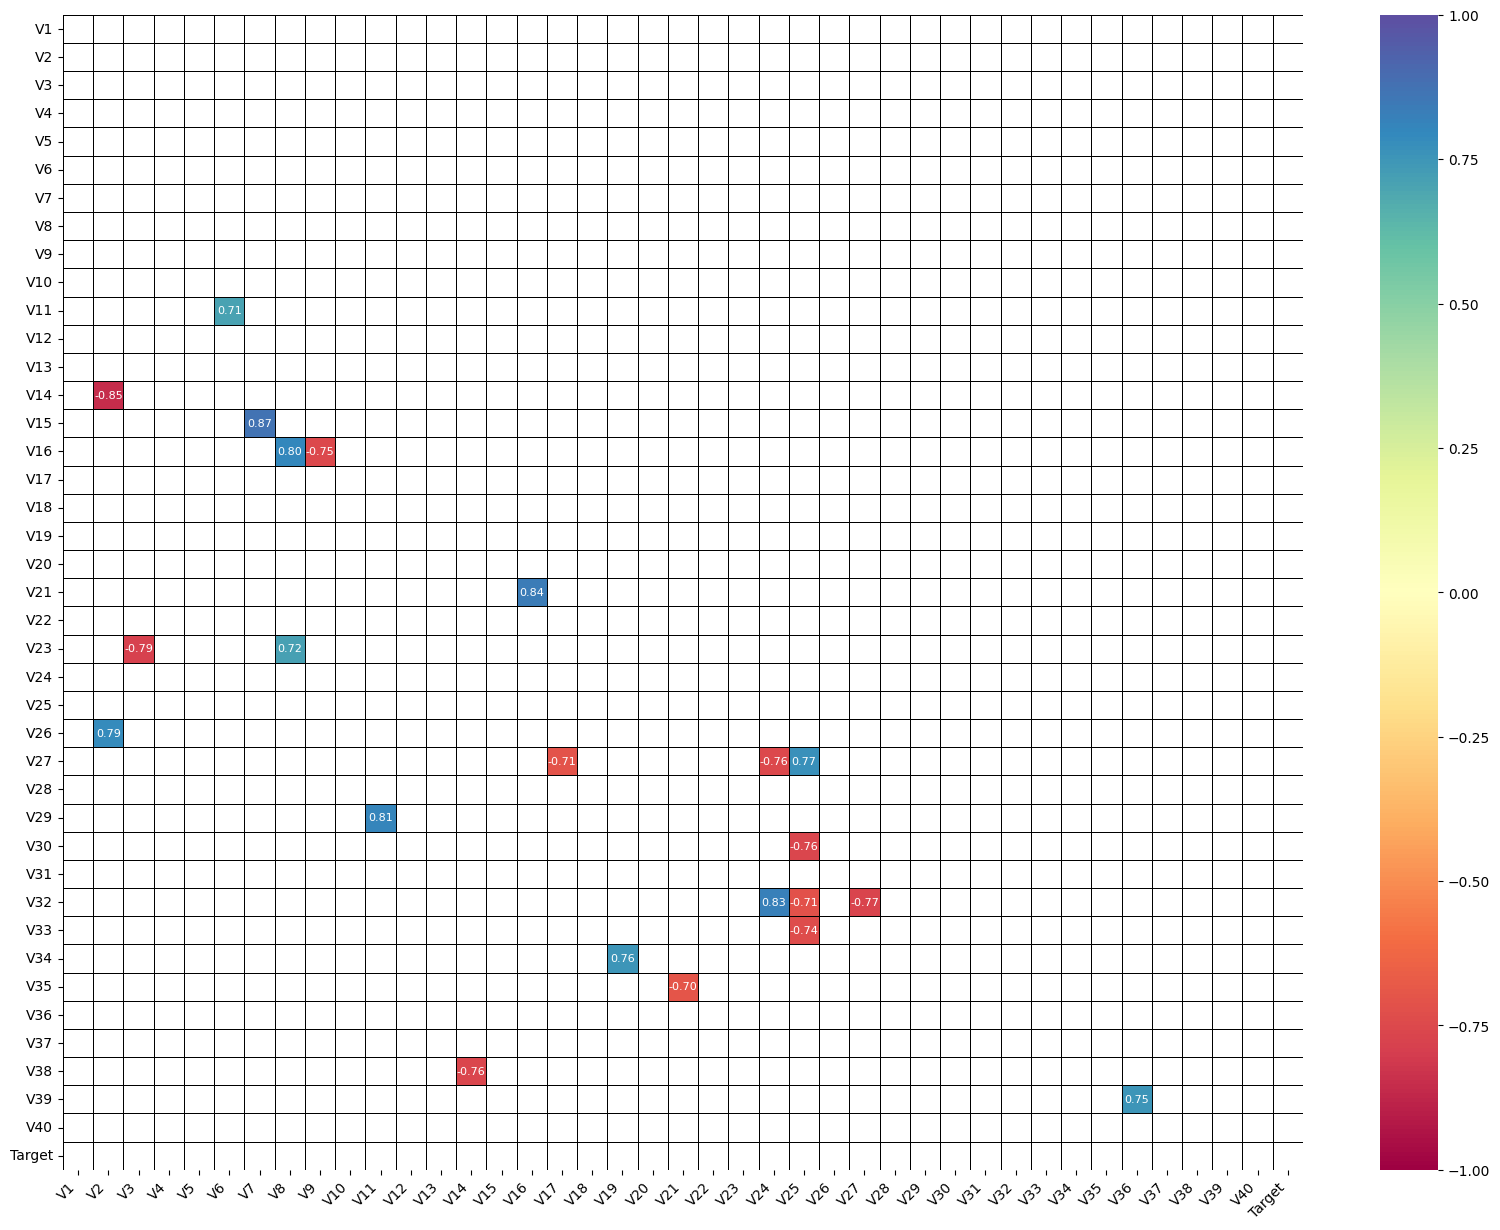

In [28]:
# Get the correlation from the training dataset
corr = data_train.corr()
# specify a range of correlation equal or bigger than 0.7 and equal or smaller than -0.7
strong_corr = corr[(corr >= 0.7) | (corr <= -0.7)]

# Create a mask for the heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

#Create the graphic 
plt.figure(figsize=(20, 15))

#Create the heatmap only showing the strong correlation variables
sns.heatmap(strong_corr,mask=mask, annot=True, cmap="Spectral", vmin=-1, vmax=1, fmt=".2f",annot_kws={"size":8}, linewidths=0.5, linecolor="black" )
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.show()


### Observations on Bivariate analysis

* None of the features has a big correlation to the target value. 
* In the second graphic we can see hight correlation numbers (bigger than |0.7|) between the different features. As an example, V29 is positively correlated to V11 with a correlation of 0.81, V23 is negatively correlated to V3 with a coefficient of -0.79. 

# **Data Preprocessing**

### Let's check again missing values in training and testing data

#### Training Set

In [29]:
# Training Dataset
data_train.isnull().sum()

V1        18
V2        18
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

#### Testing Set

In [30]:
data_test.isnull().sum()

V1        5
V2        6
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

* In the training set we have 18 rows where V1 is null and we have 18 rows where V2 is null.
* In the test set we have 5 rows where V1 is null and we have 6 rows where V2 is null.

### Check if the rows for missing values in V1 and V2 for training are the same

In [31]:
null_v1 = data_train[data_train["V1"].isnull()].index
null_v2 = data_train[data_train["V2"].isnull()].index

print("Rows null in V1 Training:", list(null_v1))
print("Rows null in V2 Training:", list(null_v2))

print("Are they equal?", null_v1.equals(null_v2))


Rows null in V1 Training: [89, 5941, 6317, 6464, 7073, 8431, 8439, 11156, 11287, 11456, 12221, 12447, 13086, 13411, 14202, 15520, 16576, 18104]
Rows null in V2 Training: [613, 2236, 2508, 4653, 6810, 7788, 8483, 8894, 8947, 9362, 9425, 9848, 11637, 12339, 15913, 18342, 18343, 18907]
Are they equal? False


### Check if the rows for missing values in V1 and V2 for testing are the same

In [32]:
null_v1 = data_test[data_test["V1"].isnull()].index
null_v2 = data_test[data_test["V2"].isnull()].index

print("Rows null in V1 Testing:", list(null_v1))
print("Rows null in V2 Testing:", list(null_v2))

print("Are they equal?", null_v1.equals(null_v2))


Rows null in V1 Testing: [859, 1070, 1639, 1832, 4051]
Rows null in V2 Testing: [709, 1777, 1869, 2741, 3266, 4186]
Are they equal? False


* The rows in training and testing with missing values in V1 and V2 are not the same rows. This means while we have for example in training, in row 89 a null value for V1, we don't have a null value for V2 or any other feature. For testing, the same comparison can be done with row 859 for V1 and row 709 for V2
* The above analysis leads me to believe that we can't just drop the rows with missing values and we need to treat the missing values by imputing them. 
* In order to impute the missing value given the data is already transformed, and there are not other features that will allow us to infered the possible values of V1 and V2  I will used the median.
* In order to prevent data leakage I will split now the training data in training and validation sets and after that I will impute V1 and V2 with the corresponding median for each dataset. 

### Create X and Y from the training dataset

In [33]:
# Drop the target column
X=data_train.drop("Target", axis=1)
# create y with the target value
y = data_train["Target"] 

### Create X_test and y_test from the test dataset

In [34]:
# Drop the target column
X_test=data_test.drop("Target", axis=1)
# create y with the target value
y_test = data_test["Target"] 

### Split of training dataset in training and validation

In [35]:
# Splitting the training dataset in the ratio 5:1 for train and validation sets
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=1-(5/6), random_state=42,stratify=y)

### Check the shape of the training and validation sets

In [36]:
x_train.shape

(16666, 40)

In [37]:
y_train.shape

(16666,)

In [38]:
x_val.shape

(3334, 40)

In [39]:
y_val.shape

(3334,)

### Check the class balance in all datasets

In [40]:
print("Target value ratio in y")
print(y.value_counts(1))
print("*" * 80)
print("Target value ratio in y_train")
print(y_train.value_counts(1))
print("*" * 80)
print("Target value ratio in y_val")
print(y_val.value_counts(1))
print("*" * 80)
print("Target value ratio in y_test")
print(y_test.value_counts(1))
print("*" * 80)

Target value ratio in y
Target
0    0.9445
1    0.0555
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_train
Target
0    0.944498
1    0.055502
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_val
Target
0    0.944511
1    0.055489
Name: proportion, dtype: float64
********************************************************************************
Target value ratio in y_test
Target
0    0.9436
1    0.0564
Name: proportion, dtype: float64
********************************************************************************


* As we can see the dataset is very imbalanced with the value of the variable we want to predict (Target=1) with just ~6 % of each dataset.

### Check the missing values in the 3 sets

In [41]:
# Training Dataset
print ("Missing values on training ",x_train.isnull().sum())

Missing values on training  V1     15
V2     16
V3      0
V4      0
V5      0
V6      0
V7      0
V8      0
V9      0
V10     0
V11     0
V12     0
V13     0
V14     0
V15     0
V16     0
V17     0
V18     0
V19     0
V20     0
V21     0
V22     0
V23     0
V24     0
V25     0
V26     0
V27     0
V28     0
V29     0
V30     0
V31     0
V32     0
V33     0
V34     0
V35     0
V36     0
V37     0
V38     0
V39     0
V40     0
dtype: int64


In [43]:
# Validation Dataset
print ("Missing values on validation ",x_val.isnull().sum())

Missing values on validation  V1     3
V2     2
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [44]:
# Testing Dataset
print ("Missing values on testing",X_test.isnull().sum())

Missing values on testing V1     5
V2     6
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


### Impute the training set with the median for V1 and V2

In [45]:
# Define the imputer
imputer = SimpleImputer(strategy="median")
# the columns with missing values
cols_to_impute = ["V1", "V2"]  
# imputing the training set
x_train[cols_to_impute] = imputer.fit_transform(x_train[cols_to_impute])

### Impute the validation set with the median for V1 and V2

In [46]:
# Define the imputer
imputer = SimpleImputer(strategy="median")
# the columns with missing values
cols_to_impute = ["V1", "V2"]  
# imputing the validation set
x_val[cols_to_impute] = imputer.fit_transform(x_val[cols_to_impute])

### Impute the testing set with the median for V1 and V2

In [47]:
# Define the imputer
imputer = SimpleImputer(strategy="median")
# the columns with missing values
cols_to_impute = ["V1", "V2"]  
# imputing the testing set
X_test[cols_to_impute] = imputer.fit_transform(X_test[cols_to_impute])

### Convert target variables in each dataset to NumPy arrays

In [48]:
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()
y_test = y_test.to_numpy()

## Check missing values in training, validation and test set after imputation

In [49]:
# Training Dataset
print ("Missing values on training ",x_train.isnull().sum())


Missing values on training  V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [50]:
# Validation Dataset
print ("Missing values on validation ",x_val.isnull().sum())


Missing values on validation  V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


In [51]:
# Testing Dataset
print ("Missing values on testing",X_test.isnull().sum())

Missing values on testing V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64


* All missing values have been imputed.

# **Model Building**

## Model Evaluation Criterion

The cost to replace is the highest cost that we have. Given False negatives will result in replacement cost, in order to reduce those replacement cost, I will choose as a metric Recall which aims to reduce the False Negatives. This is a binary classification project with the column Target as the target value with 1 meaning failure and 0 meaning not failure.

### Utility functions

In [52]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [53]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
#Implementing the same function that in the MLS Week 2 
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

### Dataframe to store the results from all the models

In [54]:
#Defining the columns of the dataframe which are nothing but the hyper parameters and the metrics.
columns = ["# hidden layers","# neurons - hidden layer","activation function - hidden layer","optimizer","# epochs","batch size","train loss","validation loss","train recall","validation recall","time (secs)"]

#Creating a pandas dataframe.
results = pd.DataFrame(columns=columns)

results

Empty DataFrame
Columns: [# hidden layers, # neurons - hidden layer, activation function - hidden layer, optimizer, # epochs, batch size, train loss, validation loss, train recall, validation recall, time (secs)]
Index: []

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [58]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

## Model 0

### Model definition

In [59]:
model0 = Sequential()
model0.add(Dense(8, activation = 'relu', input_dim = x_train.shape[1]))
model0.add(Dense(1, activation='sigmoid'))

In [60]:
model0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
batch_size =  x_train.shape[0]
epochs = 50
model0.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["recall"])

In [62]:
start = time.time()
history = model0.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 883ms/step - loss: 0.8838 - recall: 0.5903 - val_loss: 0.7746 - val_recall: 0.5351
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.7898 - recall: 0.5827 - val_loss: 0.7073 - val_recall: 0.5243
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.7179 - recall: 0.5708 - val_loss: 0.6541 - val_recall: 0.5243
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.6610 - recall: 0.5643 - val_loss: 0.6109 - val_recall: 0.5189
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.6150 - recall: 0.5622 - val_loss: 0.5747 - val_recall: 0.5135
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.5766 - recall: 0.5600 - val_loss: 0.5438 - val_recall: 0.5081
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.5439 - recall: 0.5535 - val_loss: 0.5170 - val_recall: 0.5027
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.5157 - recall: 0.5492 - val_loss: 0.4935 - val_recall: 0.5027
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━

### Time taken in seconds

In [63]:
print("Time taken in seconds ",end-start)

Time taken in seconds  4.811766147613525


### Model Loss

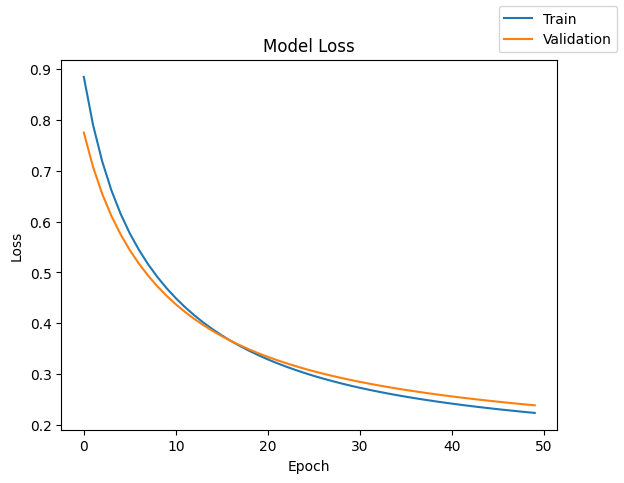

In [64]:
plot(history,'loss')

### Model recall

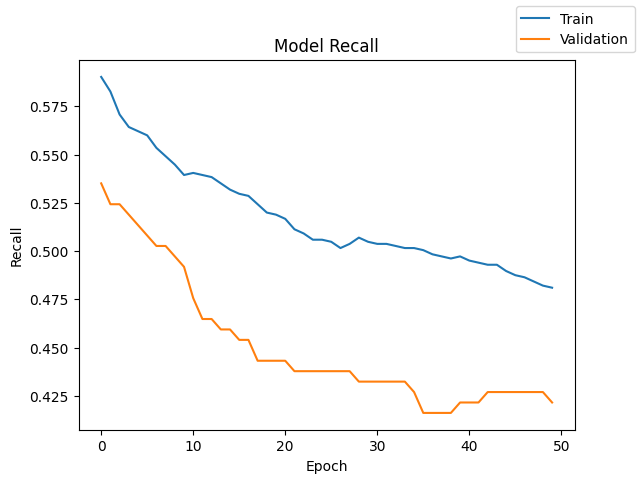

In [65]:
plot(history,'recall')

### Model performance on the training set

In [69]:
model0_training = model_performance_classification(model0, x_train, y_train)
model0_training

521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step


Accuracy    Recall  Precision  F1 Score
0  0.931657  0.931657   0.937737  0.934476

### Model performance on the validation set

In [70]:
model0_validation = model_performance_classification(model0, x_val, y_val)
model0_validation

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


Accuracy    Recall  Precision  F1 Score
0  0.928614  0.928614    0.93288  0.930652

### Results

In [68]:
results.loc[0] = [1,8,'relu','sgd',50,16666,history.history["loss"][-1],history.history["val_loss"][-1],history.history["recall"][-1],history.history["val_recall"][-1],round(end-start,2)]

results

# hidden layers  # neurons - hidden layer  \
0                1                         8   

  activation function - hidden layer optimizer  # epochs  batch size  \
0                               relu       sgd        50       16666   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.224355         0.239296      0.481081           0.421622         4.81

### Observations on Model 0

* Checking the model performance the recall is ~93% for training and ~92% for validation. The percentages are close enough which mean the model is generalizing well.

# **Model Performance Improvement**

## Model 1

### Model definition

* Add one more layer with activation function tanh and 16 neurons. Same batch size and epochs.

In [73]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [74]:
model1 = Sequential()
model1.add(Dense(8, activation = 'relu', input_dim = 40))
model1.add(Dense(16, activation = 'tanh'))
model1.add(Dense(1, activation='sigmoid'))

In [75]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │           328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 489 (1.91 KB)

 Trainable params: 489 (1.91 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
batch_size = 200
epochs = 50
model1.compile(loss="binary_crossentropy", optimizer="sgd", metrics=["recall"])

In [77]:
start = time.time()
history1 = model1.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3057 - recall: 0.0400 - val_loss: 0.2188 - val_recall: 0.0108
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1985 - recall: 0.0032 - val_loss: 0.1899 - val_recall: 0.0108
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1787 - recall: 0.0011 - val_loss: 0.1758 - val_recall: 0.0108
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1672 - recall: 0.0011 - val_loss: 0.1650 - val_recall: 0.0054
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1579 - recall: 0.0011 - val_loss: 0.1553 - val_recall: 0.0108
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1500 - recall: 0.0076 - val_loss: 0.1470 - val_recall: 0.0108
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1431 - recall: 0.0195 - val_loss: 0.1399 - val_recall: 0.0324
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1372 - recall: 0.0411 - val_loss: 0.1338 - val_recall: 0.0649
Epoch 9/50
84/84 ━━━━━━━

### Time taken in seconds

In [78]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.07835602760315


### Model loss

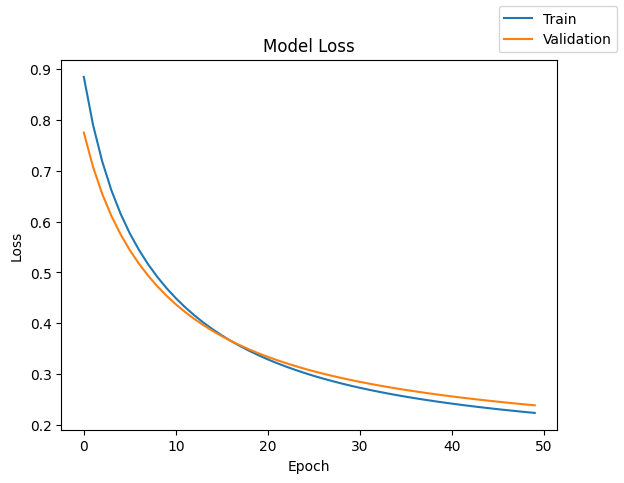

In [79]:
plot(history,'loss')

### Model recall

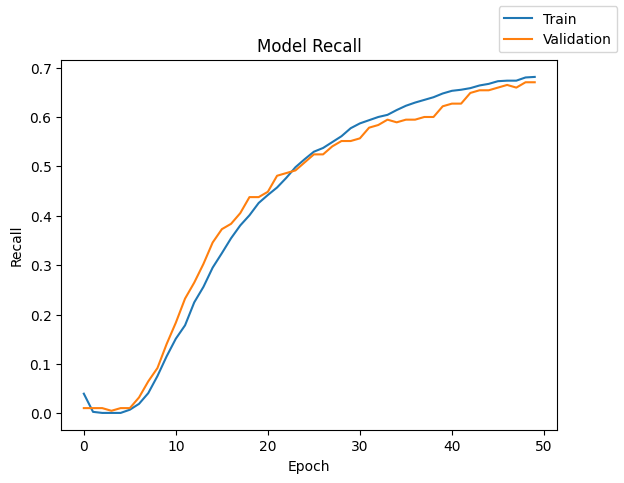

In [80]:
plot(history1,'recall')

### Model performance on the training set

In [81]:
model1_training = model_performance_classification(model1, x_train, y_train)
model1_training

521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step


Accuracy    Recall  Precision  F1 Score
0  0.978219  0.978219   0.977119  0.976832

### Model performance on the validation set

In [82]:
model1_validation = model_performance_classification(model1, x_val, y_val)
model1_validation

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 696us/step


Accuracy    Recall  Precision  F1 Score
0  0.979004  0.979004   0.978246  0.977374

### Results

In [83]:
results.loc[1] = [2,'8-16','relu','sgd',50,200,history1.history["loss"][-1],history1.history["val_loss"][-1],history1.history["recall"][-1],history1.history["val_recall"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                1                        8   
1                2                     8-16   

  activation function - hidden layer optimizer  # epochs  batch size  \
0                               relu       sgd        50       16666   
1                               relu       sgd        50         200   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.224355         0.239296      0.481081           0.421622         4.81  
1    0.083810         0.079311      0.681081           0.670270        10.08

### Observations on Model 1

* The recall score for this model is 5% better than Model 0. The recall score for training and validation is ~97%. The model is generalizing well and the addition of the hidden layer has improve the recall. The time fore training has increased to ~10 seconds.

## Model 2

### Model definition

* Let's increase the amount of neurons in the two previous layers and try adam as optimizer.

In [86]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [87]:
model2 = Sequential()
model2.add(Dense(16, activation = 'relu', input_dim = 40))
model2.add(Dense(32, activation = 'tanh'))
model2.add(Dense(1, activation='sigmoid'))

In [88]:
model2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [90]:
batch_size = 200
epochs = 50
model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["recall"])

In [91]:
start = time.time()
history2 = model2.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2318 - recall: 0.1362 - val_loss: 0.1435 - val_recall: 0.2000
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1257 - recall: 0.3762 - val_loss: 0.1066 - val_recall: 0.4703
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0979 - recall: 0.5286 - val_loss: 0.0842 - val_recall: 0.5730
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0806 - recall: 0.6054 - val_loss: 0.0711 - val_recall: 0.6378
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0696 - recall: 0.7070 - val_loss: 0.0636 - val_recall: 0.7351
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0622 - recall: 0.7524 - val_loss: 0.0581 - val_recall: 0.7892
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0564 - recall: 0.7903 - val_loss: 0.0542 - val_recall: 0.8270
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0523 - recall: 0.8151 - val_loss: 0.0512 - val_recall: 0.8432
Epoch 9/50
84/84 ━━━━━━━

### Time taken in seconds

In [92]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.262094497680664


### Model loss

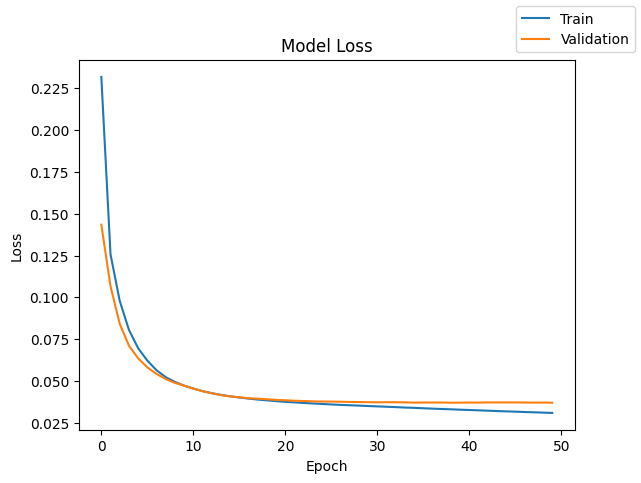

In [93]:
plot(history2,'loss')

### Model recall

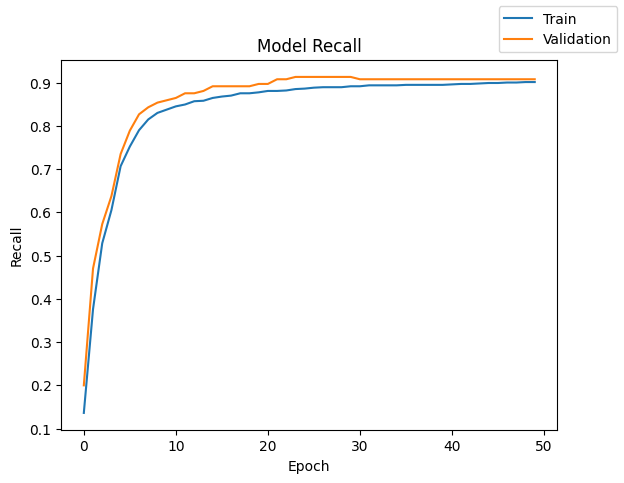

In [94]:
plot(history2,'recall')

### Model performance on the training set

In [95]:
model2_training = model_performance_classification(model2, x_train, y_train)
model2_training

521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step


Accuracy   Recall  Precision  F1 Score
0   0.99412  0.99412   0.994096  0.993994

### Model performance on the validation set

In [96]:
model2_validation = model_performance_classification(model2, x_val, y_val)
model2_validation

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step


Accuracy    Recall  Precision  F1 Score
0  0.993401  0.993401   0.993317  0.993297

### Results

In [97]:
results.loc[2] = [2,'16-32','relu-tanh','adam',50,200,history2.history["loss"][-1],history2.history["val_loss"][-1],history2.history["recall"][-1],history2.history["val_recall"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                1                        8   
1                2                     8-16   
2                2                    16-32   

  activation function - hidden layer optimizer  # epochs  batch size  \
0                               relu       sgd        50       16666   
1                               relu       sgd        50         200   
2                          relu-tanh      adam        50         200   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.224355         0.239296      0.481081           0.421622         4.81  
1    0.083810         0.079311      0.681081           0.670270        10.08  
2    0.030917         0.036995      0.901622           0.908108        10.26

### Observations on Model 2

* The recall score is 2% higher than the previous model with a recall score for the training is ~99.4% and validation dataset of ~99.3%. The processing time is still around ~10 seconds. 

## Model 3

### Model definition

* Given the dataset is very imbalanced we will add class_weight to Model 2. Same hidden layers, neurons by layer, batch size, epochs and optimizer.

In [101]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

Calculate the class weights for the training dataset

In [102]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.0587637380090211, 1: 18.017297297297297}

In [103]:
model3 = Sequential()
model3.add(Dense(16, activation = 'relu', input_dim = 40))
model3.add(Dense(32, activation = 'tanh'))
model3.add(Dense(1, activation='sigmoid'))

In [104]:
model3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [105]:
batch_size = 200
epochs = 50
model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["recall"])

In [106]:
start = time.time()
history3 = model3.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end = time.time()

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.9947 - recall: 0.7492 - val_loss: 0.3740 - val_recall: 0.8000
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6926 - recall: 0.8476 - val_loss: 0.2792 - val_recall: 0.8541
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5960 - recall: 0.8638 - val_loss: 0.2374 - val_recall: 0.8703
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5425 - recall: 0.8735 - val_loss: 0.2085 - val_recall: 0.8919
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5019 - recall: 0.8822 - val_loss: 0.1847 - val_recall: 0.9027
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4673 - recall: 0.8919 - val_loss: 0.1679 - val_recall: 0.9027
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4388 - recall: 0.8962 - val_loss: 0.1565 - val_recall: 0.9081
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4154 - recall: 0.8962 - val_loss: 0.1470 - val_recall: 0.9081
Epoch 9/50
84/84 ━━━━━━━

### Time taken in seconds

In [107]:
print("Time taken in seconds ",end-start)

Time taken in seconds  10.769214630126953


### Model loss

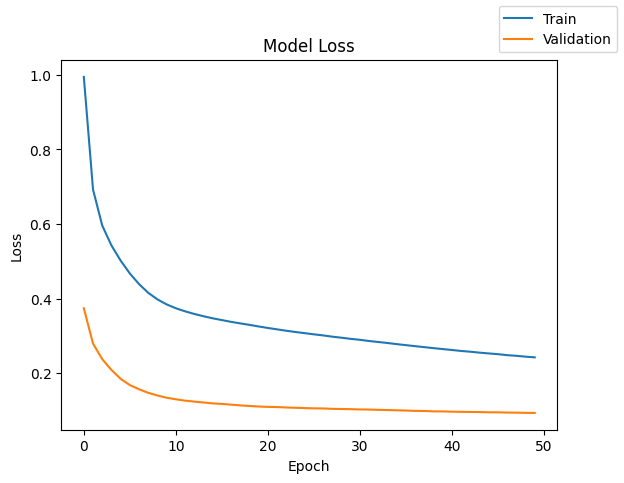

In [108]:
plot(history3,'loss')

### Model recall

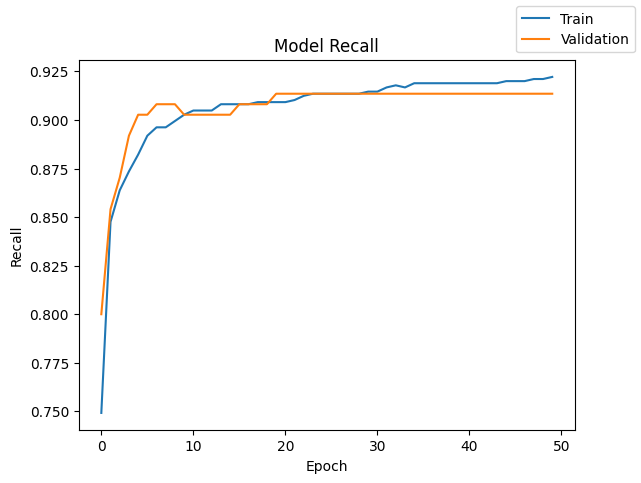

In [109]:
plot(history3,'recall')

### Model performance on the training set

In [110]:
model3_training = model_performance_classification(model3, x_train, y_train)
model3_training

521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step


Accuracy    Recall  Precision  F1 Score
0  0.987279  0.987279   0.987856  0.987497

### Model performance on the validation set

In [111]:
model3_validation = model_performance_classification(model3, x_val, y_val)
model3_validation

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step


Accuracy    Recall  Precision  F1 Score
0  0.985603  0.985603   0.986342  0.985883

### Results

In [112]:
results.loc[3] = [2,'16-32','relu-tanh','adam',50,200,history3.history["loss"][-1],history3.history["val_loss"][-1],history3.history["recall"][-1],history3.history["val_recall"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                1                        8   
1                2                     8-16   
2                2                    16-32   
3                2                    16-32   

  activation function - hidden layer optimizer  # epochs  batch size  \
0                               relu       sgd        50       16666   
1                               relu       sgd        50         200   
2                          relu-tanh      adam        50         200   
3                          relu-tanh      adam        50         200   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.224355         0.239296      0.481081           0.421622         4.81  
1    0.083810         0.079311      0.681081           0.670270        10.08  
2    0.030917         0.036995      0.901622           0.908108        10.26  
3    0.242244         0.093111      0.922162           0.913514        10.77

### Observations on Model 3

* The recall score is actually lower than the recall score of Model 2, with ~98.7% for the training set and ~98.5% for the validation set. Adding class_weight has not improve the recall score. The processing time has increase to almost 11 seconds. 

## Model 4

### Model definition

* Add BatchNormalizaiton to both hidden layers and remove the class weight.

In [115]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [116]:
model4 = Sequential()
model4.add(Dense(16, activation = 'relu', input_dim = 40))
model4.add(BatchNormalization())
model4.add(Dense(32, activation = 'tanh'))
model4.add(BatchNormalization())
model4.add(Dense(1, activation='sigmoid'))

In [117]:
model4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,329 (5.19 KB)

 Non-trainable params: 96 (384.00 B)

In [118]:
batch_size = 200
epochs = 50
model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["recall"])

In [119]:
start = time.time()
history4 = model4.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5917 - recall: 0.7081 - val_loss: 0.3913 - val_recall: 0.6216
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3201 - recall: 0.7081 - val_loss: 0.1940 - val_recall: 0.5351
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1743 - recall: 0.7016 - val_loss: 0.1183 - val_recall: 0.5405
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1116 - recall: 0.7146 - val_loss: 0.0873 - val_recall: 0.6000
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0849 - recall: 0.7330 - val_loss: 0.0712 - val_recall: 0.6486
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0719 - recall: 0.7503 - val_loss: 0.0616 - val_recall: 0.6973
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0643 - recall: 0.7686 - val_loss: 0.0554 - val_recall: 0.7459
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0591 - recall: 0.7859 - val_loss: 0.0513 - val_recall: 0.7892
Epoch 9/50
84/84 ━━━━━━━

### Time taken in seconds

In [120]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.176783561706543


### Model loss

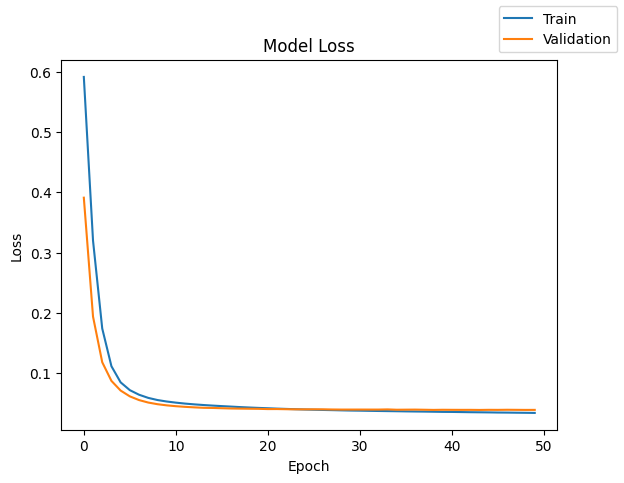

In [121]:
plot(history4,'loss')

### Model recall

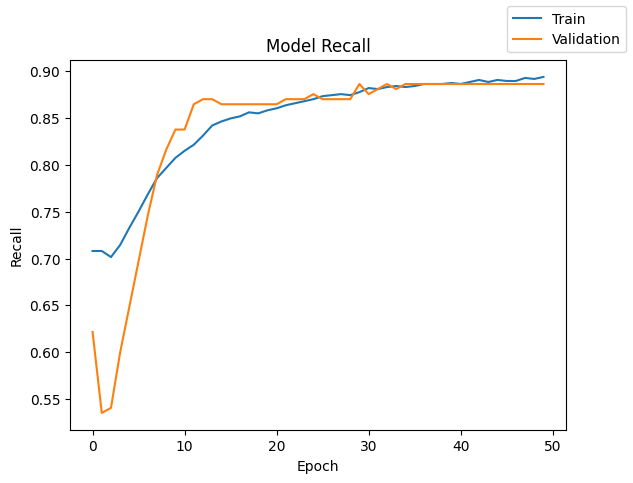

In [122]:
plot(history4,'recall')

### Model performance on the training set

In [123]:
model4_training = model_performance_classification(model4, x_train, y_train)
model4_training

521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 741us/step


Accuracy   Recall  Precision  F1 Score
0   0.99274  0.99274   0.992716  0.992538

### Model performance on the validation set

In [125]:
model4_validation = model_performance_classification(model4, x_val, y_val)
model4_validation

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 709us/step


Accuracy    Recall  Precision  F1 Score
0  0.992501  0.992501   0.992414  0.992331

### Results

In [126]:
results.loc[4] = [2,'16-32','relu-tanh','adam',50,200,history4.history["loss"][-1],history4.history["val_loss"][-1],history4.history["recall"][-1],history4.history["val_recall"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                1                        8   
1                2                     8-16   
2                2                    16-32   
3                2                    16-32   
4                2                    16-32   

  activation function - hidden layer optimizer  # epochs  batch size  \
0                               relu       sgd        50       16666   
1                               relu       sgd        50         200   
2                          relu-tanh      adam        50         200   
3                          relu-tanh      adam        50         200   
4                          relu-tanh      adam        50         200   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.224355         0.239296      0.481081           0.421622         4.81  
1    0.083810         0.079311      0.681081           0.670270        10.08  
2    0.030917         0.036995      0.901622           0.908108        10.26  
3    0.242244         0.093111      0.922162           0.913514        10.77  
4    0.034127         0.039168      0.894054           0.886486        12.18

### Observations on Model 4

* The recall score come back to ~99.2 % for training and validation set. The processing time has increase by ~2 seconds. For Model 5 we will take Model 2 which has the highest recall score (~99.3% for validation) and add BatchNormaliztion and dropout to see if that will increase the recall score.

## Model 5

### Model definition

* Take Model 2 given it has the highest recall score and add BatchNormalization and Dropout. Same batch size, epochs and adam optimizer

In [143]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [144]:
model5 = Sequential()
model5.add(Dense(16, activation = 'relu', input_dim = 40))
model5.add(BatchNormalization())
model5.add(Dropout(0.4))
model5.add(Dense(32, activation = 'tanh'))
model5.add(BatchNormalization())
model5.add(Dropout(0.2))
model5.add(Dense(1, activation='sigmoid'))

In [145]:
model5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,425 (5.57 KB)

 Trainable params: 1,329 (5.19 KB)

 Non-trainable params: 96 (384.00 B)

In [146]:
batch_size = 200
epochs = 50
model5.compile(loss="binary_crossentropy", optimizer="adam", metrics=["recall"])

In [147]:
start = time.time()
history5 = model5.fit(x_train, y_train, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.6571 - recall: 0.5178 - val_loss: 0.4110 - val_recall: 0.2486
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4184 - recall: 0.3762 - val_loss: 0.2648 - val_recall: 0.2324
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2739 - recall: 0.3503 - val_loss: 0.1586 - val_recall: 0.3189
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1962 - recall: 0.3892 - val_loss: 0.1209 - val_recall: 0.4216
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1560 - recall: 0.4270 - val_loss: 0.1012 - val_recall: 0.4973
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1367 - recall: 0.4886 - val_loss: 0.0897 - val_recall: 0.5243
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1254 - recall: 0.4984 - val_loss: 0.0803 - val_recall: 0.5514
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1181 - recall: 0.5319 - val_loss: 0.0732 - val_recall: 0.6162
Epoch 9/50
84/84 ━━━━━━━

### Time taken in seconds

In [148]:
print("Time taken in seconds ",end-start)

Time taken in seconds  12.868472814559937


### Model loss

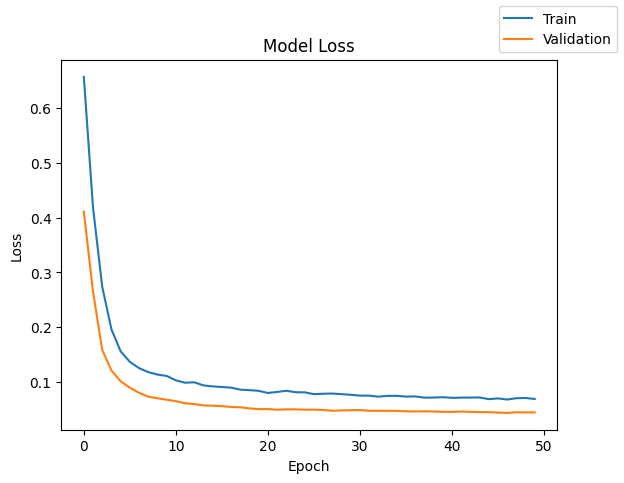

In [149]:
plot(history5,'loss')

### Model recall

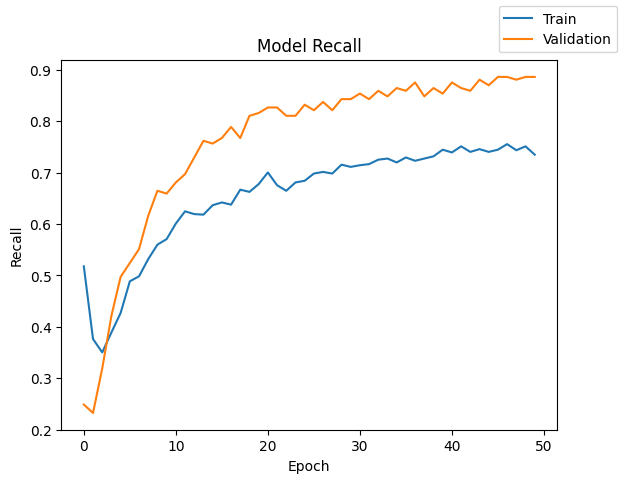

In [150]:
plot(history5,'recall')

### Model performance on the training set

In [151]:
model5_training = model_performance_classification(model5, x_train, y_train)
model5_training

521/521 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step


Accuracy  Recall  Precision  F1 Score
0    0.9901  0.9901   0.990041  0.989719

### Model performance on the validation set

In [152]:
model5_validation = model_performance_classification(model5, x_val, y_val)
model5_validation

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step


Accuracy    Recall  Precision  F1 Score
0  0.993101  0.993101    0.99307  0.992925

### Results

In [154]:
results.loc[5] = [2,'16-32','relu-tanh','adam',50,200,history5.history["loss"][-1],history5.history["val_loss"][-1],history5.history["recall"][-1],history5.history["val_recall"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                1                        8   
1                2                     8-16   
2                2                    16-32   
3                2                    16-32   
4                2                    16-32   
5                2                    16-32   

  activation function - hidden layer optimizer  # epochs  batch size  \
0                               relu       sgd        50       16666   
1                               relu       sgd        50         200   
2                          relu-tanh      adam        50         200   
3                          relu-tanh      adam        50         200   
4                          relu-tanh      adam        50         200   
5                          relu-tanh      adam        50         200   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.224355         0.239296      0.481081           0.421622         4.81  
1    0.083810         0.079311      0.681081           0.670270        10.08  
2    0.030917         0.036995      0.901622           0.908108        10.26  
3    0.242244         0.093111      0.922162           0.913514        10.77  
4    0.034127         0.039168      0.894054           0.886486        12.18  
5    0.069007         0.044470      0.735135           0.886486        12.87

### Observations on Model 5

*  The recall score for the training set has decrease to is ~99.0% and for the validation set is ~99.3 % (Same than model 2). The processing time is ~2 more seconds than Model 2. We will try running Model 2 now with Oversampled data.

## Model 6

### Model definition

* Oversampled technique for Model 2 (that has the highest recall score, training: ~99.4% and validation ~99.3%). Same batch size, same epochs and optimizer. 

In [155]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(random_state=1, sampling_strategy = 1,k_neighbors=5)
X_train_over, y_train_over = sm.fit_resample(x_train, y_train)

Lets see the counts before and after oversampled

In [163]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 925
Before OverSampling, count of label '0': 15741 

After OverSampling, count of label '1': 15741
After OverSampling, count of label '0': 15741 

After OverSampling, the shape of train_X: (31482, 40)
After OverSampling, the shape of train_y: (31482,) 



In [167]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [168]:
model6 = Sequential()
model6.add(Dense(16, activation = 'relu', input_dim = 40))
model6.add(Dense(32, activation = 'tanh'))
model6.add(Dense(1, activation='sigmoid'))

In [169]:
model6.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,233 (4.82 KB)

 Trainable params: 1,233 (4.82 KB)

 Non-trainable params: 0 (0.00 B)

In [170]:
batch_size = 200
epochs = 50
model6.compile(loss="binary_crossentropy", optimizer="adam", metrics=["recall"])

In [171]:
start = time.time()
history6 = model6.fit(X_train_over, y_train_over, validation_data=(x_val,y_val) , batch_size=batch_size, epochs=epochs)
end = time.time()

Epoch 1/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3782 - recall: 0.8061 - val_loss: 0.1769 - val_recall: 0.8919
Epoch 2/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1946 - recall: 0.9042 - val_loss: 0.1348 - val_recall: 0.9027
Epoch 3/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1657 - recall: 0.9134 - val_loss: 0.1227 - val_recall: 0.9189
Epoch 4/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1509 - recall: 0.9195 - val_loss: 0.1160 - val_recall: 0.9189
Epoch 5/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1412 - recall: 0.9223 - val_loss: 0.1106 - val_recall: 0.9189
Epoch 6/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1339 - recall: 0.9240 - val_loss: 0.1072 - val_recall: 0.9189
Epoch 7/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1277 - recall: 0.9264 - val_loss: 0.1038 - val_recall: 0.9189
Epoch 8/50
158/158 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1219 - recall: 0.9286 - val_loss: 0.1016 - val_recall: 0.9189
Epoch 9/

### Time taken in seconds

In [172]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.70072317123413


### Model loss

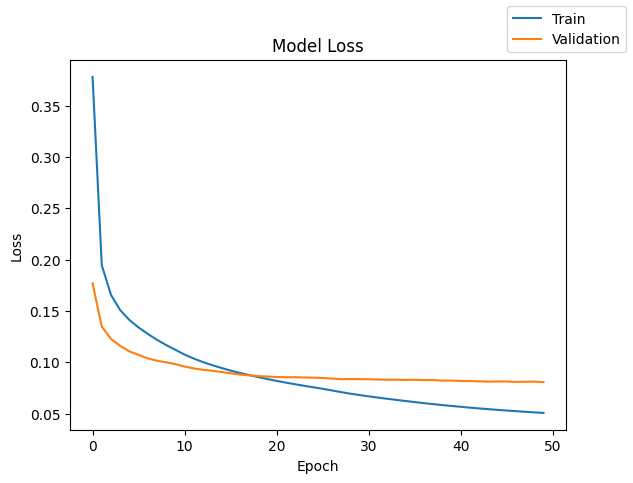

In [173]:
plot(history6,'loss')

### Model recall

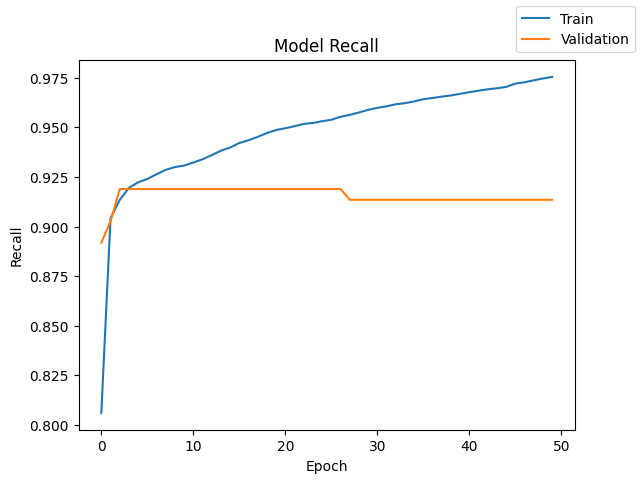

In [174]:
plot(history6,'recall')

### Model performance on the training set

In [175]:
model6_training = model_performance_classification(model6, X_train_over, y_train_over)
model6_training

984/984 ━━━━━━━━━━━━━━━━━━━━ 1s 641us/step


Accuracy    Recall  Precision  F1 Score
0  0.982625  0.982625   0.982682  0.982624

### Model performance on the validation set

In [176]:
model6_validation = model_performance_classification(model6, x_val, y_val)
model6_validation

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step


Accuracy    Recall  Precision  F1 Score
0  0.975405  0.975405   0.979539  0.976771

### Results

In [177]:
results.loc[6] = [2,'16-32','relu-tanh','adam',50,200,history6.history["loss"][-1],history6.history["val_loss"][-1],history6.history["recall"][-1],history6.history["val_recall"][-1],round(end-start,2)]

results

# hidden layers # neurons - hidden layer  \
0                1                        8   
1                2                     8-16   
2                2                    16-32   
3                2                    16-32   
4                2                    16-32   
5                2                    16-32   
6                2                    16-32   

  activation function - hidden layer optimizer  # epochs  batch size  \
0                               relu       sgd        50       16666   
1                               relu       sgd        50         200   
2                          relu-tanh      adam        50         200   
3                          relu-tanh      adam        50         200   
4                          relu-tanh      adam        50         200   
5                          relu-tanh      adam        50         200   
6                          relu-tanh      adam        50         200   

   train loss  validation loss  train recall  validation recall  time (secs)  
0    0.224355         0.239296      0.481081           0.421622         4.81  
1    0.083810         0.079311      0.681081           0.670270        10.08  
2    0.030917         0.036995      0.901622           0.908108        10.26  
3    0.242244         0.093111      0.922162           0.913514        10.77  
4    0.034127         0.039168      0.894054           0.886486        12.18  
5    0.069007         0.044470      0.735135           0.886486        12.87  
6    0.050642         0.080679      0.975415           0.913514        14.70

### Observations on Model 6

* The oversampled technique didn't increase the recall score, it lower it actually to ~98.2% in the training dataset and ~97.5% in the validation set.

# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [180]:
# training performance comparison

models_training_comp_df = pd.concat(
    [
        model0_training.T,
        model1_training.T,
        model2_training.T,
        model3_training.T,
        model4_training.T,
        model5_training.T,
        model6_training.T
    ],
    axis=1,
)
models_training_comp_df.columns = [
    "Model 0 - train",
    "Model 1 - train",
    "Model 2 - train",
    "Model 3 - train",
    "Model 4 - train",
    "Model 5 - train",
    "Model 6 - train"
]
print("Training set performance comparison:")
models_training_comp_df

Training set performance comparison:


Model 0 - train  Model 1 - train  Model 2 - train  Model 3 - train  \
Accuracy          0.931657         0.978219         0.994120         0.987279   
Recall            0.931657         0.978219         0.994120         0.987279   
Precision         0.937737         0.977119         0.994096         0.987856   
F1 Score          0.934476         0.976832         0.993994         0.987497   

           Model 4 - train  Model 5 - train  Model 6 - train  
Accuracy          0.992740         0.990100         0.982625  
Recall            0.992740         0.990100         0.982625  
Precision         0.992716         0.990041         0.982682  
F1 Score          0.992538         0.989719         0.982624

In [181]:
# Validation performance comparison

models_validations_comp_df = pd.concat(
    [
        model0_validation.T,
        model1_validation.T,
        model2_validation.T,
        model3_validation.T,
        model4_validation.T,
        model5_validation.T,
        model6_validation.T

    ],
    axis=1,
)
models_validations_comp_df.columns = [
    "Model 0 - val",
    "Model 1 - val",
    "Model 2 - val",
    "Model 3 - val",
    "Model 4 - val",
    "Model 5 - val",
    "Model 6 - val"
]
print("Validation set performance comparison:")
models_validations_comp_df

Validation set performance comparison:


Model 0 - val  Model 1 - val  Model 2 - val  Model 3 - val  \
Accuracy        0.928614       0.979004       0.993401       0.985603   
Recall          0.928614       0.979004       0.993401       0.985603   
Precision       0.932880       0.978246       0.993317       0.986342   
F1 Score        0.930652       0.977374       0.993297       0.985883   

           Model 4 - val  Model 5 - val  Model 6 - val  
Accuracy        0.992501       0.993101       0.975405  
Recall          0.992501       0.993101       0.975405  
Precision       0.992414       0.993070       0.979539  
F1 Score        0.992331       0.992925       0.976771

* By comparing all the models in the recall score metric. The model that performed the best in both datasets is Model 2 with ~99.4% on the training set and ~99.3% in the validation data. The close scores mean the model is generalizing well. Also the processing time is ~10 seconds.

Now, let's check the performance of the final model on the test set.

## Model 2 for the test dataset

In [182]:
best_model_test_set = model_performance_classification(model2, X_test, y_test)
best_model_test_set

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 767us/step


Accuracy  Recall  Precision  F1 Score
0    0.9894  0.9894   0.989183  0.989109

# **Actionable Insights and Recommendations**

## Description of all the models

Model 0: 
Definition: Model with just one hidden layer, activation function of ReLU and SDG as optimizer. As we can see in the plot for recall, this model has highest numbers in the training recall than the validation recall. Checking the model performance the recall is ~93% for training and ~92% for validation. The percentages are close enough which mean the model is generalizing well. 

Model 1:Add one more hidden layer with activation function tanh and 16 neurons. Same batch size, epochs and sgd optimizer.The recall score for this model is 5% better than Model 0. The recall score for training and validation is ~97%. The model is generalizing well and the addition of the hidden layer has improve the recall. 
The processing time for training has increased to ~10 seconds.

Model2: Increase the amount of neurons in the hidden layers and change the optimizer to adam with the default learning rate. Same batch size and epochs. The recall score is 2% higher than the previous model with a recall score for the training is ~99.4% and validation dataset of ~99.3%. The processing time is still around ~10 seconds.

Model3: Given the dataset is very imbalanced we will add class_weight to Model 2. Same hidden layers, neurons by layer, batch size, epochs and optimizer. The recall score is actually lower than the recall score of Model 2, with ~98.7% for the training set and ~98.5% for the validation set. Adding class_weight has not improve the recall score. The processing time has increase to almost 11 seconds. 

Model4: Add BatchNormalization to both hidden layers and remove the class weight. The recall score come back to ~99.2 % for training and validation set. The processing time has increase by ~2 seconds.

Model 5: Take Model 2 given it has the highest recall score and add BatchNormalization and Dropout. Same batch size, epochs and adam optimizer. The recall score for the training set is ~99.0% and for the validation set is ~99.3 % (Same than model 2). The processing time is ~2 more seconds than Model 2. 

Model 6: Oversampled technique for Model 2 (that has the highest recall score, training: ~99.4% and validation ~99.3%).The oversampled technique didn't increase the recall score, it lower it actually to ~98.2% in the training dataset and ~97.5% in the validation set.

## Insights

* Baseline Model (Model 0): This model give us a recall score of ~93% for the training dataset and ~92% for the validation set. The model recall in the training process varied a lot for training and validation sets as shown in the Model Recall plot.

* Effects of adding hidden layers (Model 1): In Model 1 we can see that just by adding one hidden layer the recall score increased ~4% for training and validation sets.

* Effects of increasing neurons and adding adam as optimizer (Model 2): Model 2 performed exceptionally well by doing this changes and the increase on the recall went up to ~99.4% i training set and ~99.3 in validation set.

* Effects of adding class_weight: Adding class_weight actually lowered the recall score in both training and validation set to around ~98%. 

* Effects of BatchNormalization: Adding BatchNormalization increased the training and validation recall score back to ~99% with an increase in the processing time (~2 seconds). Model 4 is the second model that we could use for predictions.

* Effects of adding BatchNormalization and dropout: The recall score still stays on ~99.0% for the training set and ~99.3% for the validation set. This change didn't increase the recall but the processing time went up to ~12 seconds.

* Effects of oversampled data: Given the dataset is very imbalaced, we try oversampling the data to see if that will allow us to have higher score than the ones in Model 2. Oversampling the data didn't increase the recall and the processing time went up to ~14 second wich is ~4 more seconds than Model 2. 



## Recommendations

For all the reasons and analysis stated above we could use Model 2 for predictions with a recall score for the testing set of ~98.9%, meaning the model will predict correctly 98.9% of the times.

In [189]:
# Create the HTML for the notebook
!jupyter nbconvert --to html "C:\Marina\.AIatUT\Project4\INN_ReneWind_Main_Project_FullCode_Notebook.ipynb" --log-level=ERROR